<a href="https://colab.research.google.com/github/rameshavinash94/Regression_Retail_Store/blob/main/Regression_CLassificaiton_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Olist store Retail Analysis - Classification/Regression Use cases**

**Our Business Problem:**

**Regression Problem:**
Predicting Delivery Date/Freight cost for product. Predicting the Delivery date/freight cost of a product based on various factors like zip code, distance,seller score,transportation, etc.

**Clasification Problem:**
Classifiing product category type based on product dimensions,price,freight cost and multiple factors.

### **INSTALLING LIBRARIES**

In [524]:
#necessary packages
# !pip install pycaret
# !pip install autoviz
# !pip install explainerdashboard
# !pip install fast_ml
# !pip install sweetviz

### **IMPORTING LIBRARIES**

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering

### **DATA EXTRACTION**

**Load the datasets**

In [526]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payment= pd.read_csv('olist_order_payments_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name = pd.read_csv('product_category_name_translation.csv')

The ER/Data Modeling Structure of the Datasource
<div>
<img src='https://i.imgur.com/HRhd2Y0.png'>
</div>


In [527]:
#groupby zipcodes
location_info = geolocation.groupby('geolocation_zip_code_prefix').max().drop_duplicates().reset_index()

In [528]:
#view the dataframe
location_info

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                             1001       -23.549292       -46.633559   
1                             1002       -23.544641       -46.633180   
2                             1003       -23.548901       -46.634862   
3                             1004       -23.549181       -46.634057   
4                             1005       -23.548758       -46.634768   
...                            ...              ...              ...   
18993                        99960       -27.953409       -52.016483   
18994                        99965       -28.173892       -52.034367   
18995                        99970       -28.341329       -51.870397   
18996                        99980       -28.386239       -51.779942   
18997                        99990       -28.329472       -51.769109   

      geolocation_city geolocation_state  
0            são paulo                SP  
1            são paulo                SP  
2            são paulo                SP  
3            são paulo                SP  
4            são paulo                SP  
...                ...               ...  
18993          charrua                RS  
18994       agua santa                RS  
18995          ciríaco                RS  
18996  david canabarro                RS  
18997        muliterno                RS  

[18998 rows x 5 columns]

In [529]:
#join with customers dataset
customers_location=pd.merge(customers,location_info,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix').drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state','customer_unique_id']).rename(columns={'geolocation_lat':'customer_lat','geolocation_lng':'customer_lng'})

In [530]:
#view dataframe
customers_location.head()

customer_id  customer_zip_code_prefix customer_city  \
0  06b8999e2fba1a1fbc88172c00ba8bc7                     14409        franca   
1  5dca924cc99eea2dc5ba40d11ec5dd0f                     14409        franca   
2  661897d4968f1b59bfff74c7eb2eb4fc                     14409        franca   
3  702b62324327ccba20f1be3465426437                     14409        franca   
4  bdf997bae7ca819b0415f5174d6b4302                     14409        franca   

  customer_state  customer_lat  customer_lng  
0             SP    -20.468849    -47.382173  
1             SP    -20.468849    -47.382173  
2             SP    -20.468849    -47.382173  
3             SP    -20.468849    -47.382173  
4             SP    -20.468849    -47.382173

In [531]:
#join with sellers dataset
seller_locations=pd.merge(sellers,location_info,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix').drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state']).rename(columns={'geolocation_lat':'seller_lat','geolocation_lng':'seller_lng'})

In [532]:
#view dataframe
seller_locations.head()

seller_id  seller_zip_code_prefix     seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023        campinas   
1  e0eabded302882513ced4ea3eb0c7059                   13023        campinas   
2  d1b65fc7debc3361ea86b5f14c68d2e2                   13844      mogi guacu   
3  ce3ad9de960102d0677a81f5d0bb7b2d                   20031  rio de janeiro   
4  1d2732ef8321502ee8488e8bed1ab8cd                   20031  rio de janeiro   

  seller_state  seller_lat  seller_lng  
0           SP  -22.884842  -47.045846  
1           SP  -22.884842  -47.045846  
2           SP  -22.347646  -46.920804  
3           RJ  -22.864365  -43.170800  
4           RJ  -22.864365  -43.170800

In [533]:
#view orders dataframe
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [534]:
#view order_review dataframe
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                                                                                 review_comment_message  \
0                                                                                                   NaN   
1                                                                                                   NaN   
2                                                                                                   NaN   
3                                                                 Recebi bem antes do prazo estipulado.   
4  Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13  
2  2018-02-17 00:00:00     2018-02-18 14:36:24  
3  2017-04-21 00:00:00     2017-04-21 22:02:06  
4  2018-03-01 00:00:00     2018-03-02 10:26:53

**Perform Multiple joins to get the final resultant dataframe**

In [535]:
product_info = pd.merge(order_items,products)

In [536]:
product_info = pd.merge(product_info,product_category_name)

In [537]:
order_product_info= pd.merge(orders,product_info)

In [538]:
customers_orders=pd.merge(customers_location,order_product_info)

In [539]:
final_Df = pd.merge(customers_orders,seller_locations)

In [540]:
final_Df = final_Df[final_Df['order_status']=='delivered']

### **SIMPLE DATA WRANGLING**

In [541]:
final_Df.isna().sum()

customer_id                       0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
customer_lat                      0
customer_lng                      0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
product_category_name_englis

In [542]:
# drop na and duplicates in df
final_Df = final_Df.dropna().drop_duplicates()

### **FEATURE ENGINEERING**

***CREATE NEW FEATURES FOR REGRESSION/CLASSIFICATION USE-CASES***

#### **DISTANCE BETWEEN 2 GEO LOCATIONS**

In [543]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(np.array(lat2) - np.array(lat1))
   delta_lambda = np.radians(np.array(lon2) - np.array(lon1))
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res*0.6214, 2)

In [544]:
final_Df['distance']= haversine_distance(final_Df['customer_lat'],final_Df['customer_lng'],final_Df['seller_lat'],final_Df['seller_lng'])

In [545]:
#VIEW THE DATAFRAME
final_Df.head()

customer_id  customer_zip_code_prefix  \
0  06b8999e2fba1a1fbc88172c00ba8bc7                     14409   
1  4e7b3e00288586ebd08712fdd0374a03                      1151   
2  b2b6027bc5c5109e529d4dc6358b12c3                      8775   
3  f2fdb2409d1c2b5018b19767572978d6                     30575   
4  bf45a4524fffba803efa07f225cdfda5                     20231   

     customer_city customer_state  customer_lat  customer_lng  \
0           franca             SP    -20.468849    -47.382173   
1        sao paulo             SP    -23.527788    -46.652997   
2  mogi das cruzes             SP    -23.493944    -46.172406   
3   belo horizonte             MG    -19.818637    -43.929691   
4   rio de janeiro             RJ    -22.908714    -43.182574   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
2  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
3  930fb714ff2992c4ff14bf920af830e6    delivered      2017-12-03 14:52:12   
4  22167b7870f3c3b844087c5cbafac521    delivered      2018-03-07 17:56:08   

     order_approved_at  ... product_length_cm product_height_cm  \
0  2017-05-16 15:22:12  ...              54.0              64.0   
1  2018-05-20 16:19:10  ...              52.0              52.0   
2  2018-03-13 17:29:19  ...              56.0              51.0   
3  2017-12-03 14:59:22  ...              57.0              55.0   
4  2018-03-09 02:30:55  ...              57.0              55.0   

  product_width_cm  product_category_name_english seller_zip_code_prefix  \
0             31.0               office_furniture                   8577   
1             17.0               office_furniture                   8577   
2             28.0               office_furniture                   8577   
3             22.0               office_furniture                   8577   
4             22.0               office_furniture                   8577   

       seller_city seller_state  seller_lat  seller_lng distance  
0  itaquaquecetuba           SP  -23.479473  -46.357851   218.13  
1  itaquaquecetuba           SP  -23.479473  -46.357851    19.00  
2  itaquaquecetuba           SP  -23.479473  -46.357851    11.79  
3  itaquaquecetuba           SP  -23.479473  -46.357851   297.14  
4  itaquaquecetuba           SP  -23.479473  -46.357851   205.48  

[5 rows x 34 columns]

#### **Create Multiple Time Based Features**


**Actual Delivery Timeline** = _Difference in days between order_delivered_customer_date & order_purchase_timestamp._

**Estimated_delivery_timeline** = _Difference in days between order_delivered_customer_date & order_estimated_delivery_date if diff is less/zero then the customer is happy._

**Seller_approval_timeline** = _Difference in days between order_approved_at & order_purchase_timestamp. If the order gets approved faster then most probably the item is in stock and has higher chance of reaching on time._

**Seller_processing_timeline**  = _Difference in days between order_delivered_carrier_date & order_approved_at. Time taken by the seller to process the order._

**Seller_order_timeline** = _Difference in days between order_delivered_carrier_date & shipping_limit_date. if diff is less than seller is on track with the order._

**Carrier_delivery_timeline** = _Difference in days between order_delivered_customer_date & order_delivered_carrier_date. Time taken by the carrier to delive the order to the customer._

In [546]:
#creating new features
final_Df[['order_delivered_customer_date','order_purchase_timestamp','order_estimated_delivery_date','order_approved_at','order_delivered_carrier_date','shipping_limit_date']] = final_Df[['order_delivered_customer_date','order_purchase_timestamp','order_estimated_delivery_date','order_approved_at','order_delivered_carrier_date','shipping_limit_date']].apply(pd.to_datetime) # conversion required
final_Df['actual_delivery_timeline']=(final_Df['order_delivered_customer_date'] - final_Df['order_purchase_timestamp']).dt.days
final_Df['estimated_delivery_timeline']=(final_Df['order_delivered_customer_date'] - final_Df['order_estimated_delivery_date']).dt.days
final_Df['seller_approval_timeline']= (final_Df['order_approved_at'] - final_Df['order_purchase_timestamp']).dt.days
final_Df['seller_processing_timeline'] = (final_Df['order_delivered_carrier_date'] - final_Df['order_approved_at']).dt.days
final_Df['seller_order_timeline'] =  (final_Df['order_delivered_carrier_date'] - final_Df['shipping_limit_date']).dt.days
final_Df['carrier_delivery_timeline'] = (final_Df['order_delivered_customer_date'] - final_Df['order_delivered_carrier_date']).dt.days

In [547]:
#view the dataframe
final_Df.head()

customer_id  customer_zip_code_prefix  \
0  06b8999e2fba1a1fbc88172c00ba8bc7                     14409   
1  4e7b3e00288586ebd08712fdd0374a03                      1151   
2  b2b6027bc5c5109e529d4dc6358b12c3                      8775   
3  f2fdb2409d1c2b5018b19767572978d6                     30575   
4  bf45a4524fffba803efa07f225cdfda5                     20231   

     customer_city customer_state  customer_lat  customer_lng  \
0           franca             SP    -20.468849    -47.382173   
1        sao paulo             SP    -23.527788    -46.652997   
2  mogi das cruzes             SP    -23.493944    -46.172406   
3   belo horizonte             MG    -19.818637    -43.929691   
4   rio de janeiro             RJ    -22.908714    -43.182574   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
2  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
3  930fb714ff2992c4ff14bf920af830e6    delivered      2017-12-03 14:52:12   
4  22167b7870f3c3b844087c5cbafac521    delivered      2018-03-07 17:56:08   

    order_approved_at  ... seller_state seller_lat seller_lng  distance  \
0 2017-05-16 15:22:12  ...           SP -23.479473 -46.357851    218.13   
1 2018-05-20 16:19:10  ...           SP -23.479473 -46.357851     19.00   
2 2018-03-13 17:29:19  ...           SP -23.479473 -46.357851     11.79   
3 2017-12-03 14:59:22  ...           SP -23.479473 -46.357851    297.14   
4 2018-03-09 02:30:55  ...           SP -23.479473 -46.357851    205.48   

  actual_delivery_timeline estimated_delivery_timeline  \
0                        8                         -11   
1                       26                           1   
2                       14                         -13   
3                       25                         -14   
4                       18                         -29   

  seller_approval_timeline  seller_processing_timeline  seller_order_timeline  \
0                        0                           6                      0   
1                        1                          21                      5   
2                        0                          14                      0   
3                        0                           9                     -1   
4                        1                          11                     -3   

  carrier_delivery_timeline  
0                         1  
1                         3  
2                         0  
3                        15  
4                         5  

[5 rows x 40 columns]

#### **CUSTOMER SATISFACTION**

_0 - Customer Satisfied with order delivery (ontime delivery)_

_1- Customer not satisfied with order delivery (late delivery )_

In [548]:
final_Df['customer_satisfaction'] = np.where(final_Df['estimated_delivery_timeline'] <=0,0,1)

In [549]:
final_Df

customer_id  customer_zip_code_prefix  \
0       06b8999e2fba1a1fbc88172c00ba8bc7                     14409   
1       4e7b3e00288586ebd08712fdd0374a03                      1151   
2       b2b6027bc5c5109e529d4dc6358b12c3                      8775   
3       f2fdb2409d1c2b5018b19767572978d6                     30575   
4       bf45a4524fffba803efa07f225cdfda5                     20231   
...                                  ...                       ...   
110433  f48c503766cc6385fe6947e623c20b65                     91791   
110434  f48c503766cc6385fe6947e623c20b65                     91791   
110435  f48c503766cc6385fe6947e623c20b65                     91791   
110436  f48c503766cc6385fe6947e623c20b65                     91791   
110437  f48c503766cc6385fe6947e623c20b65                     91791   

          customer_city customer_state  customer_lat  customer_lng  \
0                franca             SP    -20.468849    -47.382173   
1             sao paulo             SP    -23.527788    -46.652997   
2       mogi das cruzes             SP    -23.493944    -46.172406   
3        belo horizonte             MG    -19.818637    -43.929691   
4        rio de janeiro             RJ    -22.908714    -43.182574   
...                 ...            ...           ...           ...   
110433     porto alegre             RS    -30.144365    -51.125366   
110434     porto alegre             RS    -30.144365    -51.125366   
110435     porto alegre             RS    -30.144365    -51.125366   
110436     porto alegre             RS    -30.144365    -51.125366   
110437     porto alegre             RS    -30.144365    -51.125366   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       b2059ed67ce144a36e2aa97d2c9e9ad2    delivered   
2       951670f92359f4fe4a63112aa7306eba    delivered   
3       930fb714ff2992c4ff14bf920af830e6    delivered   
4       22167b7870f3c3b844087c5cbafac521    delivered   
...                                  ...          ...   
110433  b13efaac3f8cb7730ba737059abc614b    delivered   
110434  b13efaac3f8cb7730ba737059abc614b    delivered   
110435  b13efaac3f8cb7730ba737059abc614b    delivered   
110436  b13efaac3f8cb7730ba737059abc614b    delivered   
110437  b13efaac3f8cb7730ba737059abc614b    delivered   

       order_purchase_timestamp   order_approved_at  ... seller_lat  \
0           2017-05-16 15:05:35 2017-05-16 15:22:12  ... -23.479473   
1           2018-05-19 16:07:45 2018-05-20 16:19:10  ... -23.479473   
2           2018-03-13 16:06:38 2018-03-13 17:29:19  ... -23.479473   
3           2017-12-03 14:52:12 2017-12-03 14:59:22  ... -23.479473   
4           2018-03-07 17:56:08 2018-03-09 02:30:55  ... -23.479473   
...                         ...                 ...  ...        ...   
110433      2017-10-26 11:22:23 2017-10-26 11:37:48  ... -23.523698   
110434      2017-10-26 11:22:23 2017-10-26 11:37:48  ... -23.523698   
110435      2017-10-26 11:22:23 2017-10-26 11:37:48  ... -23.523698   
110436      2017-10-26 11:22:23 2017-10-26 11:37:48  ... -23.523698   
110437      2017-10-26 11:22:23 2017-10-26 11:37:48  ... -23.523698   

       seller_lng distance  actual_delivery_timeline  \
0      -46.357851   218.13                         8   
1      -46.357851    19.00                        26   
2      -46.357851    11.79                        14   
3      -46.357851   297.14                        25   
4      -46.357851   205.48                        18   
...           ...      ...                       ...   
110433 -46.686732   532.93                        13   
110434 -46.686732   532.93                        13   
110435 -46.686732   532.93                        13   
110436 -46.686732   532.93                        13   
110437 -46.686732   532.93                        13   

       estimated_delivery_timeline seller_approval_timeline  \
0                              -11                        0   
1         

In [550]:
#VIEW THE COLUMNS
final_Df.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_lat', 'seller_lng', 'distance',
       'actual_delivery_timeline', 'estimated_delivery_timeline',
       'seller_approval_timeline', 'seller_processing_timeline',
       'seller_order_timeline', 'carrier_delivery_timeline',
       'customer_satisfaction'],
      dt

#### **Determine The Density Of The Order**

_Density is an important feature in logstics since it helps to decide the freight class of the product._

*The formula to determine the density of an item is: LxWxH / 1728 = Cubic Feet (CU FT), Weight (Pounds)/CU FT = Density (#PCF)*

In [551]:
#density calculation function
def density(l,w,h,weight):
    l=np.array(l)*0.393701 # to convert to inches
    w=np.array(w)*0.393701
    h=np.array(h)*0.393701
    Cubic_feet = l*w*h/1728
    Density = (np.array(weight)*0.00220462)/Cubic_feet
    return np.round(Density,2)

In [552]:
final_Df['pkg_density']=density(final_Df['product_length_cm'],final_Df['product_width_cm'],final_Df['product_height_cm'],final_Df['product_weight_g'])

In [553]:
final_Df['pkg_density'].head()

0     5.06
1    11.23
2     9.49
3    10.75
4    11.93
Name: pkg_density, dtype: float64

#### **SELLER_RELIABILITY_CREATION**


_FACTORS:_
- ORDER APPROVAL TIME
- PRODUCT QUALITY/CUSTOMER SATISFACTION
- SHIPPING TIMELINE TO CARRIER

In [554]:
#merge the final dataframe with order_reviews to get the review info of each order
Review_info = final_Df.merge(order_reviews)

In [555]:
seller_review_score = Review_info.groupby('seller_id')['review_score'].mean().round(1).to_frame().reset_index()

In [556]:
seller_review_score['review_score'] = np.round(seller_review_score['review_score']/5,1)

In [557]:
#seller review score
seller_review_score

seller_id  review_score
0     0015a82c2db000af6aaaf3ae2ecb0532           0.7
1     001cca7ae9ae17fb1caed9dfb1094831           0.8
2     002100f778ceb8431b7a1020ff7ab48f           0.8
3     004c9cd9d87a3c30c522c48c4fc07416           0.8
4     00720abe85ba0859807595bbf045a33b           0.7
...                                ...           ...
2895  ffc470761de7d0232558ba5e786e57b7           0.9
2896  ffdd9f82b9a447f6f8d4b91554cc7dd3           0.8
2897  ffeee66ac5d5a62fe688b9d26f83f534           0.8
2898  fffd5413c0700ac820c7069d66d98c89           0.8
2899  ffff564a4f9085cd26170f4732393726           0.6

[2900 rows x 2 columns]

In [558]:
#calcuate seller ontime and approval time scores
final_Df['seller_on_time'] = np.where(final_Df['seller_order_timeline'] > 0,0,1)
final_Df['seller_order_approval_time'] = np.where(final_Df['seller_approval_timeline'] <= 2,1,0)

In [559]:
seller_on_time = final_Df.groupby('seller_id')['seller_on_time'].mean().round(1).to_frame().reset_index()
seller_approval_score = final_Df.groupby('seller_id')['seller_order_approval_time'].mean().round(1).to_frame().reset_index()

In [560]:
#create a new dataframe with combination of 3 scores(seller_on_time,seller_order_approval_time,review_score)
seller_reliability_info = pd.merge(pd.merge(seller_on_time,seller_approval_score),seller_review_score)

In [561]:
#create a new column reliabilty score with a combined probability of all 3 columns
seller_reliability_info['reliabilty_score'] = 0.5*seller_reliability_info['seller_on_time']+0.3*seller_reliability_info['review_score']+0.2*seller_reliability_info['seller_order_approval_time']

In [562]:
#view dataframe
seller_reliability_info.head()

seller_id  seller_on_time  \
0  0015a82c2db000af6aaaf3ae2ecb0532             1.0   
1  001cca7ae9ae17fb1caed9dfb1094831             1.0   
2  002100f778ceb8431b7a1020ff7ab48f             0.9   
3  004c9cd9d87a3c30c522c48c4fc07416             1.0   
4  00720abe85ba0859807595bbf045a33b             0.9   

   seller_order_approval_time  review_score  reliabilty_score  
0                         1.0           0.7              0.91  
1                         1.0           0.8              0.94  
2                         1.0           0.8              0.89  
3                         1.0           0.8              0.94  
4                         1.0           0.7              0.86

In [563]:
#now merge the seller_reliability_info with final dataframe for the regression model
Combined_Df = pd.merge(seller_reliability_info,final_Df)

In [564]:
#view the joined df
Combined_Df

seller_id  seller_on_time  \
0      0015a82c2db000af6aaaf3ae2ecb0532             1.0   
1      0015a82c2db000af6aaaf3ae2ecb0532             1.0   
2      0015a82c2db000af6aaaf3ae2ecb0532             1.0   
3      001cca7ae9ae17fb1caed9dfb1094831             1.0   
4      001cca7ae9ae17fb1caed9dfb1094831             1.0   
...                                 ...             ...   
73784  fffd5413c0700ac820c7069d66d98c89             1.0   
73785  fffd5413c0700ac820c7069d66d98c89             1.0   
73786  fffd5413c0700ac820c7069d66d98c89             1.0   
73787  fffd5413c0700ac820c7069d66d98c89             1.0   
73788  fffd5413c0700ac820c7069d66d98c89             1.0   

       seller_order_approval_time  review_score  reliabilty_score  \
0                             1.0           0.7              0.91   
1                             1.0           0.7              0.91   
2                             1.0           0.7              0.91   
3                             1.0           0.8              0.94   
4                             1.0           0.8              0.94   
...                           ...           ...               ...   
73784                         1.0           0.8              0.94   
73785                         1.0           0.8              0.94   
73786                         1.0           0.8              0.94   
73787                         1.0           0.8              0.94   
73788                         1.0           0.8              0.94   

                            customer_id  customer_zip_code_prefix  \
0      d9442164acf4b03109425633efaa0cfc                     38600   
1      944b72539d7e1f7f7fc6e46639ef1fe3                     87502   
2      d7fc82cbeafea77bd0a8fbbf6296e387                     35490   
3      1fff5bd495b4e1ccb35d4a2b51520803                     89254   
4      a37f4486aff8b096c3878e83a2ae0f1a                     39400   
...                                 ...                       ...   
73784  afc9910dda523bd3e6b83bfa889bbbc4                     64606   
73785  043f84c471d1141aa553fc893c6fa14c                     94760   
73786  4aefbb772ae619de2cc832a2d7526ff6                     15980   
73787  a4c800a16c71d3bb4b77665ba11d8525                     36923   
73788  c8ca4bcdd8d22697394008267108810d                     19051   

             customer_city customer_state  customer_lat  ...  seller_lng  \
0                 paracatu             MG    -17.117508  ...  -46.532709   
1                 umuarama             PR    -23.750819  ...  -46.532709   
2      entre rios de minas             MG    -20.658067  ...  -46.532709   
3           jaragua do sul             SC    -26.448030  ...  -40.390723   
4            montes claros             MG    -16.671011  ...  -40.390723   
...                    ...            ...           ...  ...         ...   
73784                picos             PI     -7.080298  ...  -46.781083   
73785         aguas claras             RS    -19.435588  ...  -46.781083   
73786              dobrada             SP    -21.513888  ...  -46.781083   
73787            luisburgo             MG    -20.438173  ...  -46.781083   
73788  presidente prudente             SP    -22.141711  ...  -46.781083   

      distance actual_delivery_timeline estimated_delivery_timeline  \
0       449.92                       12                         -13   
1       421.79                       10                         -23   
2       259.16                        9                         -13   
3       698.42                       15                         -17   
4       335.03                        9                         -14   
...        ...                      ...                         ...   
73784  1136.10                       18                         -15   
73785   354.79                       37                           2   
73786   130.95                        3                         -14   
73787   338.45                       10 

In [565]:
Combined_Df.columns

Index(['seller_id', 'seller_on_time', 'seller_order_approval_time',
       'review_score', 'reliabilty_score', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_lat', 'customer_lng', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_lat', 'seller_lng', 'distance',
       'actual_delivery_timeline', 'estimated_delivery_timeline',
       'seller_approval_timeline', 'seller_processing_timeline',
    

In [566]:
#remove the unnecessary columns
regression_test = Combined_Df.drop(columns=['order_purchase_timestamp','order_approved_at','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','seller_id', 'shipping_limit_date','product_category_name','product_name_lenght','product_description_lenght', 'product_photos_qty','customer_city','customer_state', 'customer_lat', 'customer_lng','seller_city', 'seller_state', 'seller_lat','seller_lng','order_status','order_id','order_item_id','product_id'])

In [567]:
#view the dataframe
regression_test

seller_on_time  seller_order_approval_time  review_score  \
0                 1.0                         1.0           0.7   
1                 1.0                         1.0           0.7   
2                 1.0                         1.0           0.7   
3                 1.0                         1.0           0.8   
4                 1.0                         1.0           0.8   
...               ...                         ...           ...   
73784             1.0                         1.0           0.8   
73785             1.0                         1.0           0.8   
73786             1.0                         1.0           0.8   
73787             1.0                         1.0           0.8   
73788             1.0                         1.0           0.8   

       reliabilty_score                       customer_id  \
0                  0.91  d9442164acf4b03109425633efaa0cfc   
1                  0.91  944b72539d7e1f7f7fc6e46639ef1fe3   
2                  0.91  d7fc82cbeafea77bd0a8fbbf6296e387   
3                  0.94  1fff5bd495b4e1ccb35d4a2b51520803   
4                  0.94  a37f4486aff8b096c3878e83a2ae0f1a   
...                 ...                               ...   
73784              0.94  afc9910dda523bd3e6b83bfa889bbbc4   
73785              0.94  043f84c471d1141aa553fc893c6fa14c   
73786              0.94  4aefbb772ae619de2cc832a2d7526ff6   
73787              0.94  a4c800a16c71d3bb4b77665ba11d8525   
73788              0.94  c8ca4bcdd8d22697394008267108810d   

       customer_zip_code_prefix  price  freight_value  product_weight_g  \
0                         38600  895.0          21.02           11800.0   
1                         87502  895.0          21.02           11800.0   
2                         35490  895.0          21.02           11800.0   
3                         89254   99.0          45.99            9000.0   
4                         39400   99.0          38.53            9000.0   
...                         ...    ...            ...               ...   
73784                     64606  262.5         206.45           25850.0   
73785                     94760   95.8          21.16            2250.0   
73786                     15980  262.5          57.51           25850.0   
73787                     36923   98.0          17.83            5150.0   
73788                     19051   85.8          12.10             400.0   

       product_length_cm  ...  seller_zip_code_prefix  distance  \
0                   40.0  ...                    9080    449.92   
1                   40.0  ...                    9080    421.79   
2                   40.0  ...                    9080    259.16   
3                   42.0  ...                   29156    698.42   
4                   42.0  ...                   29156    335.03   
...                  ...  ...                     ...       ...   
73784               38.0  ...                   13908   1136.10   
73785               40.0  ...                   13908    354.79   
73786               38.0  ...                   13908    130.95   
73787               20.0  ...                   13908    338.45   
73788               39.0  ...                   13908    301.06   

      actual_delivery_timeline  estimated_delivery_timeline  \
0                           12                          -13   
1                           10                          -23   
2                            9                          -13   
3                           15                          -17   
4                            9                          -14   
...                        ...                          ...   
73784                       18                          -15   
73785                       37                            2   
73786                        3                          -14   
73787                       10                          -13   
73788                        7                          -14   

      

In [568]:
#created a simple map of product category
product_category_dictinary = {y:x for x,y in enumerate(regression_test['product_category_name_english'].unique())}

#regression_test['product_category_name_english'] = regression_test['product_category_name_english'].map(product_category_dictinary)

In [569]:
cleaned_regression = regression_test.dropna().drop_duplicates()

In [570]:
#testing regression
testing_regression=cleaned_regression.drop(columns=['estimated_delivery_timeline'])

**WRITE INTERMEDIATE RESULTS TO CSV**

In [571]:
#write to csv for intermediate steps
testing_regression.to_csv("testing_regression.csv",index=False)

### **REGRESSION**

#### ***COMBINE WITH ON THE GOLDEN CLUSTER AND PERFROM REGRESSION***

In [572]:
Regression_dataset = pd.read_csv('/content/testing_regression.csv')

In [573]:
GOlder_Cluster=pd.read_csv('/content/Golden_Cluster.csv')

**Combine this dataset to the previous created customers on the verge of Churn**

In [574]:
#now lets merge only the customers who are on the verge of churn from previous clustering usecase
Regression_Df = pd.merge(Regression_dataset,GOlder_Cluster)

In [575]:
Regression_Df

seller_on_time  seller_order_approval_time  review_score  \
0               1.0                         1.0           0.9   
1               1.0                         1.0           0.9   
2               1.0                         1.0           0.9   
3               1.0                         1.0           0.9   
4               1.0                         1.0           0.9   
..              ...                         ...           ...   
471             1.0                         1.0           0.8   
472             1.0                         1.0           0.8   
473             1.0                         1.0           0.9   
474             1.0                         1.0           0.9   
475             1.0                         1.0           0.9   

     reliabilty_score                       customer_id  \
0                0.97  753bd08248a5fa2c21da47c01cfd83a3   
1                0.97  07e6bfcde64d35a92aeea73af4a36411   
2                0.97  aeb3d464f6b83eecd79d6fd58d6208fb   
3                0.97  aeb3d464f6b83eecd79d6fd58d6208fb   
4                0.97  bb57526f1e8fe74f92c4c7e4ced09303   
..                ...                               ...   
471              0.94  5c351d3b7eb465775ce1405dbe49cb23   
472              0.94  5c351d3b7eb465775ce1405dbe49cb23   
473              0.97  2b832cd4b84a4df8934118d2d0c3dabc   
474              0.97  17a591e12299eb96e17f2986c3e2879c   
475              0.97  7cb0f023081168c64df95ea05a7faf13   

     customer_zip_code_prefix  price  freight_value  product_weight_g  \
0                       11065   62.0           2.34             625.0   
1                       13503   95.0          11.29            4250.0   
2                        8041   62.0          10.54             625.0   
3                        8041   48.0          10.54             475.0   
4                       14340  127.0          13.91            1850.0   
..                        ...    ...            ...               ...   
471                     15093  115.0           8.59             200.0   
472                     15093  229.9           8.59             250.0   
473                     12288   16.8          11.85             148.0   
474                     14021   69.5          13.51            1100.0   
475                      4913    6.9           8.72             500.0   

     product_length_cm  ...  carrier_delivery_timeline  customer_satisfaction  \
0                 70.0  ...                          1                      0   
1                 50.0  ...                          0                      0   
2                 70.0  ...                          4                      0   
3                 65.0  ...                          4                      0   
4                 70.0  ...                          6                      0   
..                 ...  ...                        ...                    ...   
471               26.0  ...                          1                      0   
472               26.0  ...                          1                      0   
473               25.0  ...                          4                      0   
474               24.0  ...                          2                      0   
475               32.0  ...                          1                      0   

    pkg_density  MonetaryValue  Frequency  Recently  \
0          0.74       1.039471   5.423270  0.465797   
1          5.41       1.540398   3.525586 -0.508316   
2          0.74       3.213548  13.014007 -0.113405   
3          2.53       3.213548  13.014007 -0.113405   
4          1.94       3.533764   5.423270 -0.021259   
..          ...            ...        ...       ...   
471        2.45       3.508762   3.525586 -0.679444   
472        2.34       3.508762   3.525586 -0.679444   
473        0.62      -0.123142   5.423270  0.571107   
474        4.97       0.971633   3.525586  0.268342   
475        2.77      -0.547599   5.423270  0.314415   

    

#### **USECASE1 - DELIVERY DATE ESTIMATION**

##### **DIFFERENT FEATURES IN THE DATASET**

In [576]:
X=Regression_Df.drop(columns=['actual_delivery_timeline','product_category_name_english','customer_id','churn_customer_category'])
y=Regression_Df['actual_delivery_timeline']

In [577]:
#features in the dataset
feature_name=X.columns
feature_name

Index(['seller_on_time', 'seller_order_approval_time', 'review_score',
       'reliabilty_score', 'customer_zip_code_prefix', 'price',
       'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'distance', 'seller_approval_timeline', 'seller_processing_timeline',
       'seller_order_timeline', 'carrier_delivery_timeline',
       'customer_satisfaction', 'pkg_density', 'MonetaryValue', 'Frequency',
       'Recently', 'Frequency_Cluster_Category', 'Recency_Cluster_Category',
       'Monetary_Cluster_Category'],
      dtype='object')

##### **DIFFERENT FEATURE SELECTION METHODS**

######**Pearson Correlation**

In [578]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    cor_list = X.corrwith(y)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [579]:
import numpy as np
num_feats=10
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [580]:
for x in cor_feature:
  print(x)

seller_approval_timeline
MonetaryValue
freight_value
Monetary_Cluster_Category
seller_zip_code_prefix
seller_order_timeline
customer_satisfaction
distance
seller_processing_timeline
carrier_delivery_timeline


######**CHI-SQUARED**

In [582]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [583]:
for x in cor_feature:
  print(x)

seller_approval_timeline
MonetaryValue
freight_value
Monetary_Cluster_Category
seller_zip_code_prefix
seller_order_timeline
customer_satisfaction
distance
seller_processing_timeline
carrier_delivery_timeline


######**Recursive Feature Elimination**

In [584]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 25 features.
Fitting estimator with 15 features.
10 selected features


In [585]:
rfe_feature

['customer_zip_code_prefix',
 'product_width_cm',
 'seller_zip_code_prefix',
 'distance',
 'seller_approval_timeline',
 'seller_processing_timeline',
 'seller_order_timeline',
 'carrier_delivery_timeline',
 'MonetaryValue',
 'Frequency']

######**Lasso: SelectFromModel**

In [586]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

9 selected features


In [587]:
embeded_lr_feature

['customer_zip_code_prefix',
 'product_width_cm',
 'seller_zip_code_prefix',
 'distance',
 'seller_approval_timeline',
 'seller_processing_timeline',
 'seller_order_timeline',
 'carrier_delivery_timeline',
 'Monetary_Cluster_Category']

######**Tree-based: SelectFromModel**

In [588]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [589]:
embeded_rf_feature

['customer_zip_code_prefix',
 'price',
 'freight_value',
 'seller_zip_code_prefix',
 'distance',
 'seller_processing_timeline',
 'seller_order_timeline',
 'carrier_delivery_timeline',
 'MonetaryValue',
 'Recently']

###### **COMBINE ALL METHODS AND CHOOSE TOP N FEATURES**

In [590]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [591]:
feature_selection_df

Feature  Pearson  Chi-2    RFE  Logistics  \
1       seller_zip_code_prefix     True   True   True       True   
2   seller_processing_timeline     True   True   True       True   
3                     distance     True   True   True       True   
4    carrier_delivery_timeline     True   True   True       True   
5        seller_order_timeline     True  False   True       True   
6     seller_approval_timeline     True   True   True       True   
7     customer_zip_code_prefix    False  False   True       True   
8                MonetaryValue     True  False   True      False   
9             product_width_cm    False  False   True       True   
10               freight_value     True  False  False      False   
11       customer_satisfaction     True   True  False      False   
12   Monetary_Cluster_Category     True  False  False       True   
13                   Frequency    False   True   True      False   
14            product_weight_g    False   True  False      False   
15                       price    False  False  False      False   
16                    Recently    False  False  False      False   
17    Recency_Cluster_Category    False   True  False      False   
18  Frequency_Cluster_Category    False   True  False      False   
19  seller_order_approval_time    False  False  False      False   
20              seller_on_time    False  False  False      False   
21                review_score    False  False  False      False   
22            reliabilty_score    False  False  False      False   
23           product_length_cm    False  False  False      False   
24           product_height_cm    False  False  False      False   
25                 pkg_density    False  False  False      False   

    Random Forest  Total  
1            True      5  
2            True      5  
3            True      5  
4            True      5  
5            True      4  
6           False      4  
7            True      3  
8            True      3  
9           False      2  
10           True      2  
11          False      2  
12          False      2  
13          False      2  
14          False      1  
15           True      1  
16           True      1  
17          False      1  
18          False      1  
19          False      0  
20          False      0  
21          False      0  
22          False      0  
23          False      0  
24          False      0  
25          False      0

In [592]:
#select top 10 features
final_features = feature_selection_df[:12]['Feature']

In [593]:
final_features = final_features.values

In [594]:
final_features

array(['seller_zip_code_prefix', 'seller_processing_timeline', 'distance',
       'carrier_delivery_timeline', 'seller_order_timeline',
       'seller_approval_timeline', 'customer_zip_code_prefix',
       'MonetaryValue', 'product_width_cm', 'freight_value',
       'customer_satisfaction', 'Monetary_Cluster_Category'], dtype=object)

In [595]:
#columns to drop
drop_columns=[]

for col in X.columns:
  if col in final_features:
    pass
  else:
    drop_columns.append(col)

In [596]:
drop_columns

['seller_on_time',
 'seller_order_approval_time',
 'review_score',
 'reliabilty_score',
 'price',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'pkg_density',
 'Frequency',
 'Recently',
 'Frequency_Cluster_Category',
 'Recency_Cluster_Category']

In [597]:
#drop unnecessary features 
Final_X = X.drop(columns=drop_columns)

In [598]:
#dataframe with only the required features
Final_X

customer_zip_code_prefix  freight_value  product_width_cm  \
0                       11065           2.34              50.0   
1                       13503          11.29              70.0   
2                        8041          10.54              50.0   
3                        8041          10.54              45.0   
4                       14340          13.91              50.0   
..                        ...            ...               ...   
471                     15093           8.59              14.0   
472                     15093           8.59              16.0   
473                     12288          11.85              22.0   
474                     14021          13.51              24.0   
475                      4913           8.72              22.0   

     seller_zip_code_prefix  distance  seller_approval_timeline  \
0                      3333     31.27                         0   
1                      3333    101.60                         0   
2                      3333      9.05                         1   
3                      3333      9.05                         1   
4                      3333    190.72                         0   
..                      ...       ...                       ...   
471                   15015    161.46                         0   
472                   15015    161.46                         0   
473                   13920     65.74                         0   
474                   13920    126.59                         1   
475                   13920     66.51                         1   

     seller_processing_timeline  seller_order_timeline  \
0                             2                     -3   
1                             2                     -3   
2                             1                     -5   
3                             1                     -5   
4                             1                     -5   
..                          ...                    ...   
471                          -1                     -8   
472                          -1                     -8   
473                           0                     -6   
474                           0                     -6   
475                           0                     -6   

     carrier_delivery_timeline  customer_satisfaction  MonetaryValue  \
0                            1                      0       1.039471   
1                            0                      0       1.540398   
2                            4                      0       3.213548   
3                            4                      0       3.213548   
4                            6                      0       3.533764   
..                         ...                    ...            ...   
471                          1                      0       3.508762   
472                          1                      0       3.508762   
473                          4                      0      -0.123142   
474                          2                      0       0.971633   
475                          1                      0      -0.547599   

     Monetary_Cluster_Category  
0                            1  
1                            1  
2                            0  
3                            0  
4                            0  
..                         ...  
471                          0  
472                          0  
473                          3  
474                          1  
475                          3  

[476 rows x 12 columns]

##### **TRAIN TEST SPLIT**

In [599]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final_X, y, test_size=0.2, random_state=21)

##### **VISUALIZE TRAIN TEST SPLIT**

**SWEETVIZ**

In [600]:
# importing sweetviz
import sweetviz as sv

training_date = X_train
training_date['delivery_date']= y_train

testing_data = X_test
testing_data['delivery_date']= y_test

#compare train and test
comparison_report = sv.compare([training_date,'Train'], [testing_data,'Test'])

                                             |          | [  0%]   00:00 -> (? left)


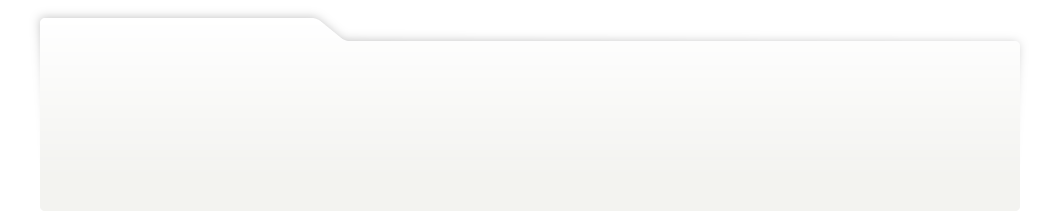
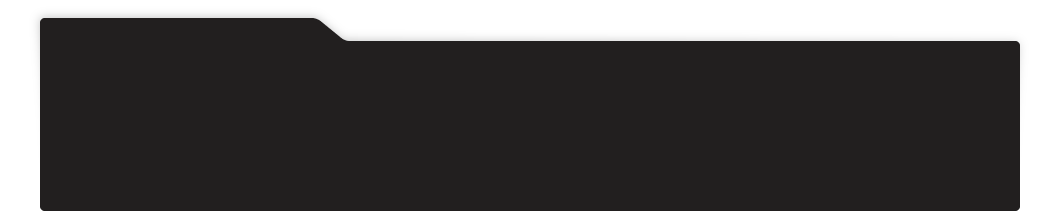
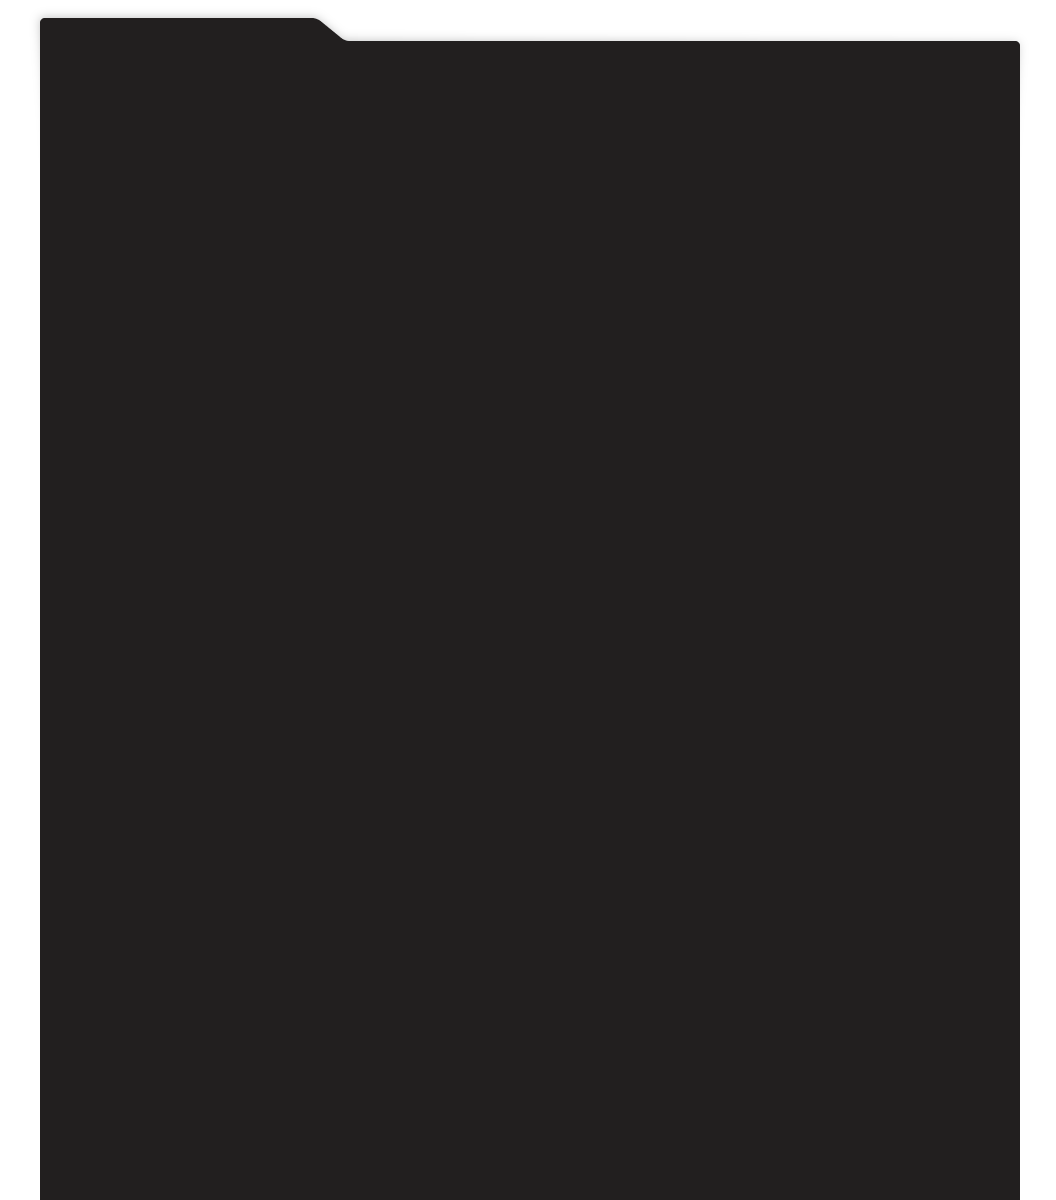
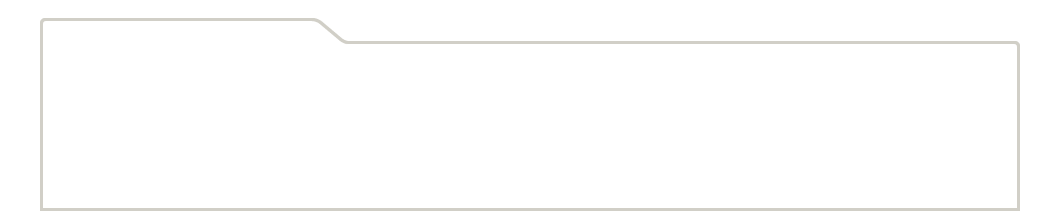
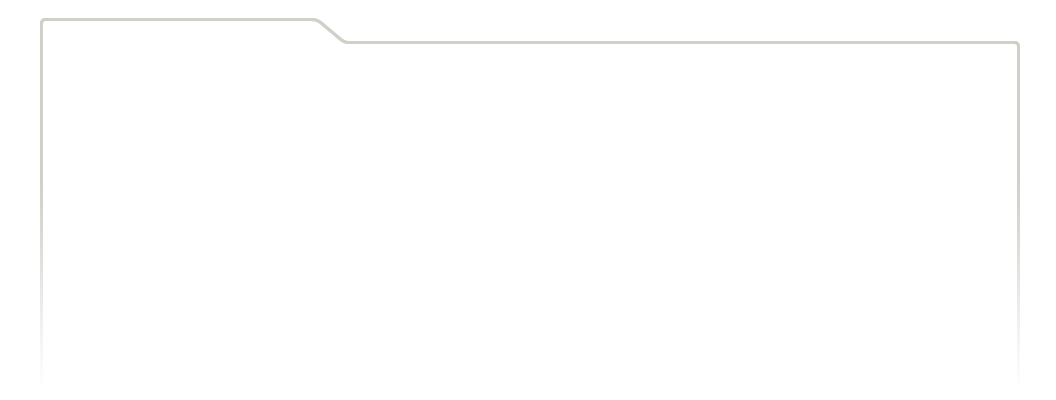
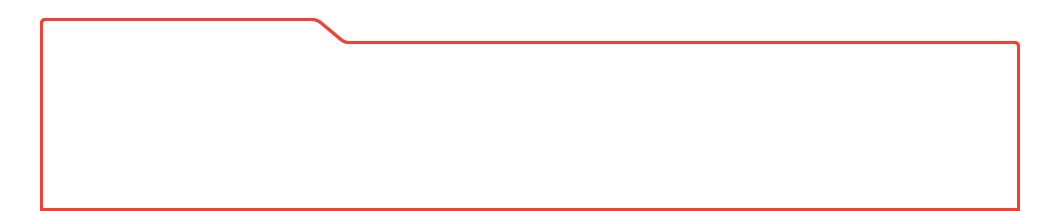
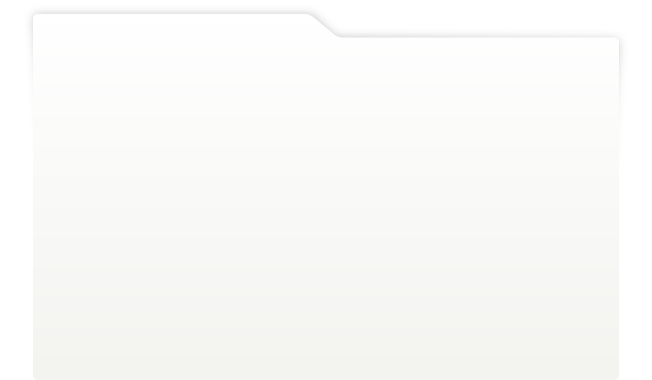
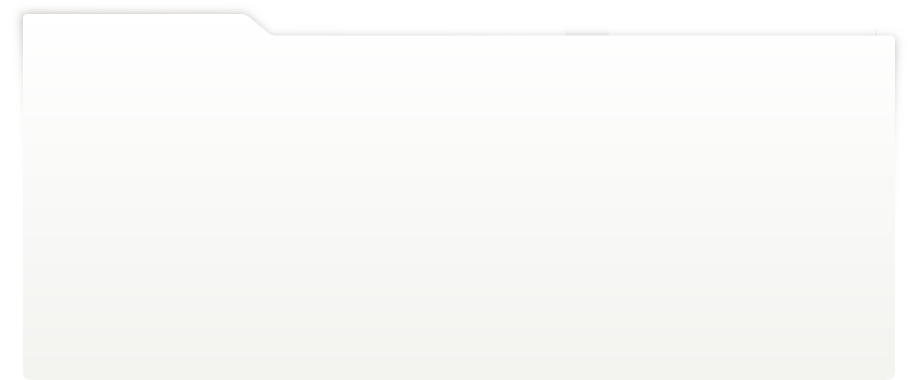
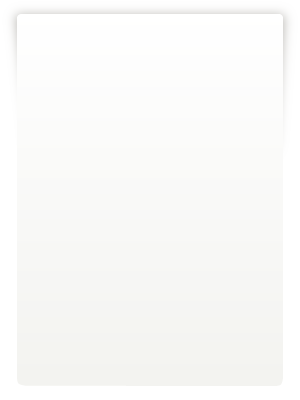
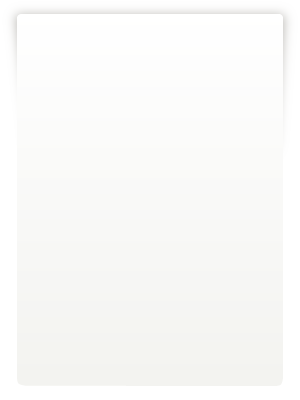
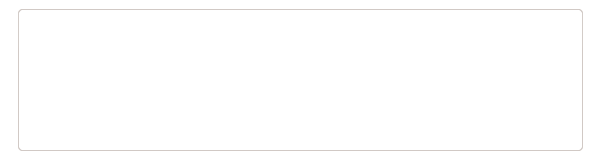
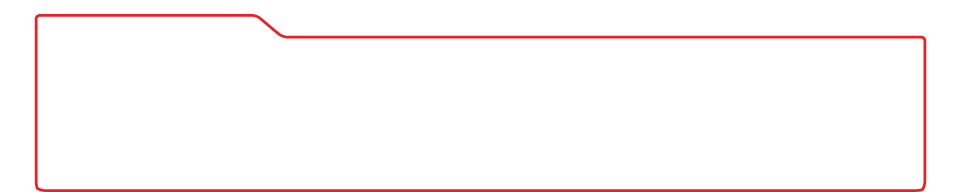
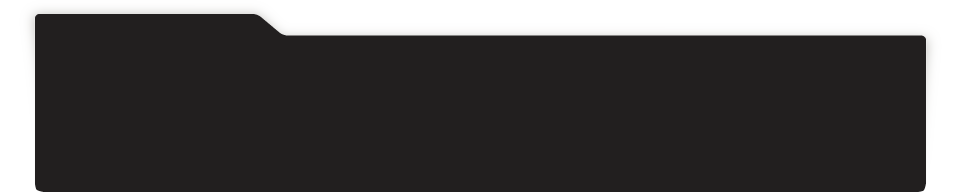
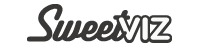
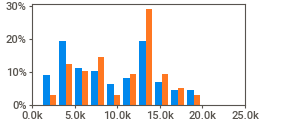
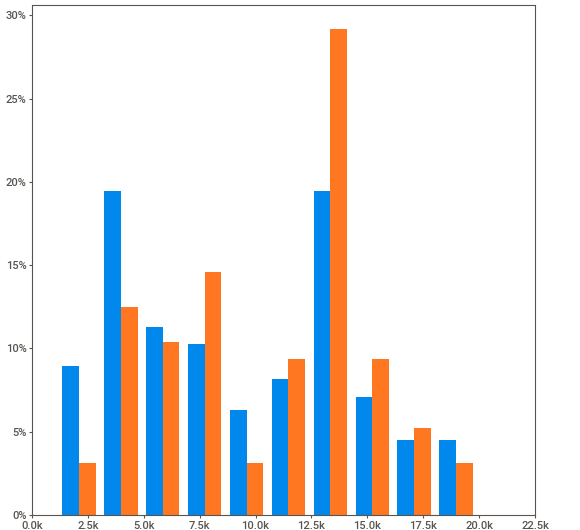
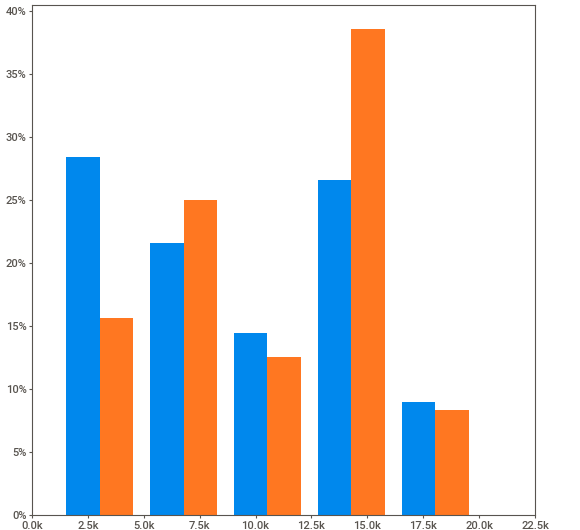
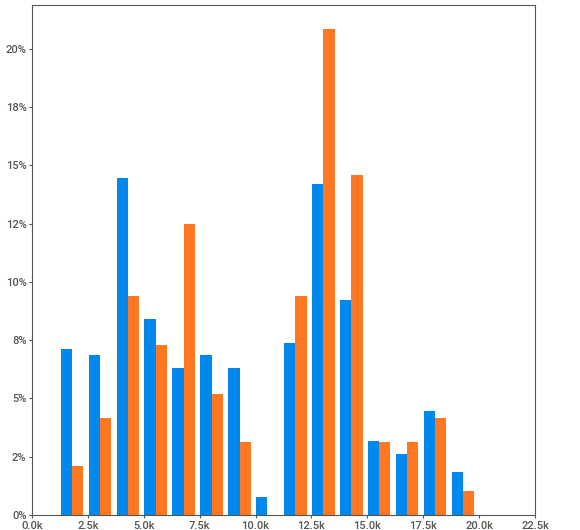
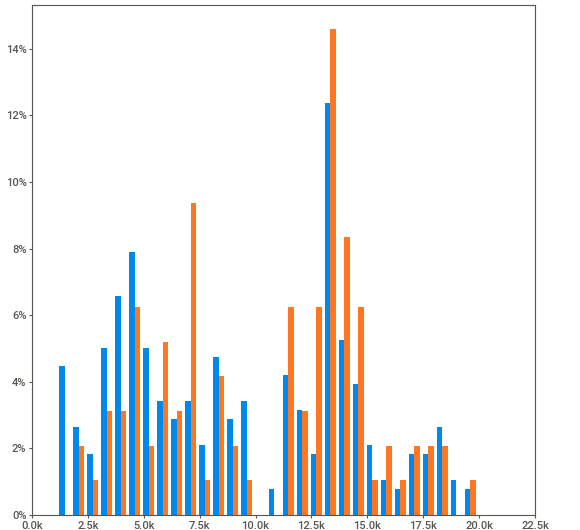
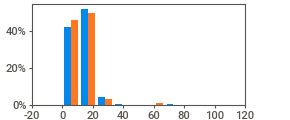
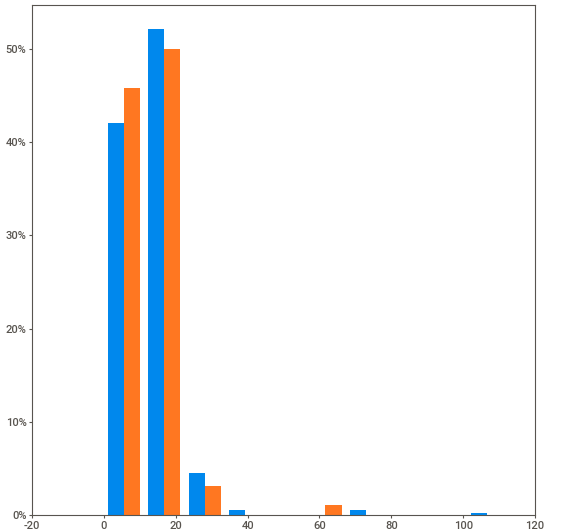
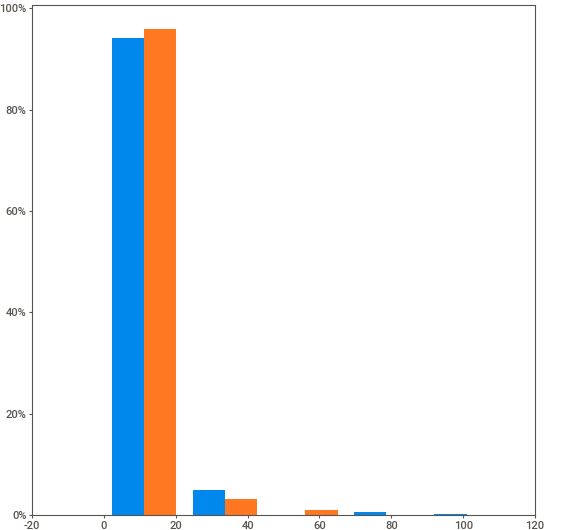
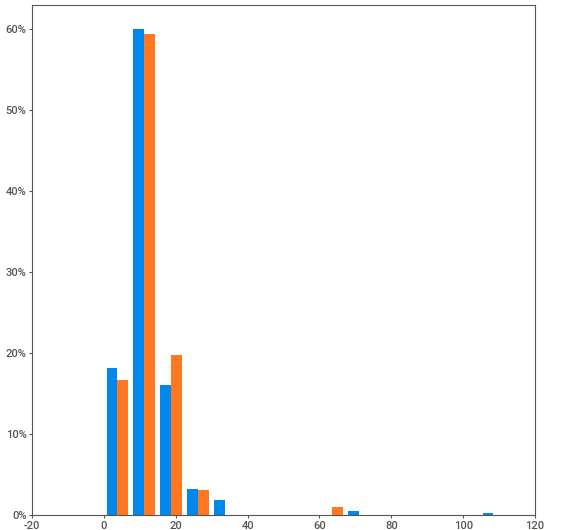
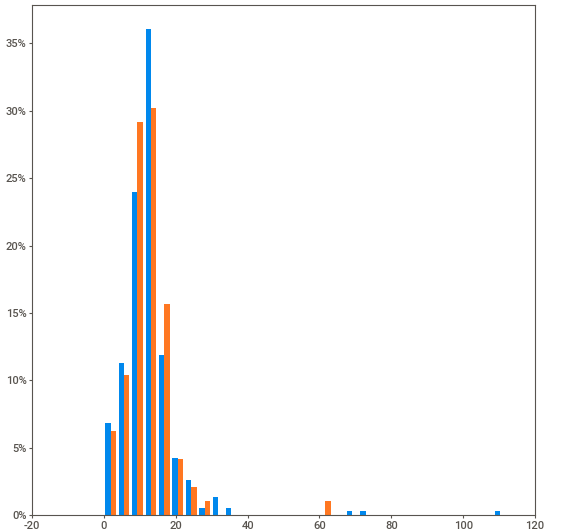
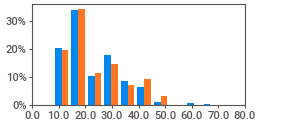
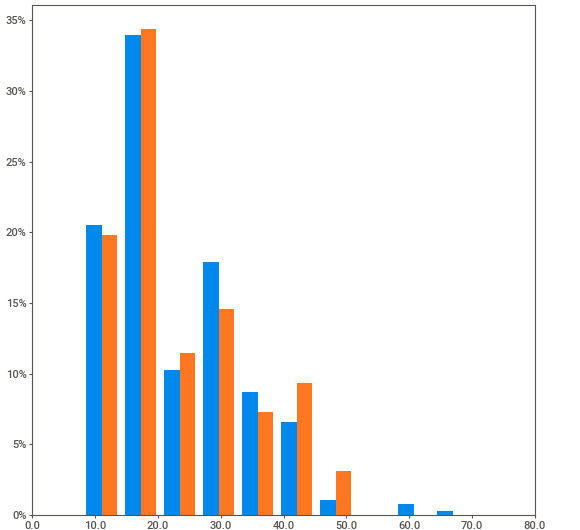
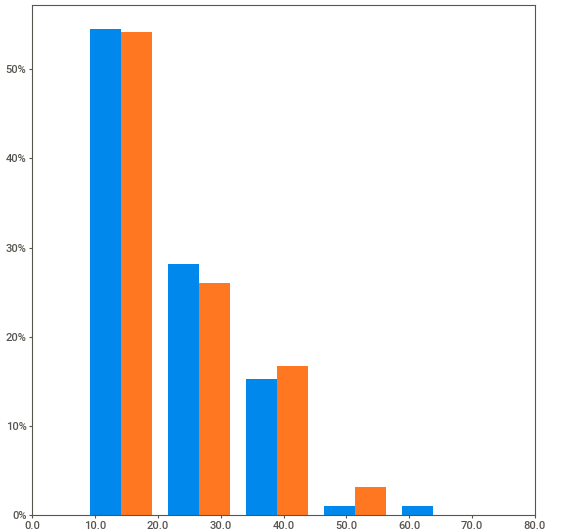
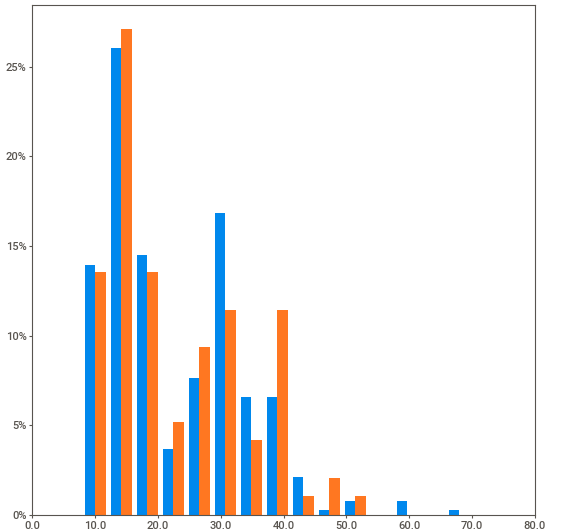
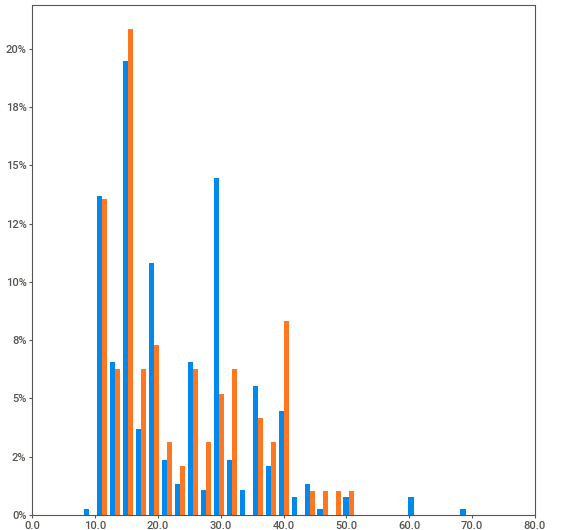
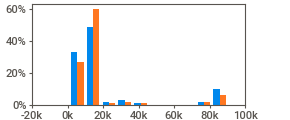
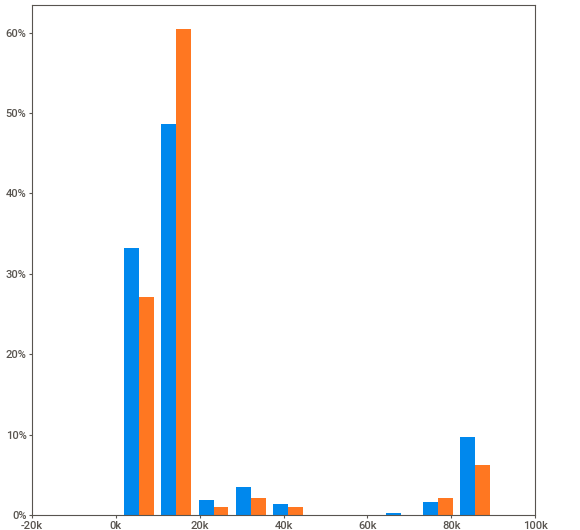
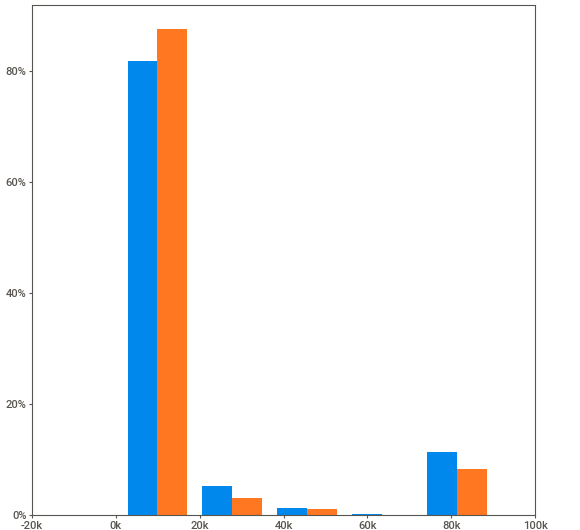
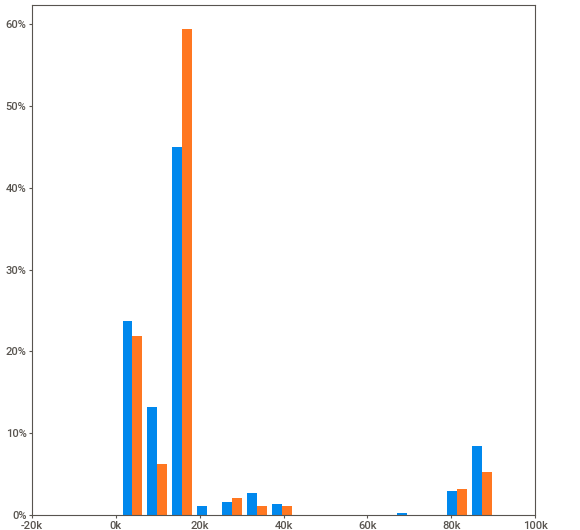
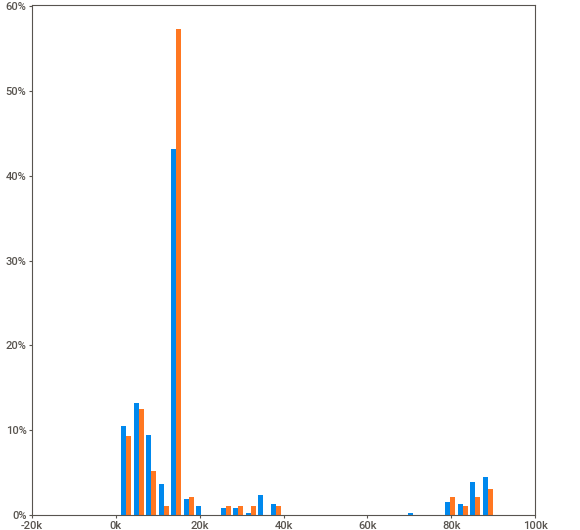
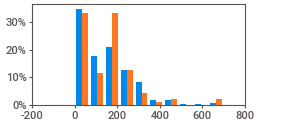
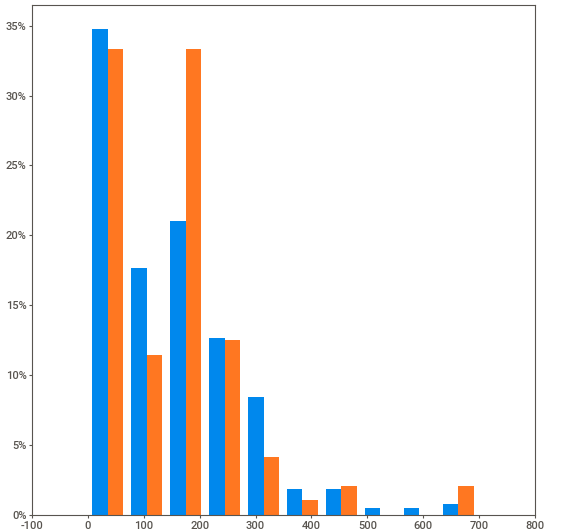
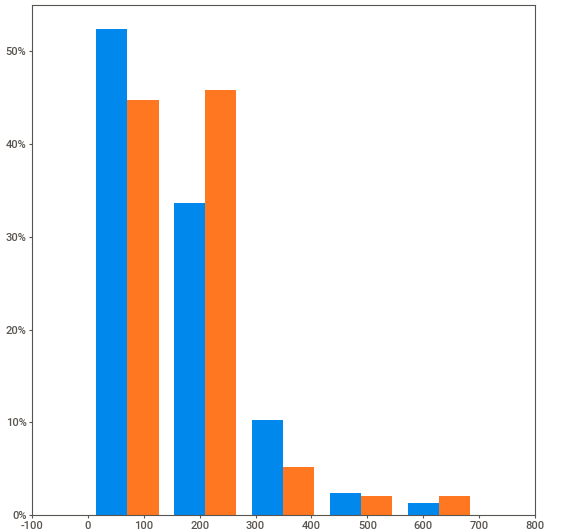
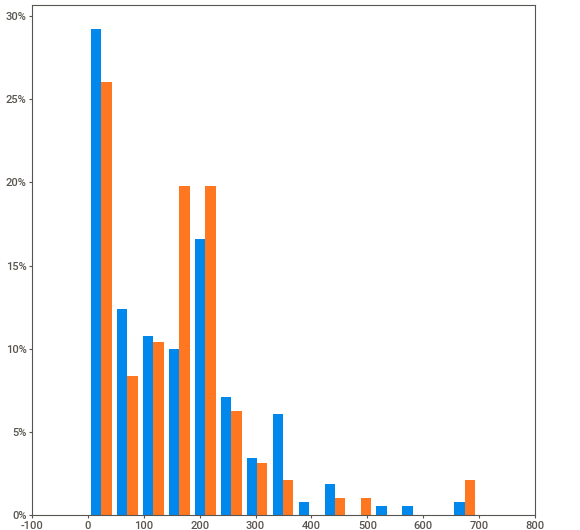
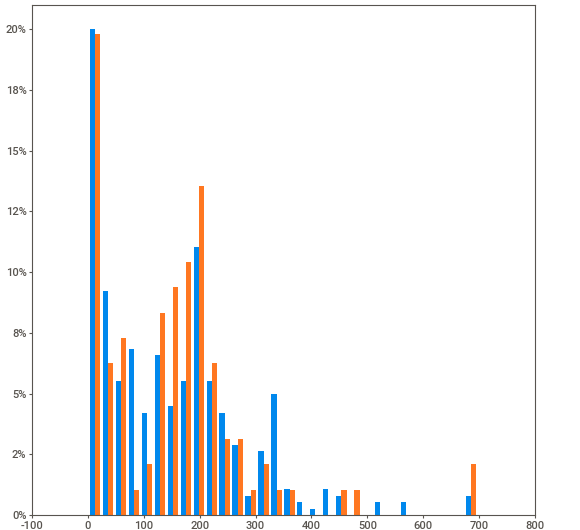
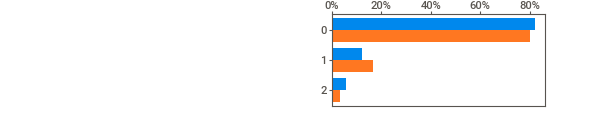
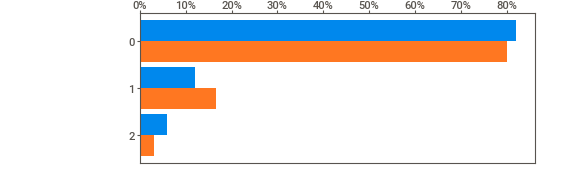
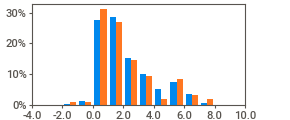
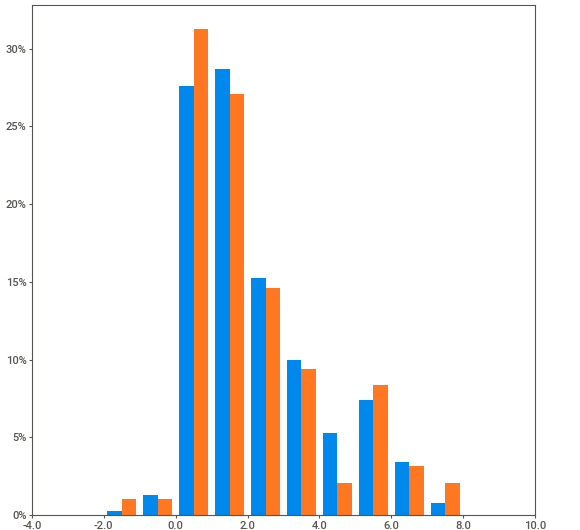
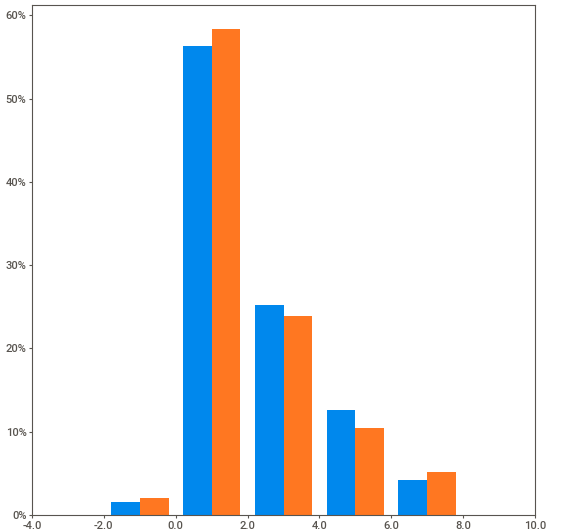
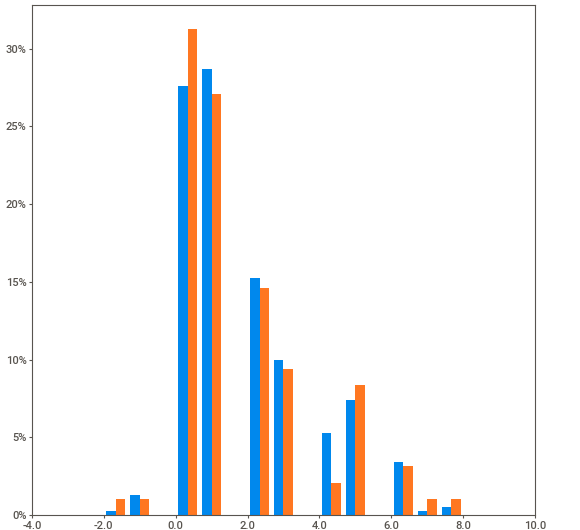
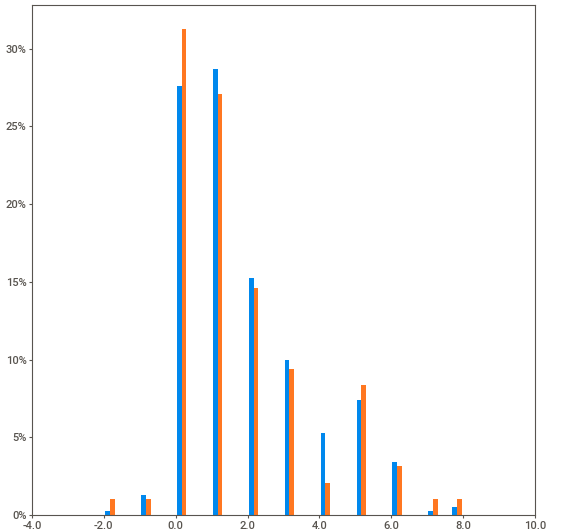
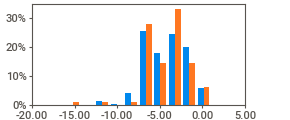
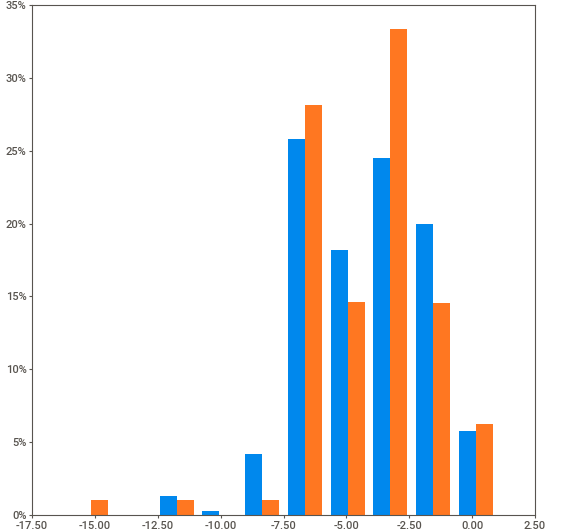
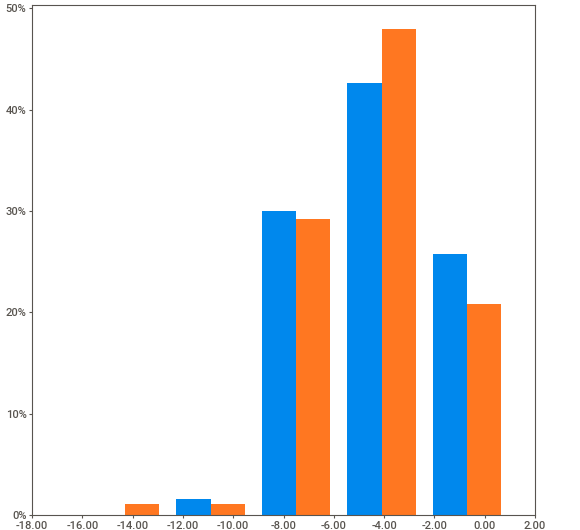
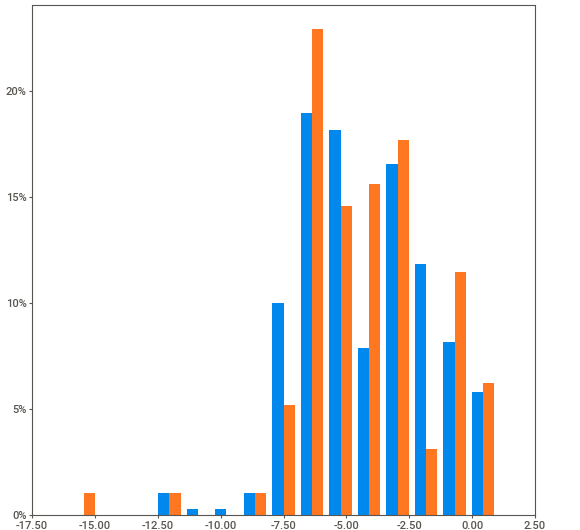
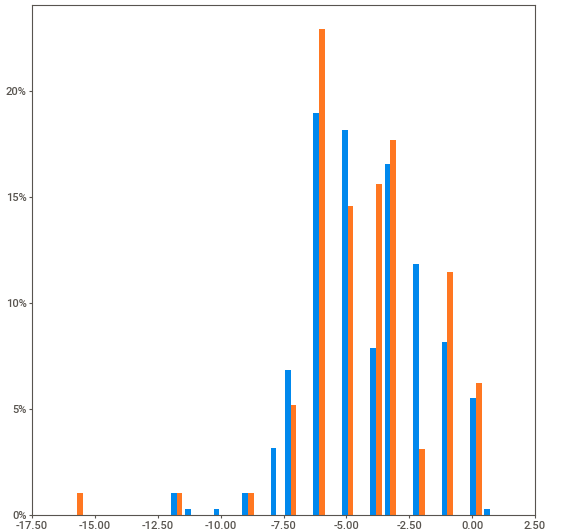
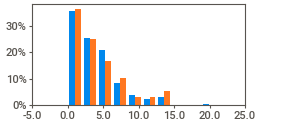
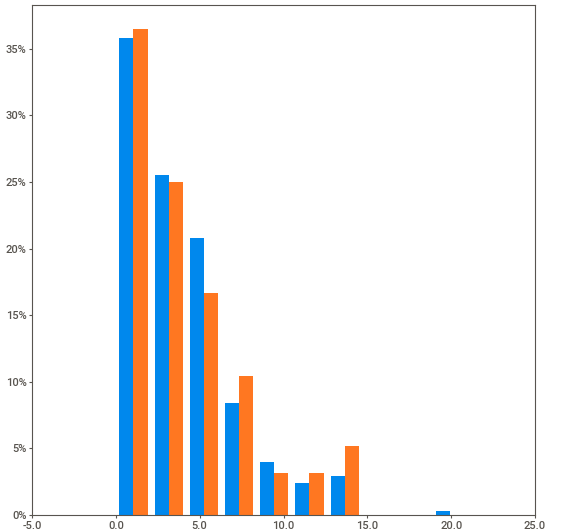
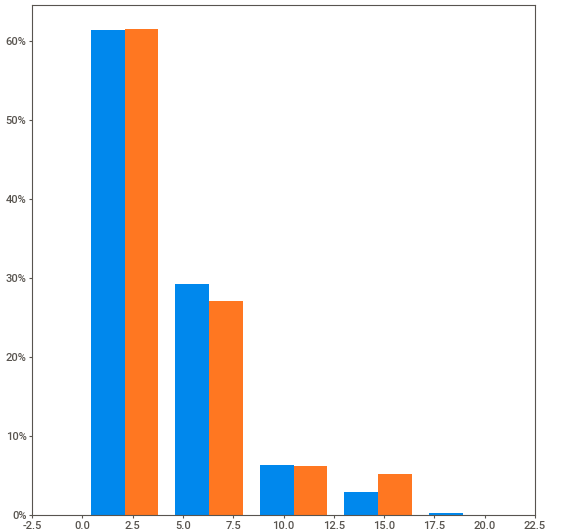
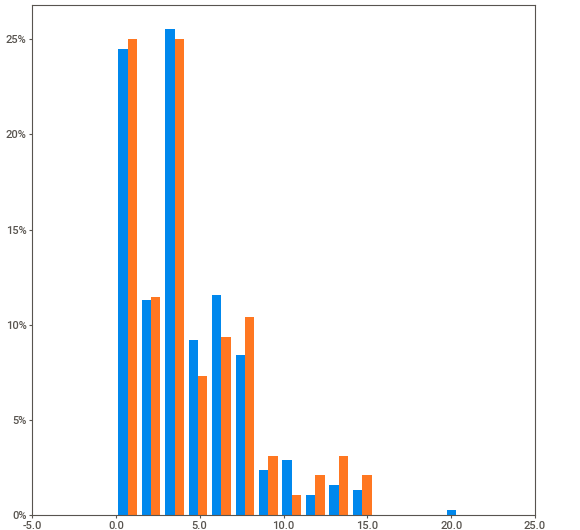
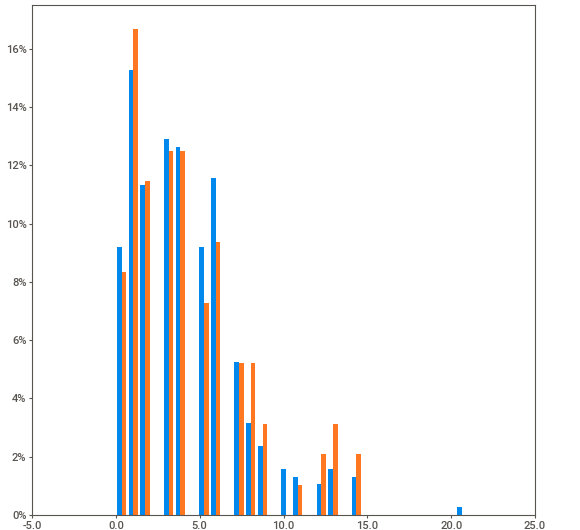
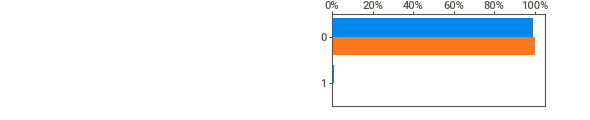
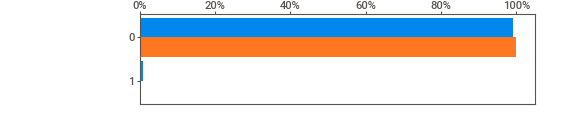
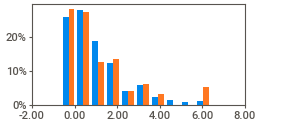
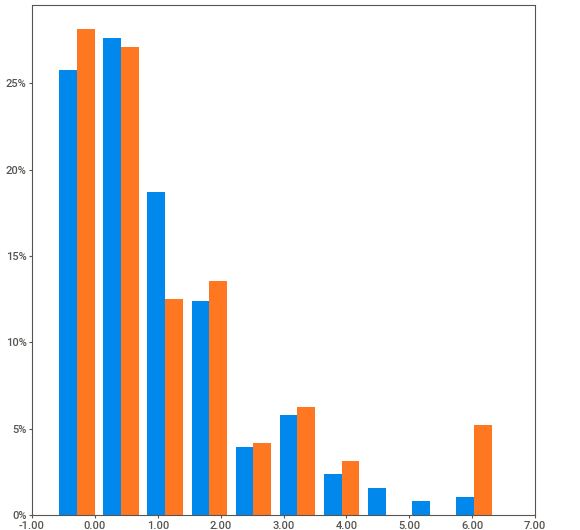
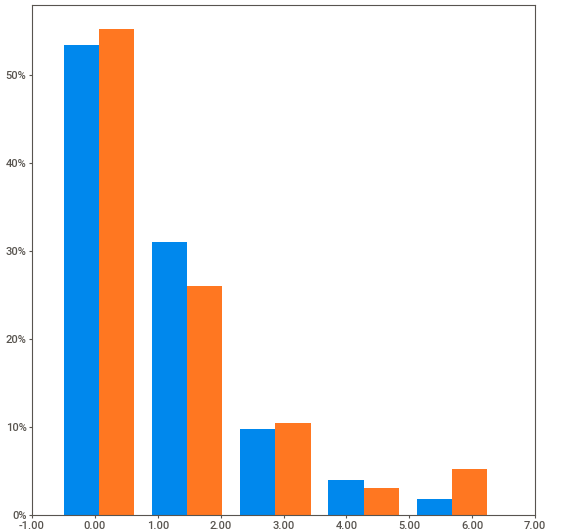
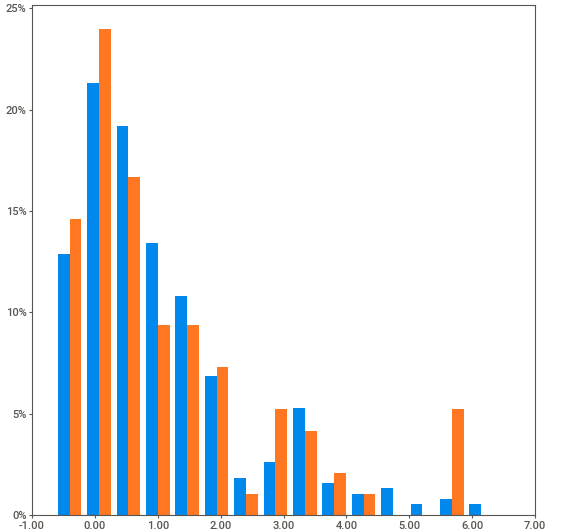
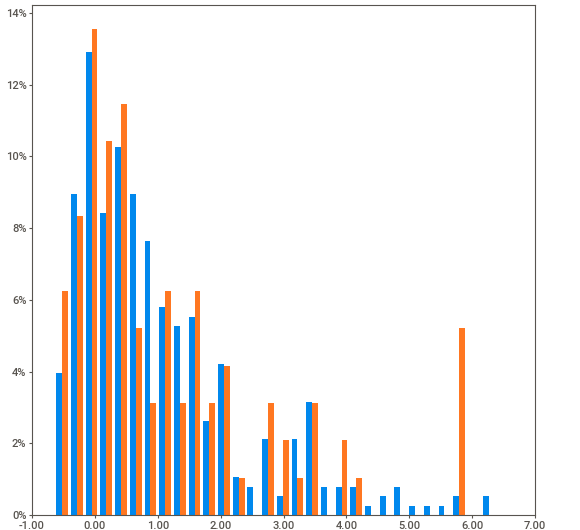
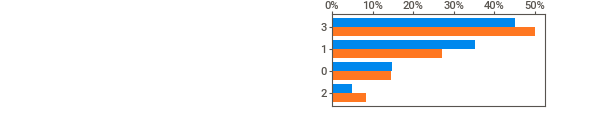
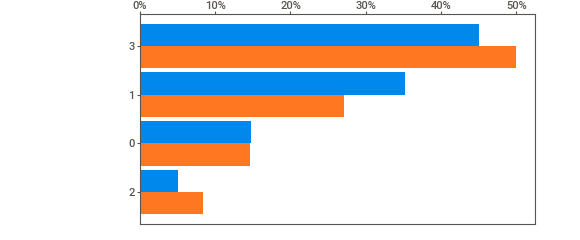
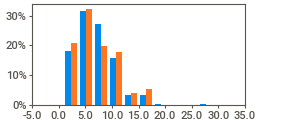
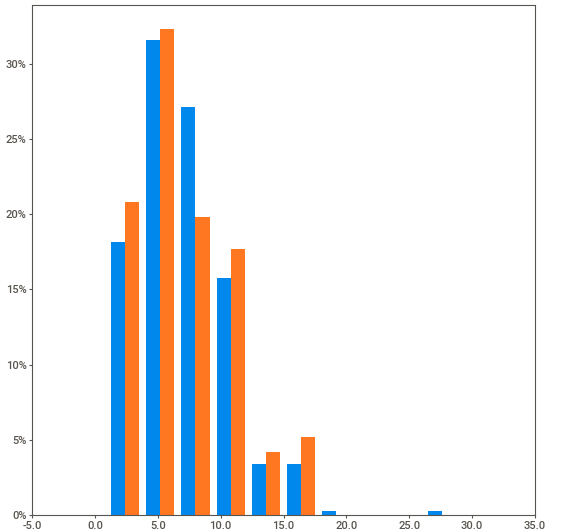
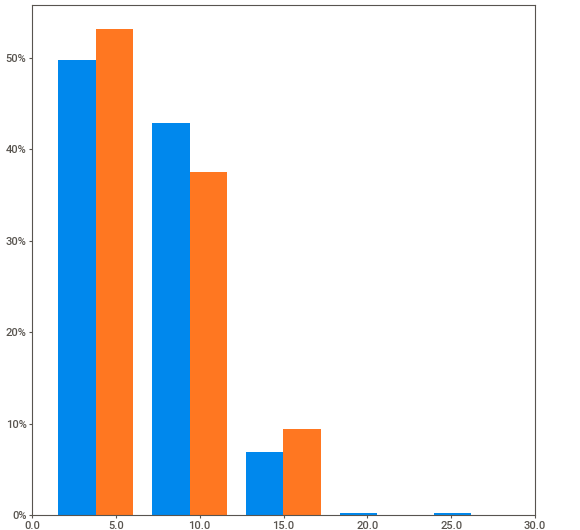
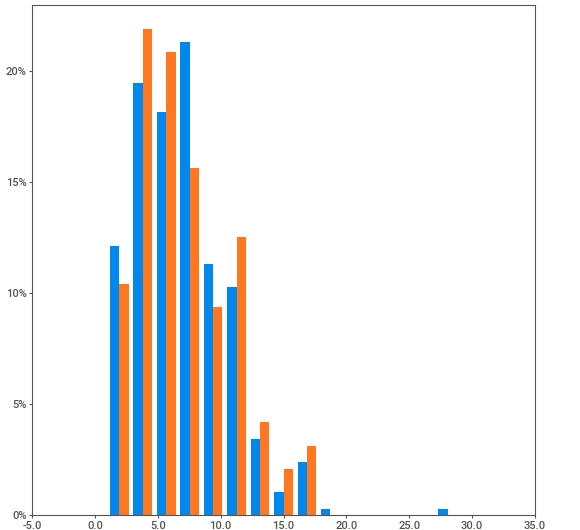
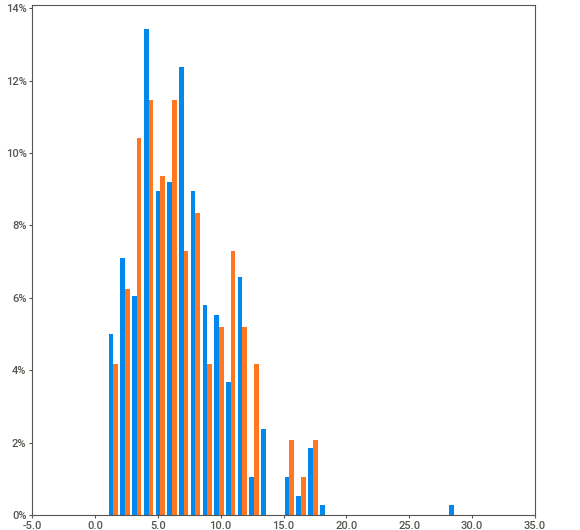
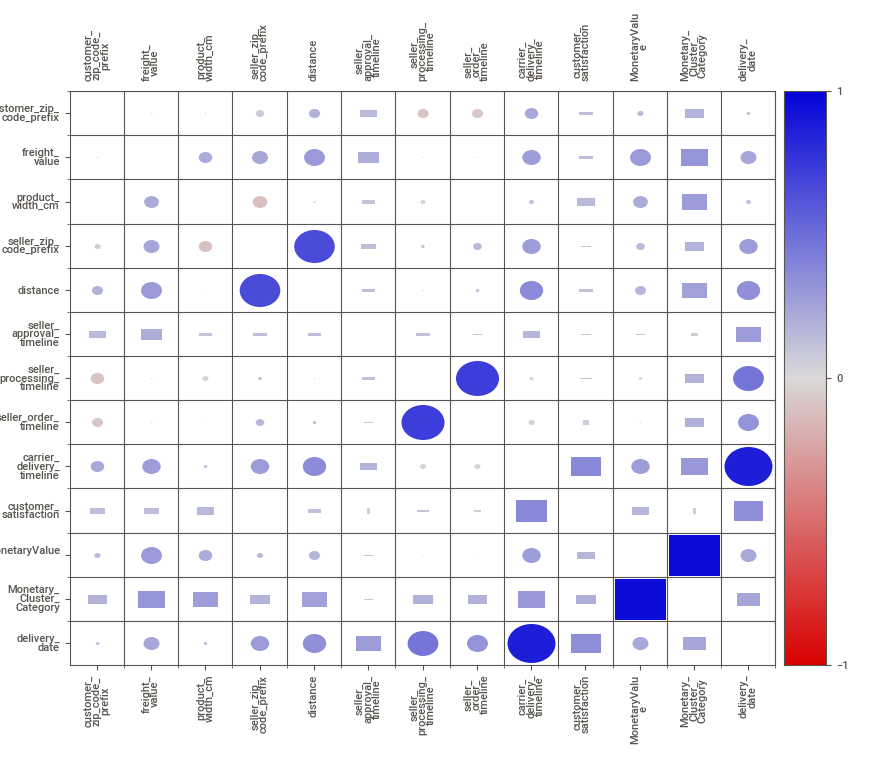
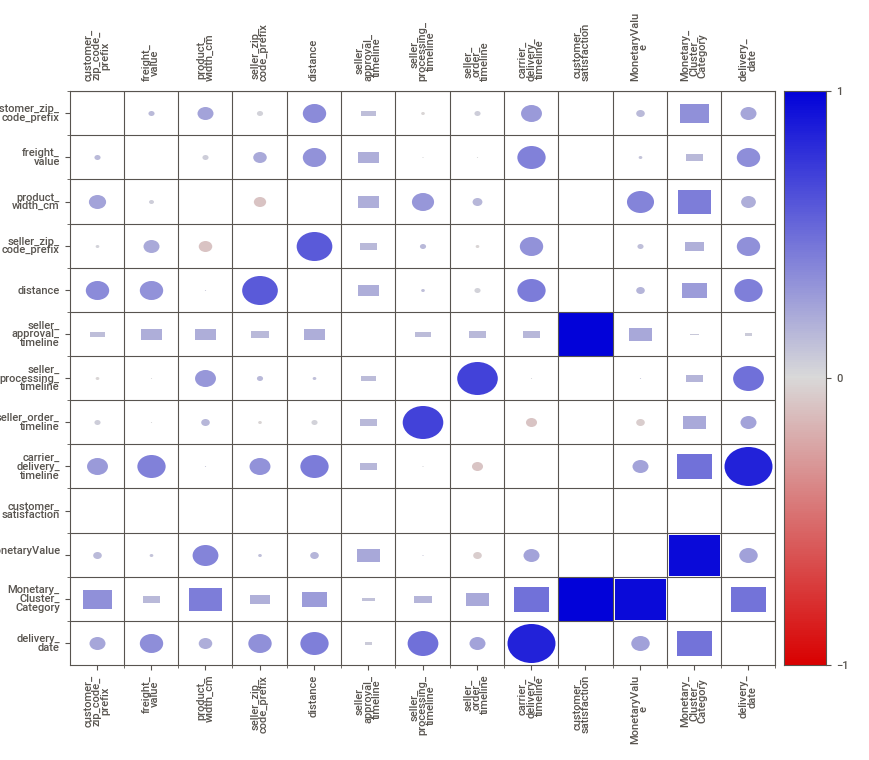

In [601]:
comparison_report.show_notebook() # Using the default values (w="100%", h=750, layout="vertical"), all can be overridden in an INI, see below)

##### **ML MODELS**

###### **PYCARET AUTOML FOR DIFFERENT ML MODEL PERFORMANCE**

In [602]:
from pycaret.regression import *

In [603]:
Reg_Df = Final_X
Reg_Df['actual_delivery_timeline']=y

In [604]:
Reg_Df.head()

customer_zip_code_prefix  freight_value  product_width_cm  \
0                     11065           2.34              50.0   
1                     13503          11.29              70.0   
2                      8041          10.54              50.0   
3                      8041          10.54              45.0   
4                     14340          13.91              50.0   

   seller_zip_code_prefix  distance  seller_approval_timeline  \
0                    3333     31.27                         0   
1                    3333    101.60                         0   
2                    3333      9.05                         1   
3                    3333      9.05                         1   
4                    3333    190.72                         0   

   seller_processing_timeline  seller_order_timeline  \
0                           2                     -3   
1                           2                     -3   
2                           1                     -5   
3                           1                     -5   
4                           1                     -5   

   carrier_delivery_timeline  customer_satisfaction  MonetaryValue  \
0                          1                      0       1.039471   
1                          0                      0       1.540398   
2                          4                      0       3.213548   
3                          4                      0       3.213548   
4                          6                      0       3.533764   

   Monetary_Cluster_Category  actual_delivery_timeline  
0                          1                         4  
1                          1                         3  
2                          0                         8  
3                          0                         8  
4                          0                         7

In [605]:
#setup pycaret
exp_name = setup(data = Reg_Df,  target = 'actual_delivery_timeline',normalize=True,silent=True)

Description                     Value
0                               session_id                      5453
1                                   Target  actual_delivery_timeline
2                            Original Data                 (476, 13)
3                           Missing Values                     False
4                         Numeric Features                         6
5                     Categorical Features                         6
6                         Ordinal Features                     False
7                High Cardinality Features                     False
8                  High Cardinality Method                      None
9                    Transformed Train Set                 (333, 53)
10                    Transformed Test Set                 (143, 53)
11                      Shuffle Train-Test                      True
12                     Stratify Train-Test                     False
13                          Fold Generator                     KFold
14                             Fold Number                        10
15                                CPU Jobs                        -1
16                                 Use GPU                     False
17                          Log Experiment                     False
18                         Experiment Name          reg-default-name
19                                     USI                      8005
20                         Imputation Type                    simple
21          Iterative Imputation Iteration                      None
22                         Numeric Imputer                      mean
23      Iterative Imputation Numeric Model                      None
24                     Categorical Imputer                  constant
25  Iterative Imputation Categorical Model                      None
26           Unknown Categoricals Handling            least_frequent
27                               Normalize                      True
28                        Normalize Method                    zscore
29                          Transformation                     False
30                   Transformation Method                      None
31                                     PCA                     False
32                              PCA Method                      None
33                          PCA Components                      None
34                     Ignore Low Variance                     False
35                     Combine Rare Levels                     False
36                    Rare Level Threshold                      None
37                         Numeric Binning                     False
38                         Remove Outliers                     False
39                      Outliers Threshold                      None
40                Remove Multicollinearity                     False
41             Multicollinearity Threshold                      None
42             Remove Perfect Collinearity                      True
43                              Clustering                     False
44                    Clustering Iteration                      None
45                     Polynomial Features                     False
46                       Polynomial Degree                      None
47                    Trignometry Features                     False
48                    Polynomial Threshold                      None
49                          Group Features                     False
50                       Feature Selection                     False
51                Feature Selection Method                   classic
52            Features Selection Threshold                      None
53                     Feature Interaction                     False
54                           Feature Ratio                     False
55                   Interaction Threshold                      None
56                        Transform Target                     False
57                 Transform 

In [606]:
best_reg_model = compare_models(fold=5)

Model          MAE           MSE  \
br                         Bayesian Ridge       0.6033  1.278200e+00   
ridge                    Ridge Regression       0.7232  1.586600e+00   
huber                     Huber Regressor       0.6600  1.945800e+00   
par          Passive Aggressive Regressor       0.7926  2.231500e+00   
et                  Extra Trees Regressor       0.7818  2.460800e+00   
gbr           Gradient Boosting Regressor       0.9263  2.582100e+00   
lightgbm  Light Gradient Boosting Machine       1.2275  3.692200e+00   
rf                Random Forest Regressor       1.2487  4.253400e+00   
dt                Decision Tree Regressor       1.1905  5.938800e+00   
ada                    AdaBoost Regressor       2.3373  8.327900e+00   
omp           Orthogonal Matching Pursuit       2.2312  8.621300e+00   
knn                 K Neighbors Regressor       2.3437  1.045230e+01   
en                            Elastic Net       3.1552  1.564440e+01   
lasso                    Lasso Regression       3.2087  1.620850e+01   
llar         Lasso Least Angle Regression       3.2696  1.679260e+01   
dummy                     Dummy Regressor       3.2696  1.679260e+01   
lr                      Linear Regression       1.0765  5.329900e+01   
lar                Least Angle Regression  265642.9671  5.951196e+12   

                  RMSE            R2   RMSLE        MAPE  TT (Sec)  
br        9.742000e-01  9.278000e-01  0.1319      0.1203     0.022  
ridge     1.126300e+00  9.101000e-01  0.1564      0.1573     0.022  
huber     1.155700e+00  8.918000e-01  0.1494      0.1250     0.050  
par       1.314300e+00  8.740000e-01  0.1872      0.1702     0.020  
et        1.489700e+00  8.550000e-01  0.1930      0.1331     0.514  
gbr       1.437400e+00  8.550000e-01  0.1908      0.1966     0.096  
lightgbm  1.859100e+00  7.852000e-01  0.2248      0.2409     0.164  
rf        1.939700e+00  7.545000e-01  0.2503      0.2623     0.600  
dt        2.325100e+00  6.352000e-01  0.2924      0.2243     0.022  
ada       2.867100e+00  5.025000e-01  0.4233      0.6114     0.094  
omp       2.910700e+00  4.858000e-01  0.3738      0.4529     0.020  
knn       3.215200e+00  3.684000e-01  0.4194      0.5048     0.074  
en        3.946200e+00  5.430000e-02  0.5520      0.8481     0.020  
lasso     4.016700e+00  2.090000e-02  0.5627      0.8733     0.020  
llar      4.090300e+00 -1.630000e-02  0.5734      0.8956     0.018  
dummy     4.090300e+00 -1.630000e-02  0.5734      0.8956     0.014  
lr        3.807200e+00 -1.776500e+00  0.1611      0.1544     0.882  
lar       1.192070e+06 -4.455840e+11  4.3601  30807.1874     0.028

###### **MULLER LOOP**

In [607]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [608]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from time import time
from sklearn.metrics import r2_score

names = ["RandomForestRegressor",
         "DecisionTreeRegressor", "SVR", "LinearRegression", "Ridge",
         "BayesianRidge","MLPRegressor"]

classifiers = [
    RandomForestRegressor(max_depth=2, random_state=0),
    DecisionTreeRegressor(max_depth=2, random_state=0),
    SVR(epsilon=0.2),
    LinearRegression(),
    Ridge(alpha=1.0),
    BayesianRidge(),
    MLPRegressor(random_state=1, max_iter=5000)
    ]

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train_norm, y_train)
    ypred = clf.predict(X_test_norm)
    score = 100.0 * r2_score(y_test, ypred, multioutput='variance_weighted')
    print('Regression = %s, R2 Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression = RandomForestRegressor, R2 Score (test, accuracy) = 95.47, Training time = 0.17 seconds
Regression = DecisionTreeRegressor, R2 Score (test, accuracy) = 91.41, Training time = 0.00 seconds
Regression = SVR, R2 Score (test, accuracy) = 92.28, Training time = 0.02 seconds
Regression = LinearRegression, R2 Score (test, accuracy) = 99.97, Training time = 0.00 seconds
Regression = Ridge, R2 Score (test, accuracy) = 99.96, Training time = 0.00 seconds
Regression = BayesianRidge, R2 Score (test, accuracy) = 99.97, Training time = 0.00 seconds
Regression = MLPRegressor, R2 Score (test, accuracy) = 98.86, Training time = 2.55 seconds
--------------------------------------------------------------------------------
Best --> Regression = BayesianRidge, Score (test, accuracy) = 99.97


##### **INTERACTIVE DASHBOARDS**

In [609]:
#RandomForestRegressor
model1 = RandomForestRegressor(max_depth=2, random_state=0)
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [610]:
#DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [611]:
#SVR
model3 = SVR(epsilon=0.2)
model3.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [612]:
#Linear Regression
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [613]:
#Creating Dashbord
from explainerdashboard import RegressionExplainer,ExplainerDashboard,ExplainerHub
explainer1 = RegressionExplainer(model1, X_test,y_test)
explainer2 = RegressionExplainer(model2, X_test,y_test)
explainer3 = RegressionExplainer(model3, X_test,y_test)
explainer4 = RegressionExplainer(model4, X_test,y_test)

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Generating self.shap_explainer = shap.TreeExplainer(model)
Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Generating self.shap_explainer = shap.LinearExplainer(modelX)...


In [614]:
db1 = ExplainerDashboard(explainer1)
db2 = ExplainerDashboard(explainer2)
db3 = ExplainerDashboard(explainer2)
db4 = ExplainerDashboard(explainer2)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating l

**EXPLAINERDASHBOARD**

In [615]:
db1.run(mode='inline')

Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

In [616]:
db2.run(mode='inline')

Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

**EXPLAINERHUB**

In [617]:
#run dashboard
#hub = ExplainerHub([db1, db2, db3, db4])
#hub.run()

#### **USECASE2 - FREIGHT VALUE PREDICTION**

##### **DIFFERENT FEATURES IN THE DATASET**

In [618]:
X=Regression_Df.drop(columns=['freight_value','product_category_name_english','customer_id','churn_customer_category'])
y=Regression_Df['freight_value']

In [619]:
#features in the dataset
feature_name=X.columns
X.dtypes

seller_on_time                float64
seller_order_approval_time    float64
review_score                  float64
reliabilty_score              float64
customer_zip_code_prefix        int64
price                         float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
seller_zip_code_prefix          int64
distance                      float64
actual_delivery_timeline        int64
seller_approval_timeline        int64
seller_processing_timeline      int64
seller_order_timeline           int64
carrier_delivery_timeline       int64
customer_satisfaction           int64
pkg_density                   float64
MonetaryValue                 float64
Frequency                     float64
Recently                      float64
Frequency_Cluster_Category      int64
Recency_Cluster_Category        int64
Monetary_Cluster_Category       int64
dtype: object

##### **DIFFERENT FEATURE SELECTION METHODS**

######**Pearson Correlation**

In [620]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    cor_list=X.corrwith(y)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [621]:
import numpy as np
num_feats=10
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [622]:
for x in cor_feature:
  print(x)

product_width_cm
Monetary_Cluster_Category
seller_zip_code_prefix
actual_delivery_timeline
MonetaryValue
price
distance
carrier_delivery_timeline
product_weight_g
pkg_density


######**CHI-SQUARED**

In [635]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, round(y))
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [636]:
for x in chi_feature:
  print(x)

product_weight_g
seller_zip_code_prefix
distance
seller_approval_timeline
customer_satisfaction
pkg_density
Frequency
Frequency_Cluster_Category
Recency_Cluster_Category
Monetary_Cluster_Category


######**Recursive Feature Elimination**

In [638]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, round(y))
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 25 features.
Fitting estimator with 15 features.
10 selected features


In [629]:
rfe_feature

['customer_zip_code_prefix',
 'product_width_cm',
 'seller_zip_code_prefix',
 'distance',
 'seller_approval_timeline',
 'seller_processing_timeline',
 'seller_order_timeline',
 'carrier_delivery_timeline',
 'MonetaryValue',
 'Frequency']

######**Lasso: SelectFromModel**

In [639]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, round(y))

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

10 selected features


In [640]:
embeded_lr_feature

['customer_zip_code_prefix',
 'product_height_cm',
 'seller_zip_code_prefix',
 'distance',
 'seller_approval_timeline',
 'MonetaryValue',
 'Recently',
 'Frequency_Cluster_Category',
 'Recency_Cluster_Category',
 'Monetary_Cluster_Category']

######**Tree-based: SelectFromModel**

In [642]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, round(y))

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [643]:
embeded_rf_feature

['customer_zip_code_prefix',
 'price',
 'product_weight_g',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'distance',
 'pkg_density',
 'MonetaryValue',
 'Recently']

###### **COMBINE ALL METHODS AND CHOOSE TOP N FEATURES**

In [644]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [645]:
feature_selection_df

Feature  Pearson  Chi-2    RFE  Logistics  \
1       seller_zip_code_prefix     True   True   True       True   
2                     distance     True   True   True       True   
3    Monetary_Cluster_Category     True   True   True       True   
4                MonetaryValue     True  False   True       True   
5     seller_approval_timeline    False   True   True       True   
6             product_weight_g     True   True  False      False   
7            product_height_cm    False  False   True       True   
8                  pkg_density     True   True  False      False   
9     Recency_Cluster_Category    False   True   True       True   
10  Frequency_Cluster_Category    False   True   True       True   
11            product_width_cm     True  False  False      False   
12                       price     True  False  False      False   
13    customer_zip_code_prefix    False  False  False       True   
14   carrier_delivery_timeline     True  False   True      False   
15                    Recently    False  False  False       True   
16  seller_processing_timeline    False  False   True      False   
17       customer_satisfaction    False   True  False      False   
18    actual_delivery_timeline     True  False  False      False   
19                   Frequency    False   True  False      False   
20       seller_order_timeline    False  False  False      False   
21  seller_order_approval_time    False  False  False      False   
22              seller_on_time    False  False  False      False   
23                review_score    False  False  False      False   
24            reliabilty_score    False  False  False      False   
25           product_length_cm    False  False  False      False   

    Random Forest  Total  
1            True      5  
2            True      5  
3           False      4  
4            True      4  
5           False      3  
6            True      3  
7            True      3  
8            True      3  
9           False      3  
10          False      3  
11           True      2  
12           True      2  
13           True      2  
14          False      2  
15           True      2  
16          False      1  
17          False      1  
18          False      1  
19          False      1  
20          False      0  
21          False      0  
22          False      0  
23          False      0  
24          False      0  
25          False      0

In [693]:
#select top 12 features
final_features = feature_selection_df[:15]['Feature']

In [694]:
final_features = final_features.values

In [695]:
final_features

array(['seller_zip_code_prefix', 'distance', 'Monetary_Cluster_Category',
       'MonetaryValue', 'seller_approval_timeline', 'product_weight_g',
       'product_height_cm', 'pkg_density', 'Recency_Cluster_Category',
       'Frequency_Cluster_Category', 'product_width_cm', 'price',
       'customer_zip_code_prefix', 'carrier_delivery_timeline',
       'Recently'], dtype=object)

In [696]:
#columns to drop
drop_columns=[]

for col in X.columns:
  if col in final_features:
    pass
  else:
    drop_columns.append(col)

In [697]:
drop_columns

['seller_on_time',
 'seller_order_approval_time',
 'review_score',
 'reliabilty_score',
 'product_length_cm',
 'actual_delivery_timeline',
 'seller_processing_timeline',
 'seller_order_timeline',
 'customer_satisfaction',
 'Frequency']

In [698]:
#drop unnecessary features 
Final_X = X.drop(columns=drop_columns)

In [699]:
#dataframe with only the required features
Final_X

customer_zip_code_prefix  price  product_weight_g  product_height_cm  \
0                       11065   62.0             625.0               15.0   
1                       13503   95.0            4250.0               14.0   
2                        8041   62.0             625.0               15.0   
3                        8041   48.0             475.0                4.0   
4                       14340  127.0            1850.0               17.0   
..                        ...    ...               ...                ...   
471                     15093  115.0             200.0               14.0   
472                     15093  229.9             250.0               16.0   
473                     12288   16.8             148.0               27.0   
474                     14021   69.5            1100.0               24.0   
475                      4913    6.9             500.0               16.0   

     product_width_cm  seller_zip_code_prefix  distance  \
0                50.0                    3333     31.27   
1                70.0                    3333    101.60   
2                50.0                    3333      9.05   
3                45.0                    3333      9.05   
4                50.0                    3333    190.72   
..                ...                     ...       ...   
471              14.0                   15015    161.46   
472              16.0                   15015    161.46   
473              22.0                   13920     65.74   
474              24.0                   13920    126.59   
475              22.0                   13920     66.51   

     seller_approval_timeline  carrier_delivery_timeline  pkg_density  \
0                           0                          1         0.74   
1                           0                          0         5.41   
2                           1                          4         0.74   
3                           1                          4         2.53   
4                           0                          6         1.94   
..                        ...                        ...          ...   
471                         0                          1         2.45   
472                         0                          1         2.34   
473                         0                          4         0.62   
474                         1                          2         4.97   
475                         1                          1         2.77   

     MonetaryValue  Recently  Frequency_Cluster_Category  \
0         1.039471  0.465797                           1   
1         1.540398 -0.508316                           1   
2         3.213548 -0.113405                           3   
3         3.213548 -0.113405                           3   
4         3.533764 -0.021259                           1   
..             ...       ...                         ...   
471       3.508762 -0.679444                           1   
472       3.508762 -0.679444                           1   
473      -0.123142  0.571107                           1   
474       0.971633  0.268342                           1   
475      -0.547599  0.314415                           1   

     Recency_Cluster_Category  Monetary_Cluster_Category  
0                           1                          1  
1                           2                          1  
2                           2                          0  
3                           2                          0  
4                           2                          0  
..                        ...                        ...  
471                         2                          0  
472                         2                          0  
473                         1                          3  
474                         1                          1  
475                         1                          3  

[476 rows x 15 columns]

##### **TRAIN TEST SPLIT**

In [700]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final_X, y, test_size=0.2, random_state=21)

##### **VISUALIZE TRAIN TEST SPLIT**

**SWEETVIZ**

In [701]:
# importing sweetviz
import sweetviz as sv

training_date = X_train
training_date['delivery_date']= y_train

testing_data = X_test
testing_data['delivery_date']= y_test

#compare train and test
comparison_report = sv.compare([training_date,'Train'], [testing_data,'Test'])

                                             |          | [  0%]   00:00 -> (? left)


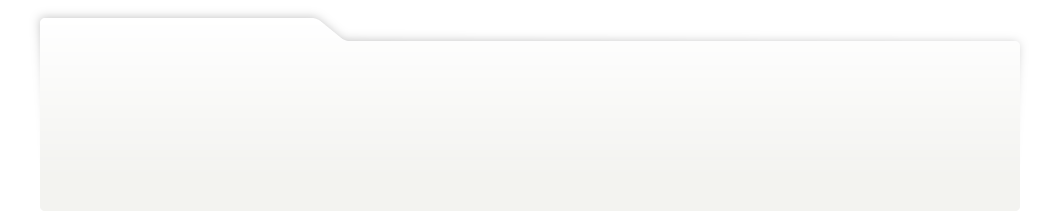
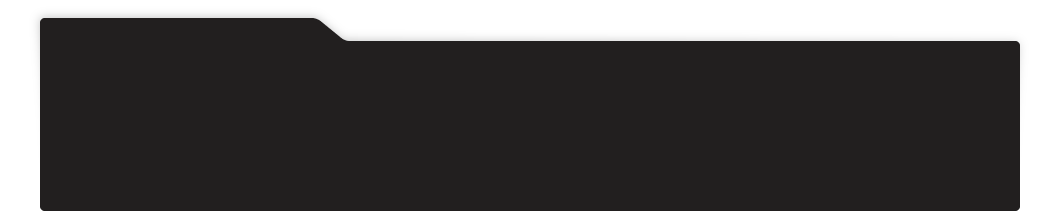
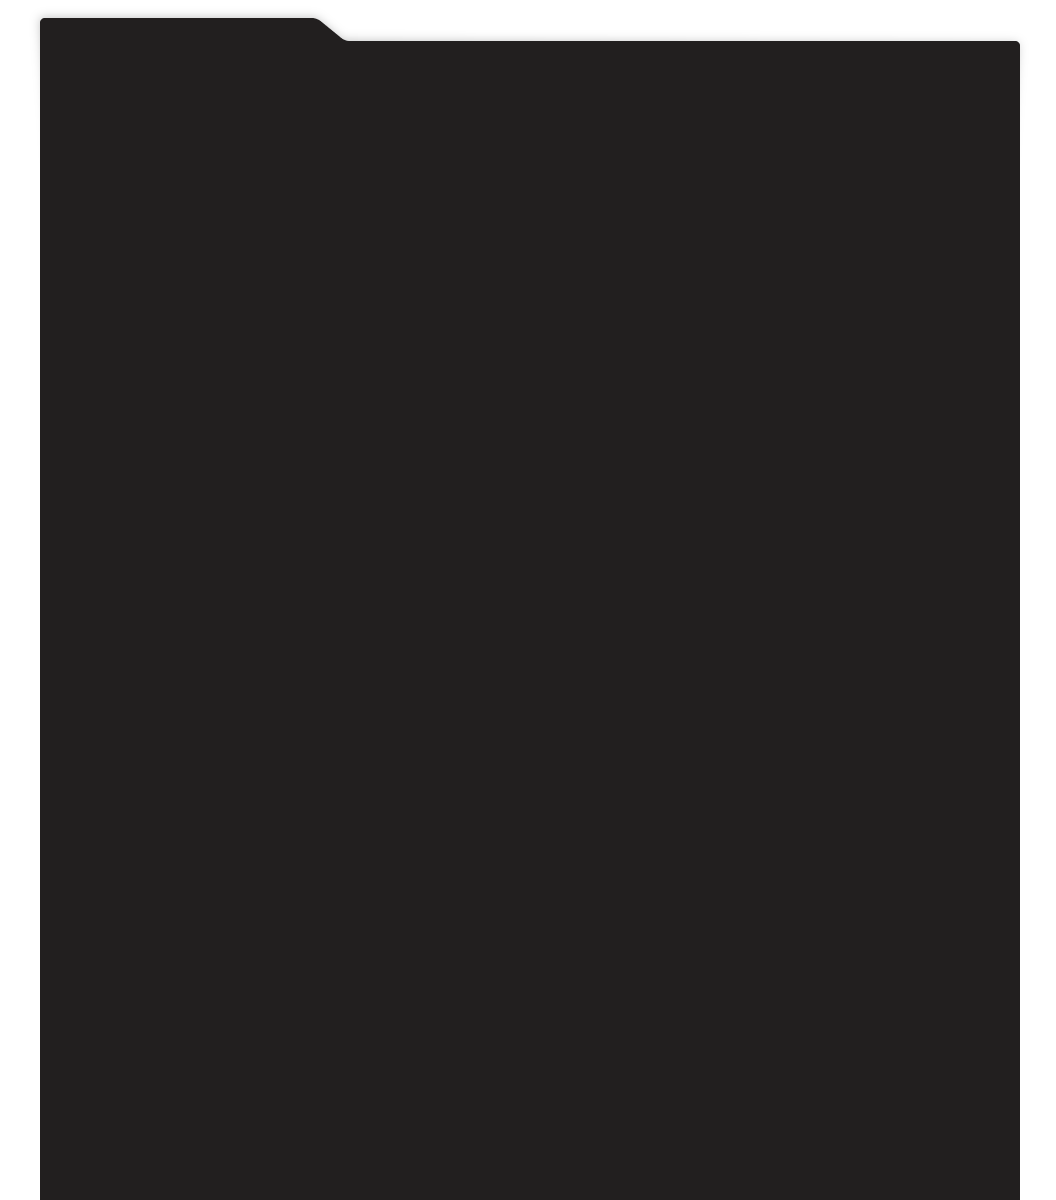
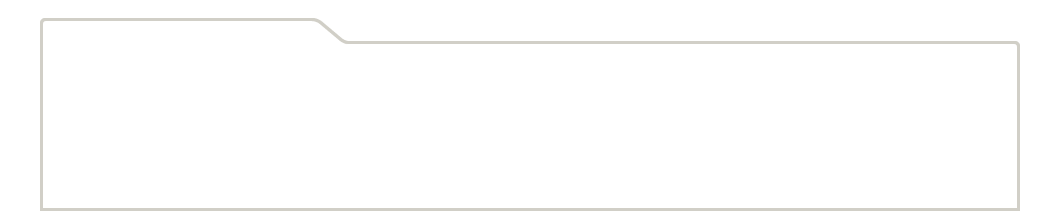
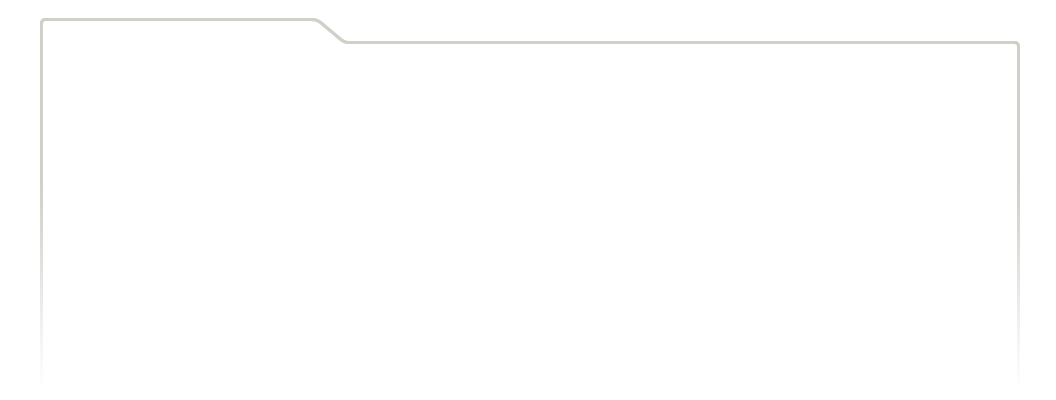
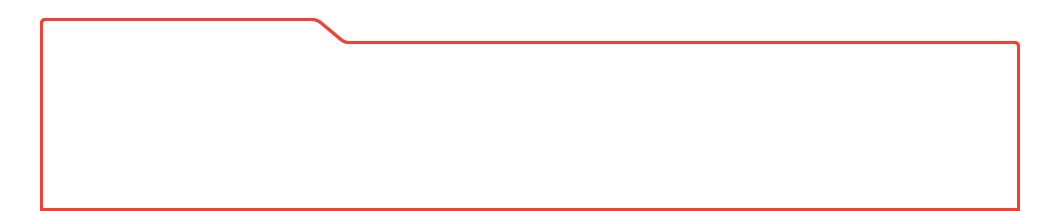
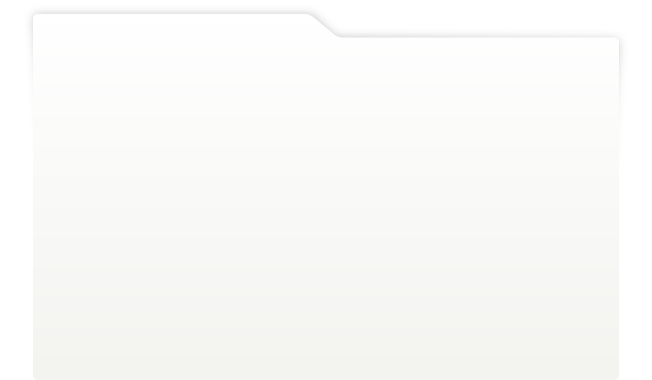
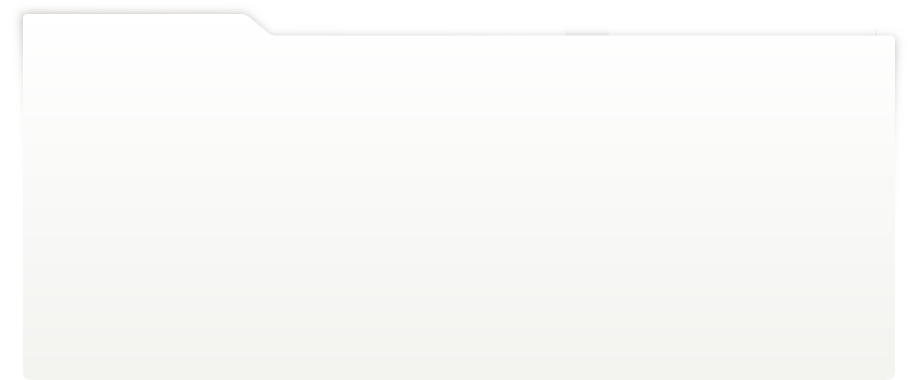
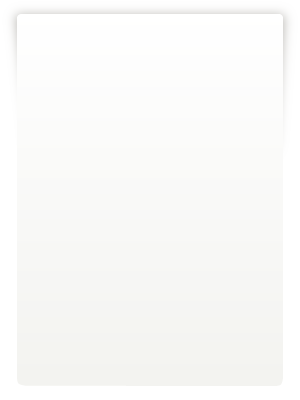
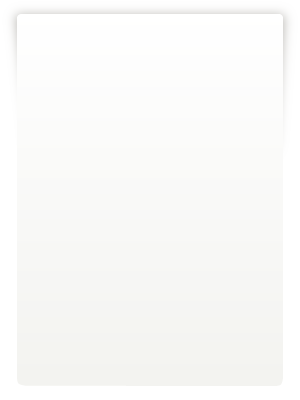
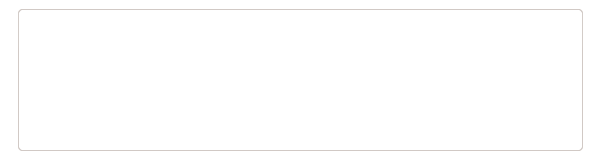
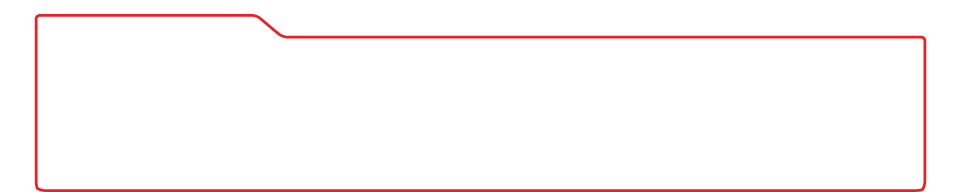
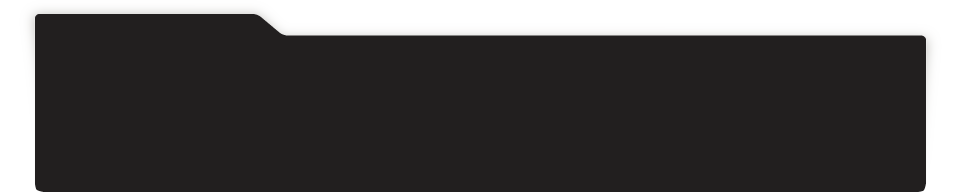
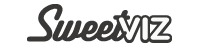
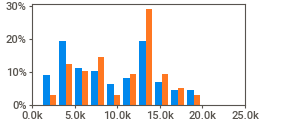
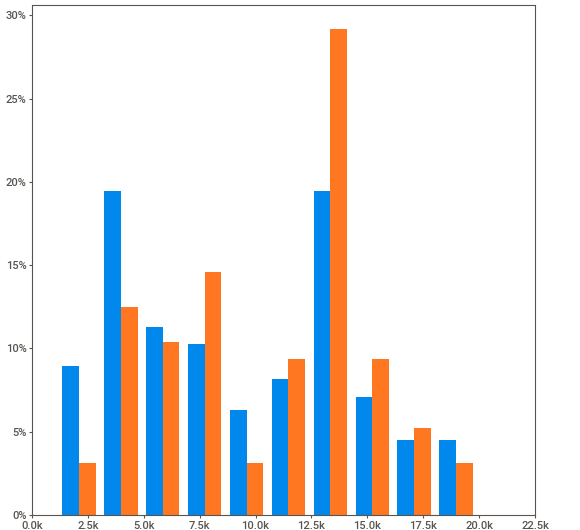
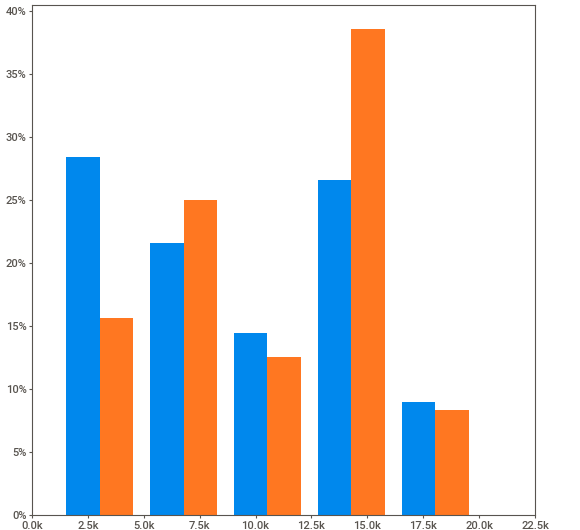
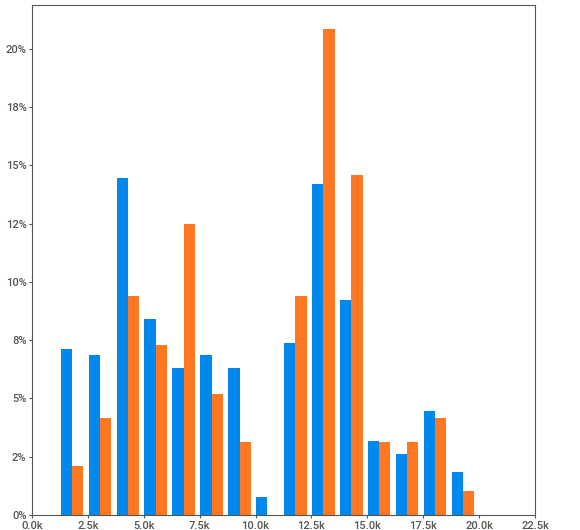
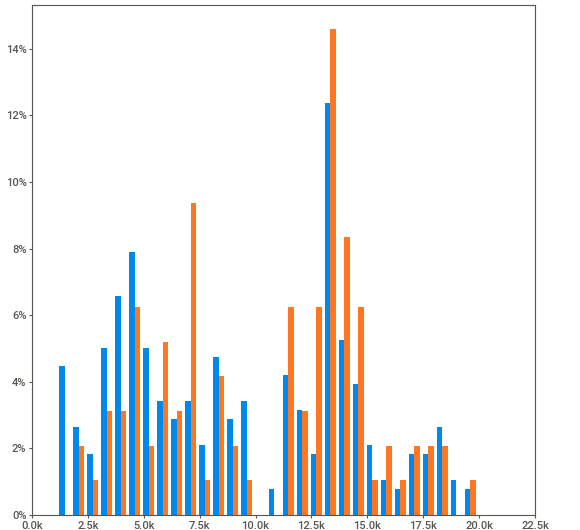
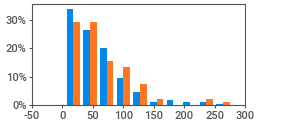
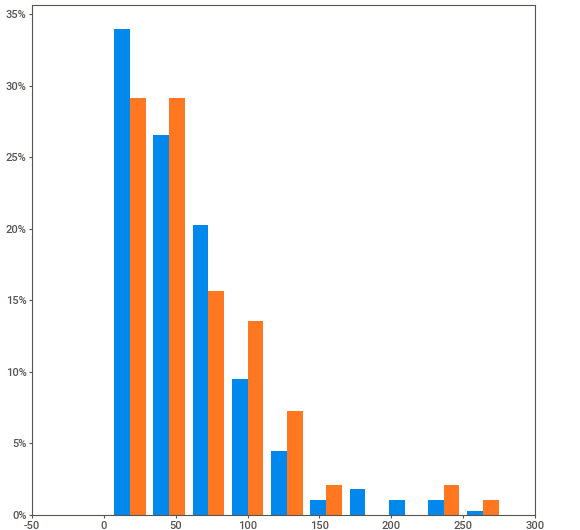
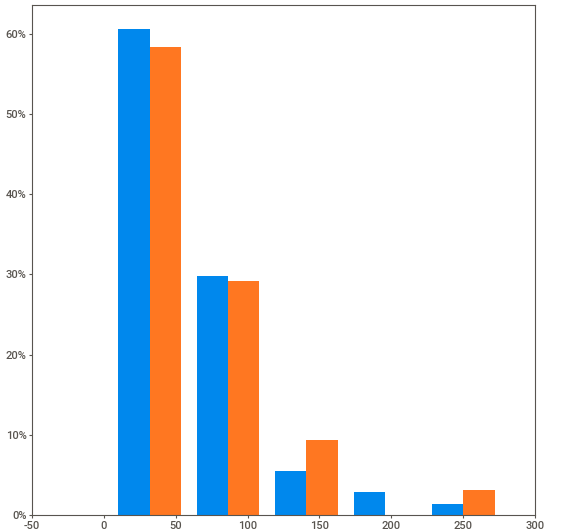
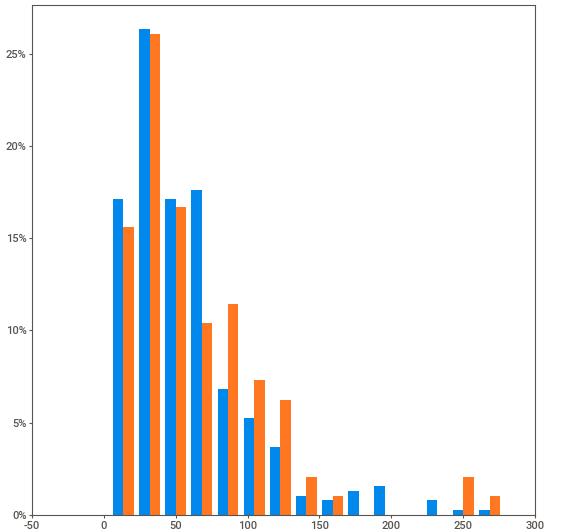
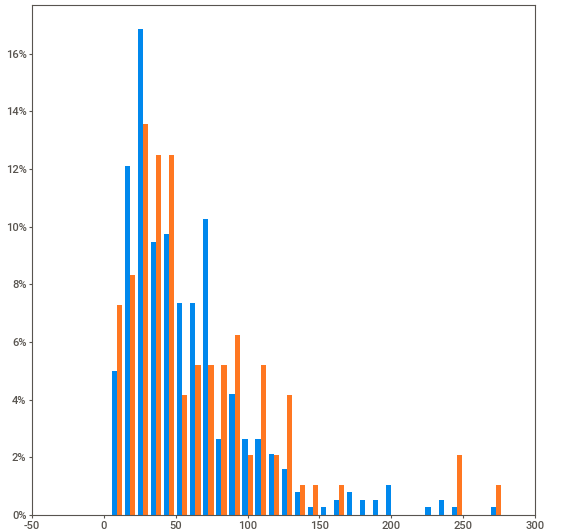
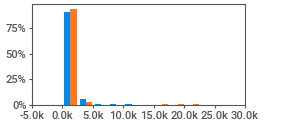
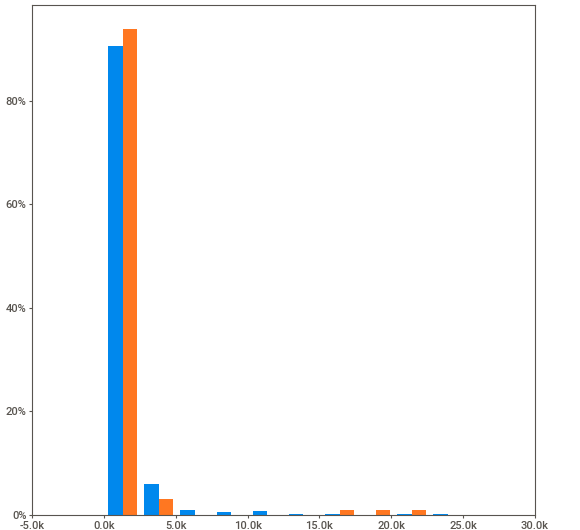
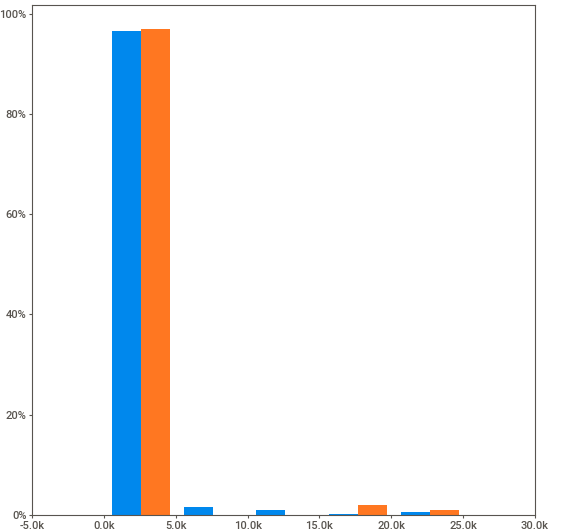
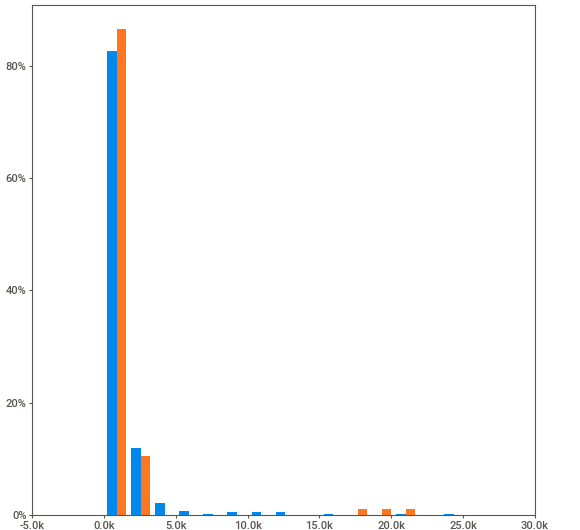
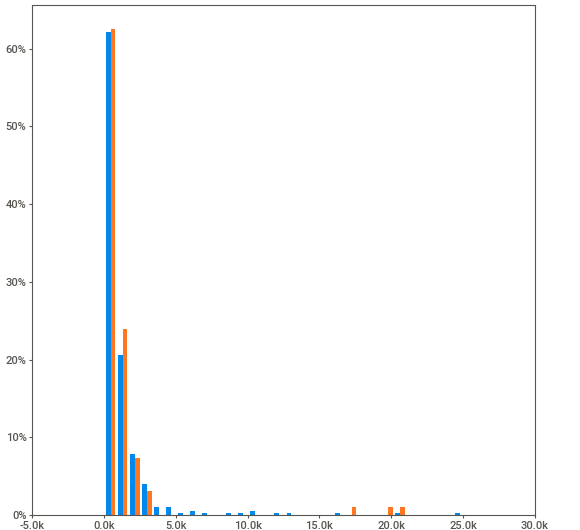
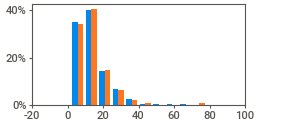
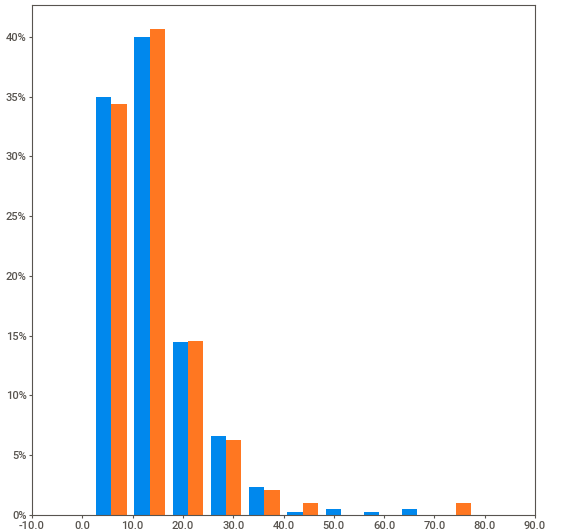
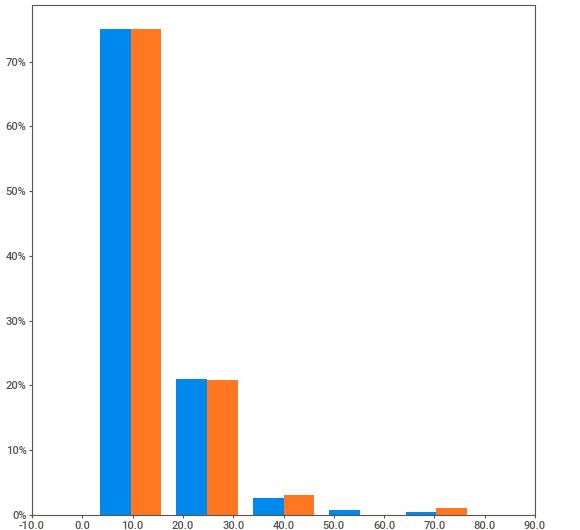
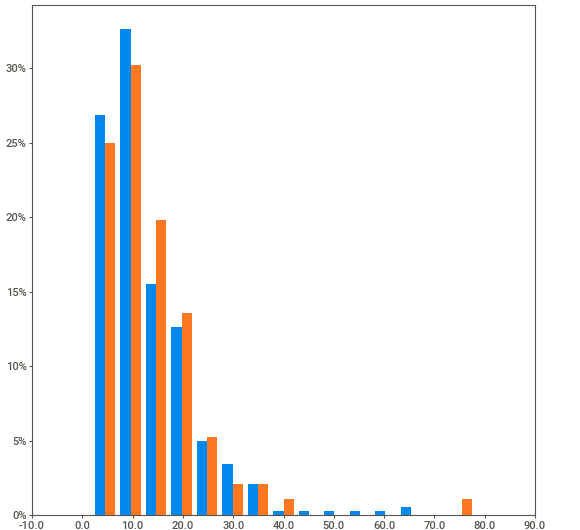
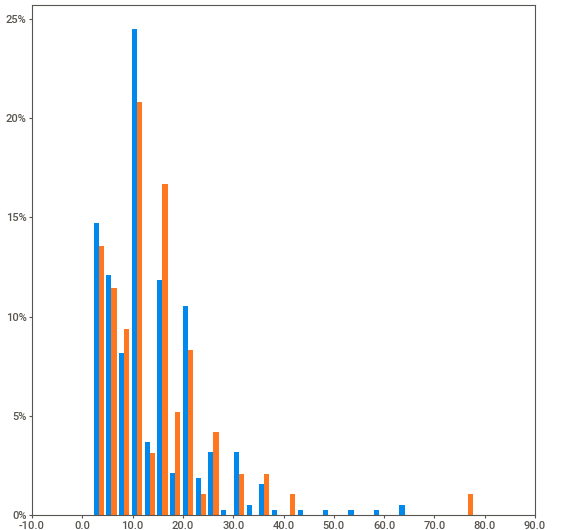
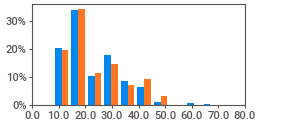
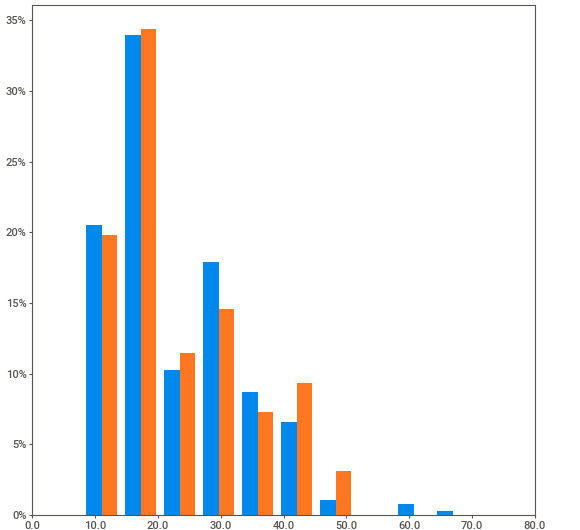
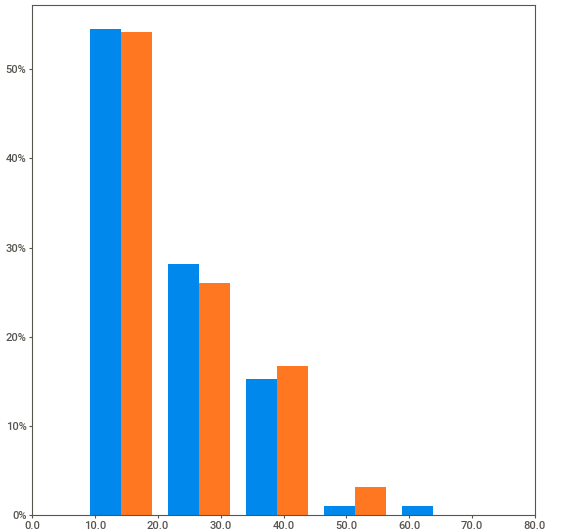
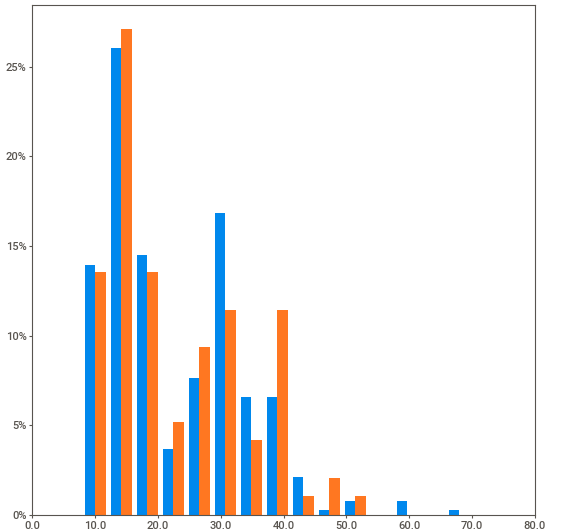
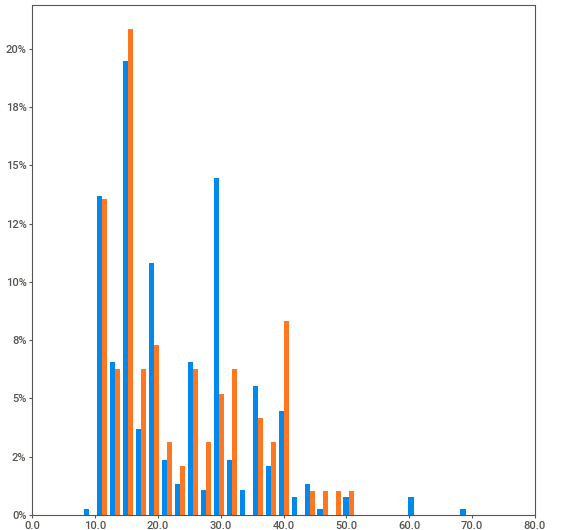
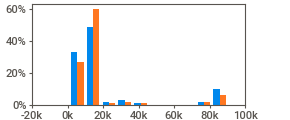
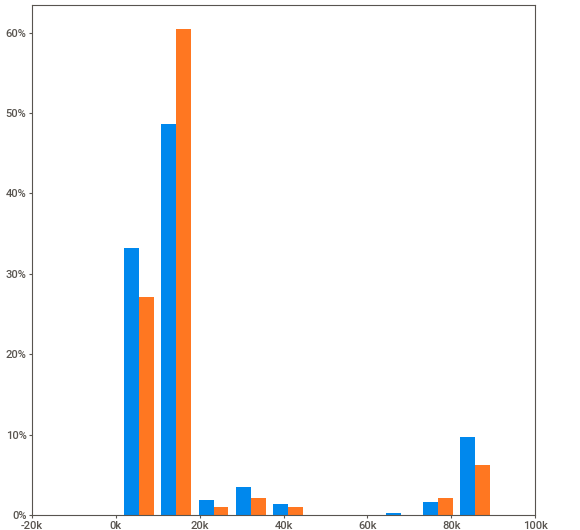
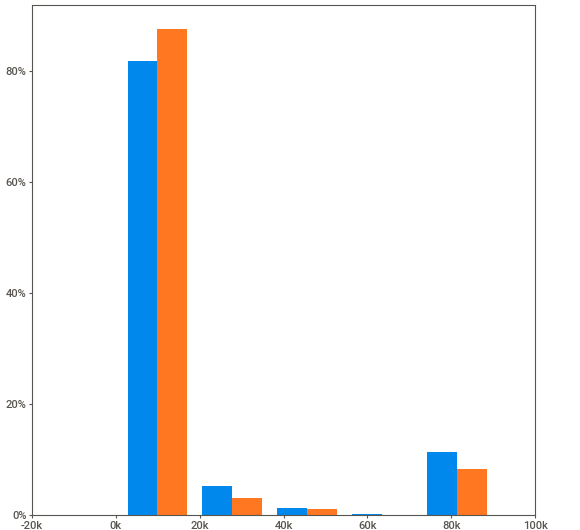
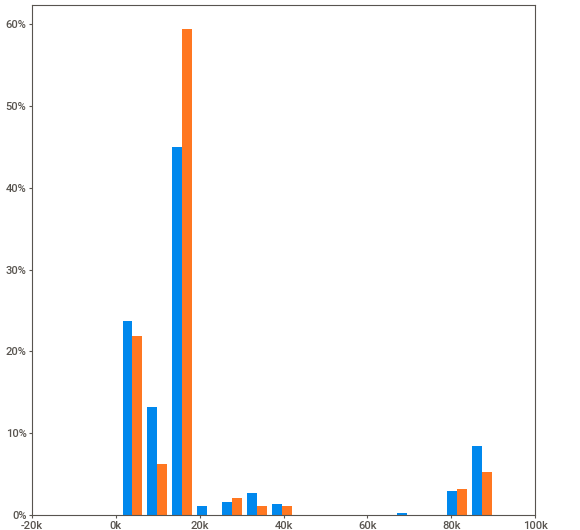
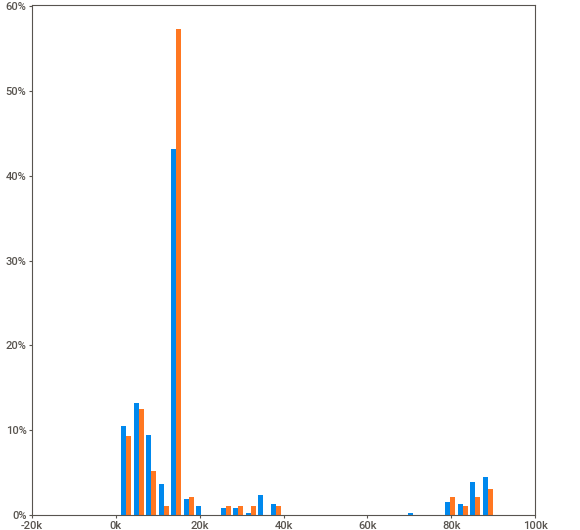
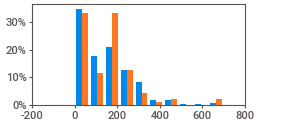
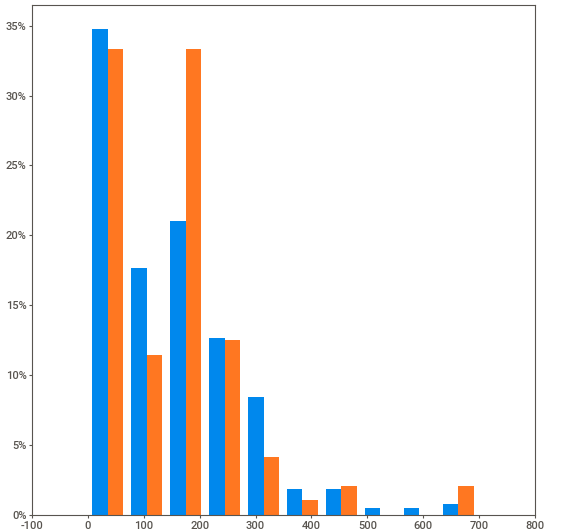
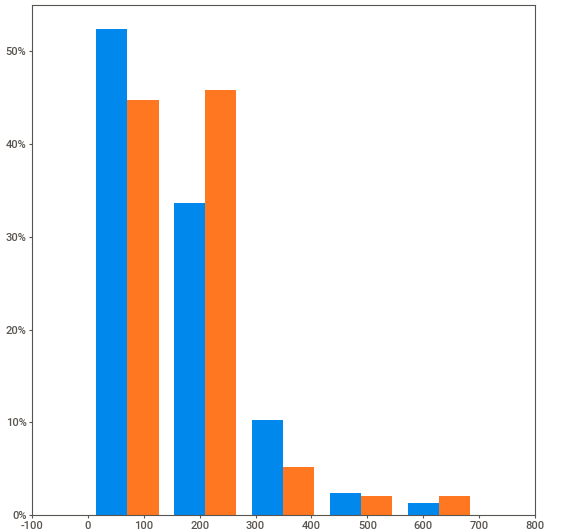
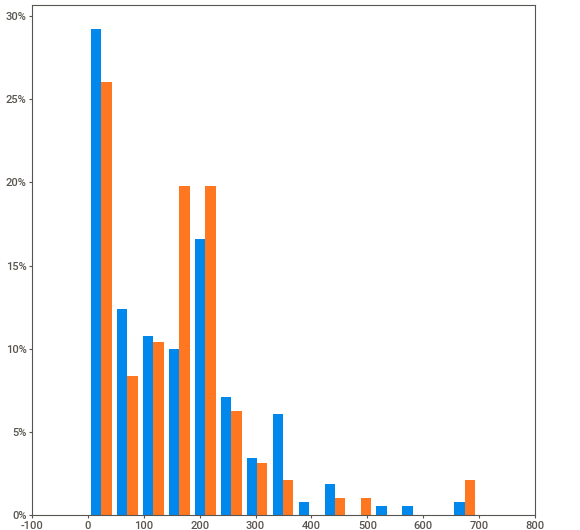
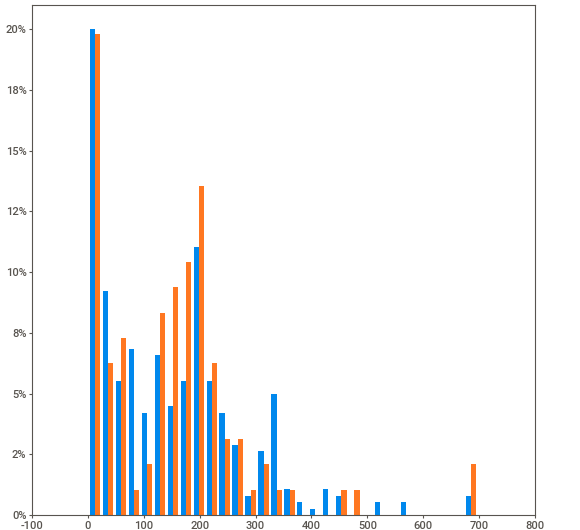
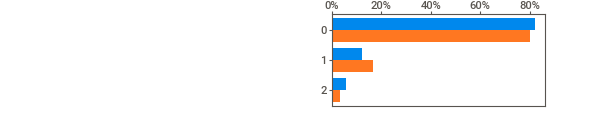
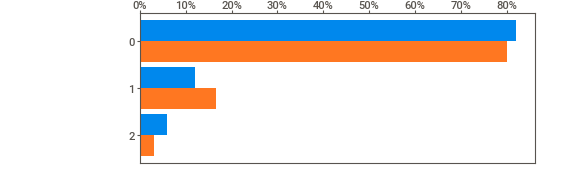
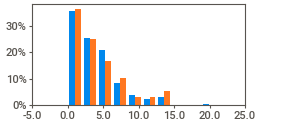
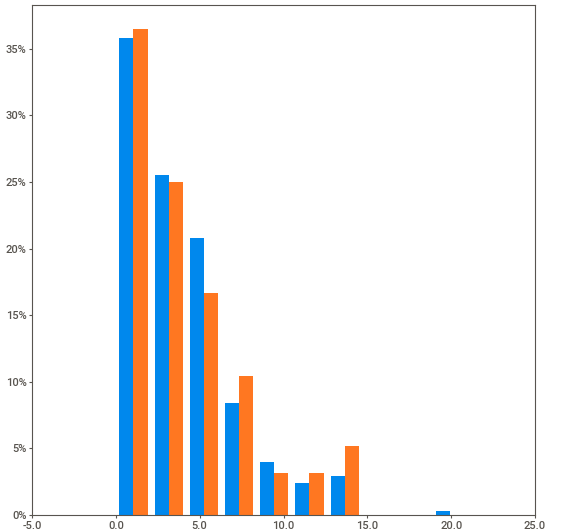
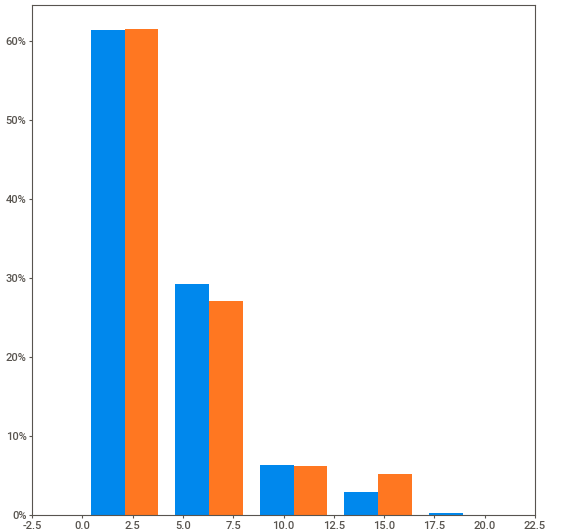
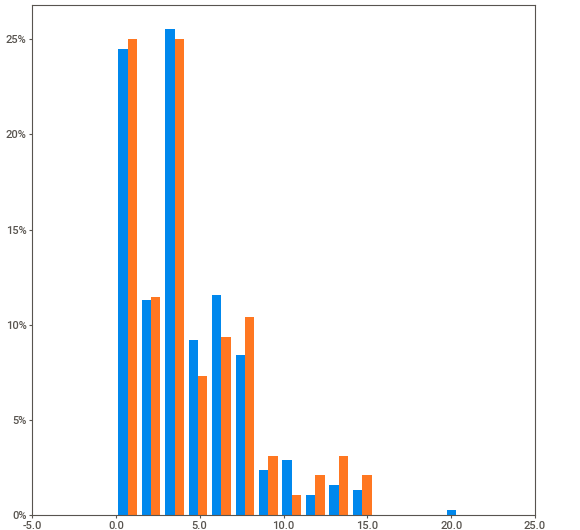
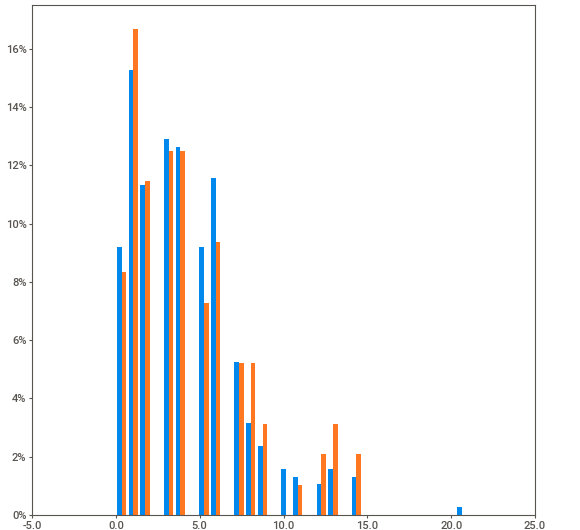
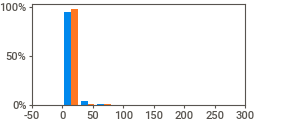
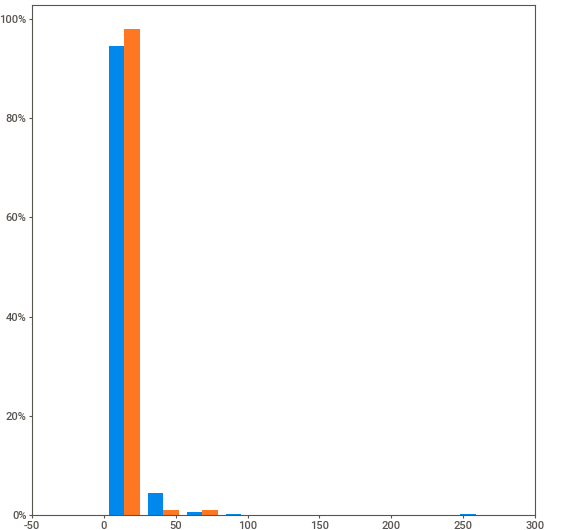
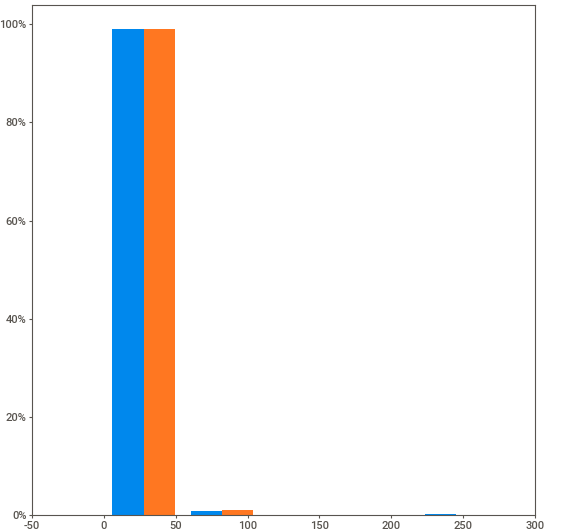
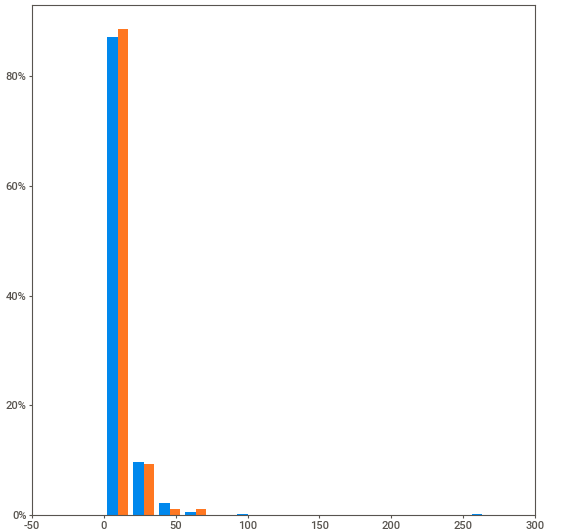
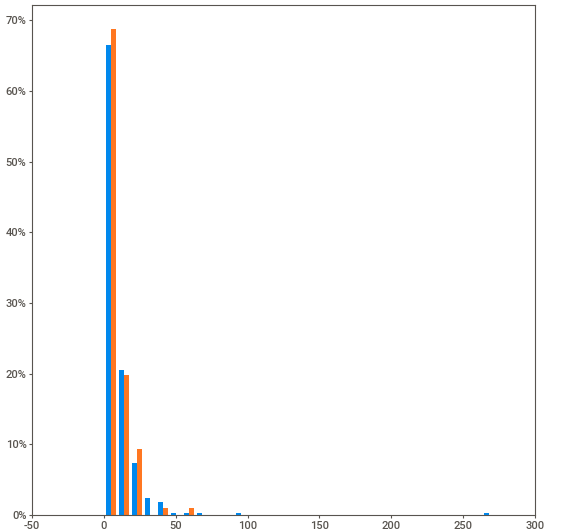
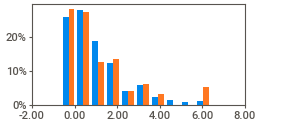
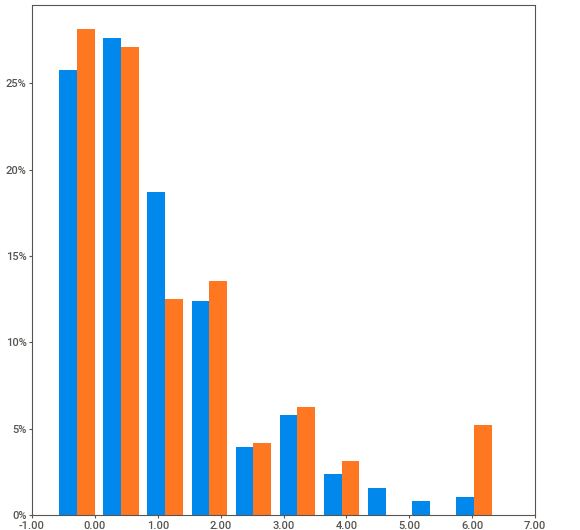
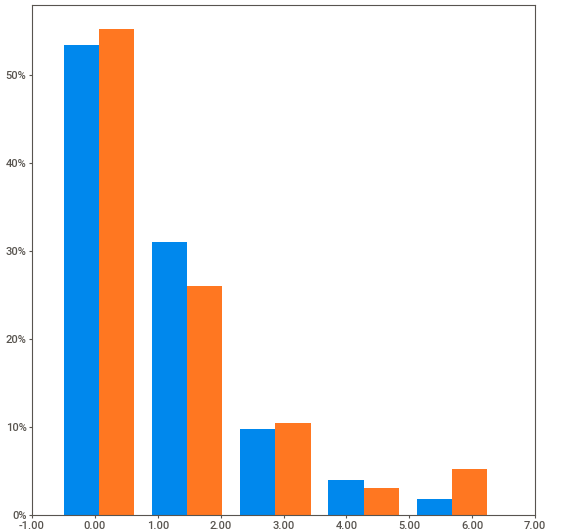
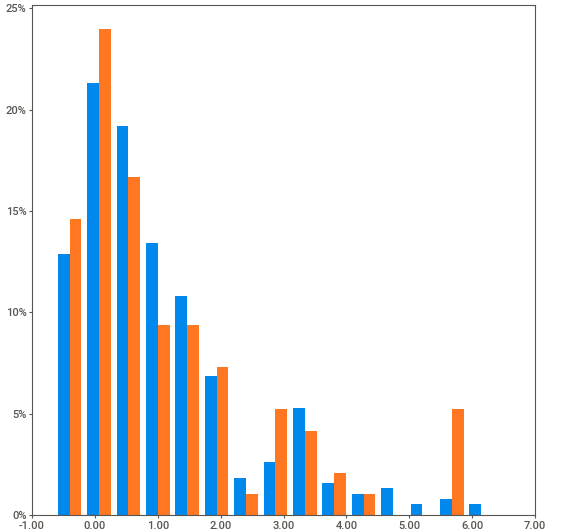
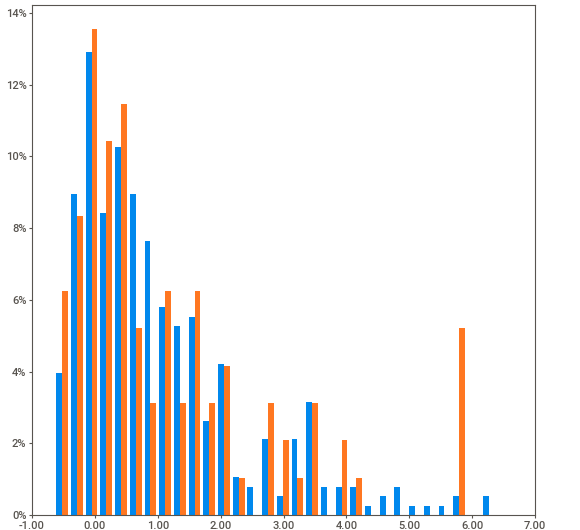
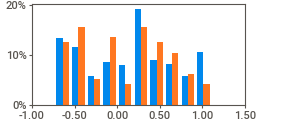
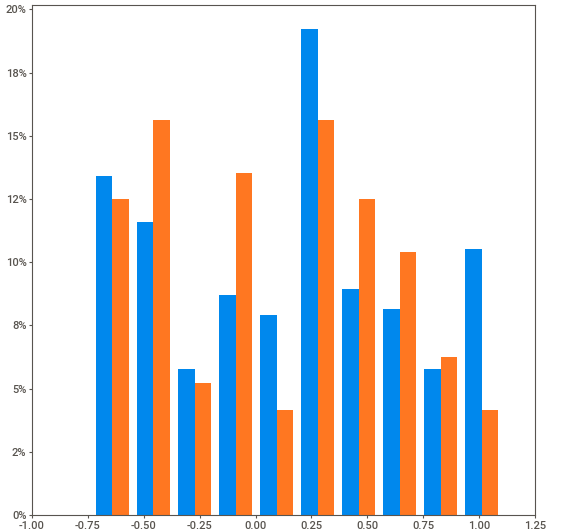
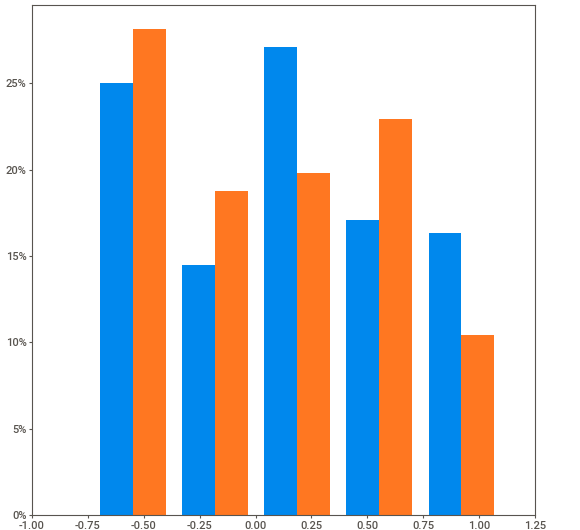
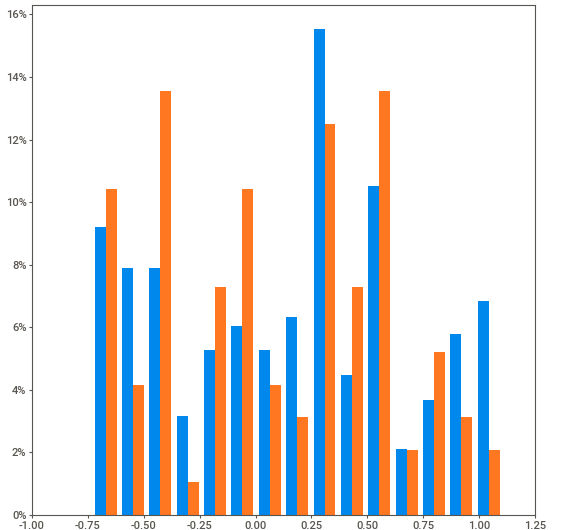
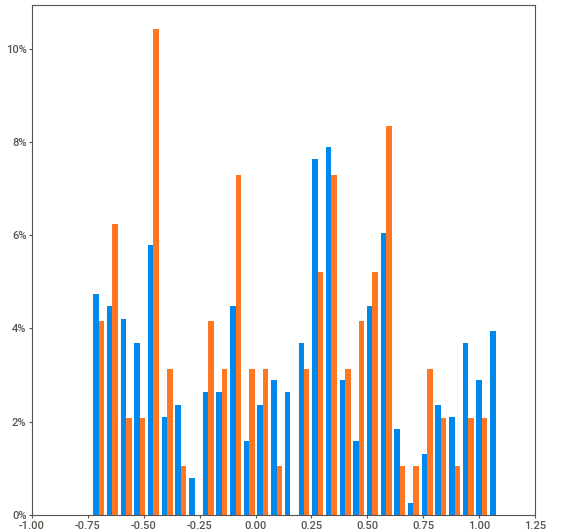
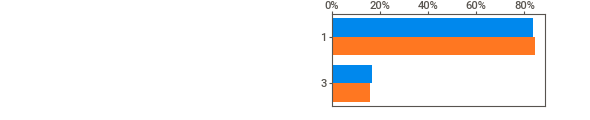
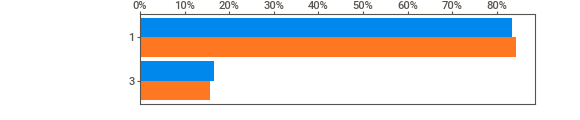
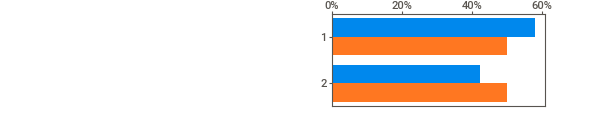
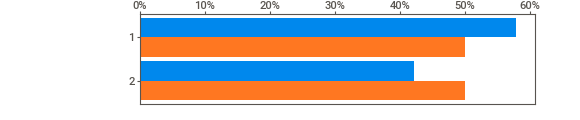
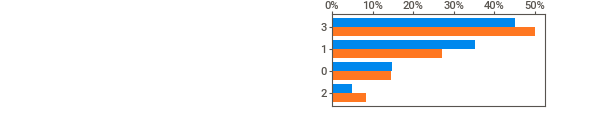
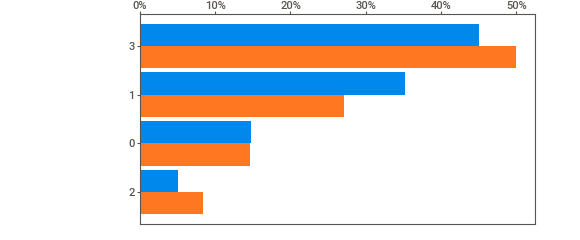
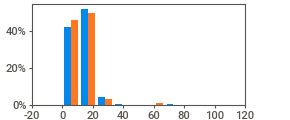
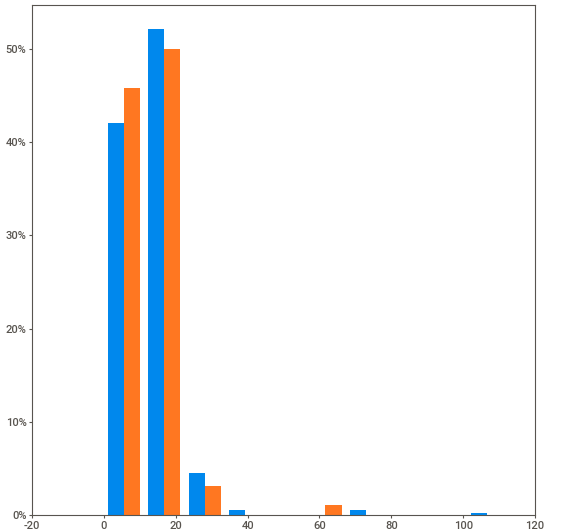
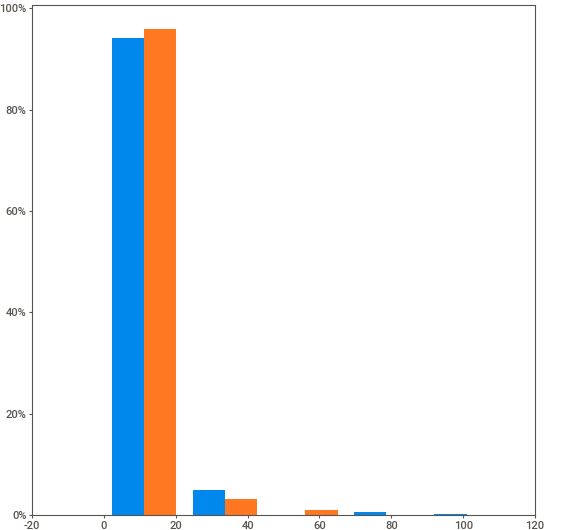
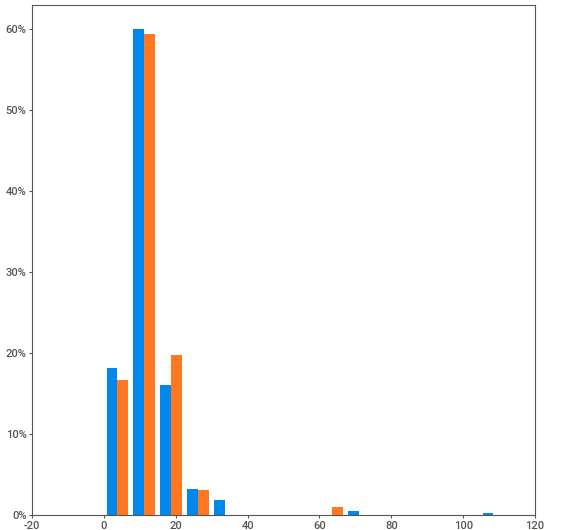
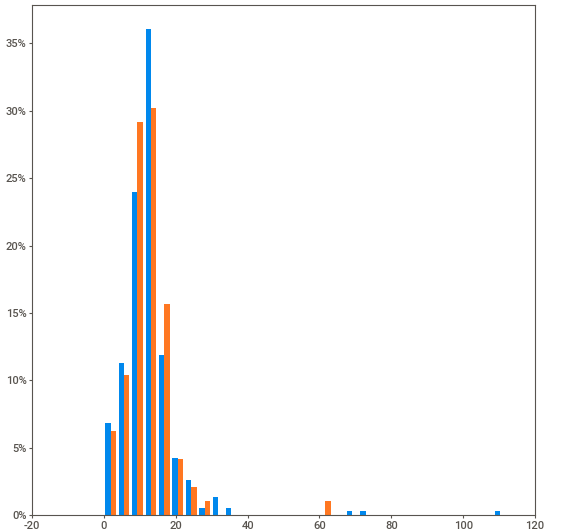
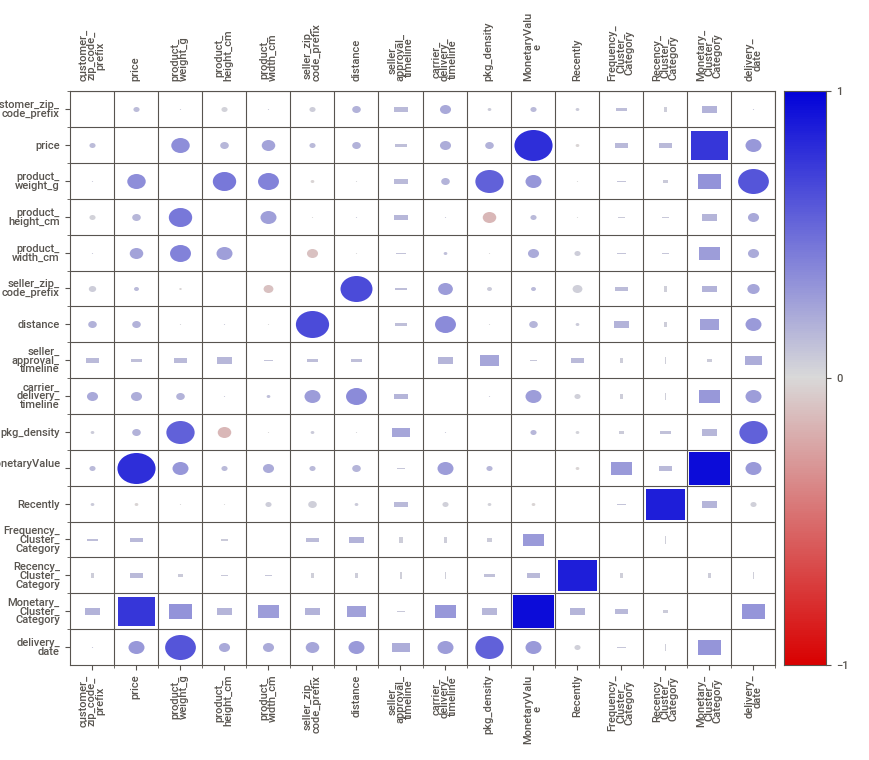
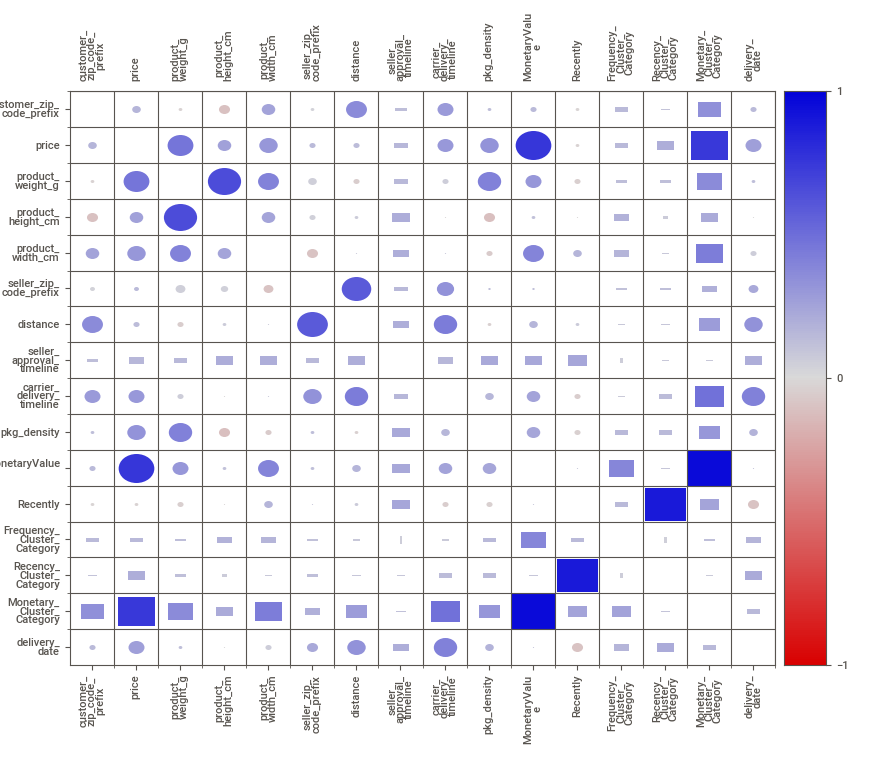

In [702]:
comparison_report.show_notebook() # Using the default values (w="100%", h=750, layout="vertical"), all can be overridden in an INI, see below)

##### **ML MODELS**

###### **MULLER LOOP**

In [708]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [709]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from time import time
from sklearn.metrics import r2_score

names = ["RandomForestRegressor",
         "DecisionTreeRegressor", "SVR", "LinearRegression", "Ridge",
         "BayesianRidge","MLPRegressor"]

classifiers = [
    RandomForestRegressor(max_depth=2, random_state=0),
    DecisionTreeRegressor(max_depth=2, random_state=0),
    SVR(epsilon=0.2),
    LinearRegression(),
    Ridge(alpha=1.0),
    BayesianRidge(),
    MLPRegressor(random_state=1, max_iter=5000)
    ]

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train_norm, y_train)
    ypred = clf.predict(X_test_norm)
    score = 100.0 * r2_score(y_test, ypred, multioutput='variance_weighted')
    print('Regression = %s, R2 Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Regression = RandomForestRegressor, R2 Score (test, accuracy) = 84.97, Training time = 0.20 seconds
Regression = DecisionTreeRegressor, R2 Score (test, accuracy) = 26.16, Training time = 0.00 seconds
Regression = SVR, R2 Score (test, accuracy) = 36.93, Training time = 0.02 seconds
Regression = LinearRegression, R2 Score (test, accuracy) = 94.39, Training time = 0.00 seconds
Regression = Ridge, R2 Score (test, accuracy) = 94.64, Training time = 0.00 seconds
Regression = BayesianRidge, R2 Score (test, accuracy) = 94.39, Training time = 0.00 seconds
Regression = MLPRegressor, R2 Score (test, accuracy) = 92.03, Training time = 3.52 seconds
--------------------------------------------------------------------------------
Best --> Regression = Ridge, Score (test, accuracy) = 94.64


##### **INTERACTIVE DASHBOARDS**

In [710]:
#RandomForestRegressor
model1 = RandomForestRegressor(max_depth=2, random_state=0)
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [711]:
#DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [712]:
#SVR
model3 = SVR(epsilon=0.2)
model3.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [713]:
#Linear Regression
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**EXPLAINER DASHBOARD**

In [714]:
from explainerdashboard import RegressionExplainer,ExplainerDashboard
explainer1 = RegressionExplainer(model1, X_test,y_test)
ExplainerDashboard(explainer1).run(mode='inline')

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard

<IPython.core.display.Javascript object>

**EXPLAINERHUB**

In [ ]:
#Creating Dashbord
from explainerdashboard import RegressionExplainer,ExplainerDashboard,ExplainerHub
explainer1 = RegressionExplainer(model1, X_test,y_test)
explainer2 = RegressionExplainer(model2, X_test,y_test)
explainer3 = RegressionExplainer(model3, X_test,y_test)
explainer4 = RegressionExplainer(model4, X_test,y_test)

In [ ]:
db1 = ExplainerDashboard(explainer1)
db2 = ExplainerDashboard(explainer2)
db3 = ExplainerDashboard(explainer2)
db4 = ExplainerDashboard(explainer2)

In [ ]:
#run dashboard hub
#hub = ExplainerHub([db1, db2, db3, db4])
#hub.run()

### **CLASSIFICATION USECASE1 - DETERMINE THE PRODUCT CATEGORY**

*Classifiing product category type based on product dimensions,price,freight cost and multiple factors.*

In [717]:
import pandas as pd
test=pd.read_csv('/content/testing_regression.csv')

In [718]:
test.dtypes

seller_on_time                   float64
seller_order_approval_time       float64
review_score                     float64
reliabilty_score                 float64
customer_id                       object
customer_zip_code_prefix           int64
price                            float64
freight_value                    float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
seller_zip_code_prefix             int64
distance                         float64
actual_delivery_timeline           int64
seller_approval_timeline           int64
seller_processing_timeline         int64
seller_order_timeline              int64
carrier_delivery_timeline          int64
customer_satisfaction              int64
pkg_density                      float64
dtype: object

In [719]:
#created a simple map of product category
product_category_dictinary = {y:x for x,y in enumerate(test['product_category_name_english'].unique())}
test['product_category_name_english'] = test['product_category_name_english'].map(product_category_dictinary)

In [720]:
#total no of product categories
len(product_category_dictinary)

69

In [721]:
#find count of orders based on product category
test.groupby('product_category_name_english')['customer_zip_code_prefix'].count().sort_values(ascending=False)

product_category_name_english
3     7942
20    5765
4     5726
18    4765
22    4044
      ... 
58      14
63      13
46      11
61       7
65       4
Name: customer_zip_code_prefix, Length: 69, dtype: int64

In [722]:
#filtering and selecting only 4 product categories due to huge volumne of data.
top_3 = test[test['product_category_name_english'].isin([3,20,4])]

In [723]:
top_3

seller_on_time  seller_order_approval_time  review_score  \
191               1.0                         1.0           0.8   
192               1.0                         1.0           0.8   
193               1.0                         1.0           0.8   
194               1.0                         1.0           0.8   
195               1.0                         1.0           0.8   
...               ...                         ...           ...   
67643             1.0                         1.0           0.9   
67644             1.0                         1.0           0.9   
67645             1.0                         1.0           0.9   
67646             1.0                         1.0           0.9   
67647             1.0                         1.0           0.9   

       reliabilty_score                       customer_id  \
191                0.94  46e062b89efcb2d995e223cdf27783d5   
192                0.94  6815bf204e3baca2b1b0fa5d285d3c99   
193                0.94  045113dd9def11da63eed78d7bd66571   
194                0.94  2a888c1244dc79321e00770c3b56268e   
195                0.94  5039a0deaaeb41b8cd4135964d681bb6   
...                 ...                               ...   
67643              0.97  f7c4276a2a1197f38b8a1c037aa11711   
67644              0.97  d12dabdce587c93902dacb61c8c6f6b4   
67645              0.97  10b3c5bcb5211413451e40aa64ffc772   
67646              0.97  a59d04c9a76861580b6b7c3491570a5b   
67647              0.97  bbce69db62fbcc00884caa50b906a809   

       customer_zip_code_prefix   price  freight_value  product_weight_g  \
191                       27525  105.00          23.31            1650.0   
192                       96015   82.99          23.16            1450.0   
193                       13212  170.00          18.10            2800.0   
194                       13212  117.99          16.46            2700.0   
195                       24431   69.90          17.74             950.0   
...                         ...     ...            ...               ...   
67643                     41810   54.90          23.10             500.0   
67644                      4546   59.90          15.52             500.0   
67645                      2871   59.90          15.52             500.0   
67646                     20051   59.90          18.57             500.0   
67647                      4650   59.90          15.52             500.0   

       product_length_cm  ...  product_category_name_english  \
191                 36.0  ...                              3   
192                 34.0  ...                              3   
193                 44.0  ...                              3   
194                 45.0  ...                              3   
195                 29.0  ...                              3   
...                  ...  ...                            ...   
67643               25.0  ...                             20   
67644               25.0  ...                             20   
67645               25.0  ...                             20   
67646               25.0  ...                             20   
67647               25.0  ...                             20   

       seller_zip_code_prefix  distance  actual_delivery_timeline  \
191                     14940    280.61                        29   
192                     14940    724.69                        34   
193                     14940    158.01                         7   
194                     14940    158.01                        15   
195                     14940    374.37                        15   
...                       ...       ...                       ...   
67643                   81260   1118.85                        15   
67644                   81260    212.29                         5   
67645                   81260    218.27                         9   
67646                   81260    427.36                         7   
67647                   8126

In [724]:
#merged_top3 = pd.merge(top_3,GOlder_Cluster)

In [725]:
#merged_top3

#### **DIFFERENT FEATURES IN THE DATASET**

In [726]:
X=top_3.drop(columns=['product_category_name_english','customer_id'])
y=top_3['product_category_name_english']

In [727]:
#features in the dataset
feature_name=X.columns
feature_name

Index(['seller_on_time', 'seller_order_approval_time', 'review_score',
       'reliabilty_score', 'customer_zip_code_prefix', 'price',
       'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'distance', 'actual_delivery_timeline', 'seller_approval_timeline',
       'seller_processing_timeline', 'seller_order_timeline',
       'carrier_delivery_timeline', 'customer_satisfaction', 'pkg_density'],
      dtype='object')

#### **DIFFERENT FEATURE SELECTION METHODS**

#####**Pearson Correlation**

In [728]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    cor_list = X.corrwith(y)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [729]:
import numpy as np
num_feats=10
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [730]:
for x in cor_feature:
  print(x)

freight_value
distance
customer_zip_code_prefix
seller_processing_timeline
product_length_cm
reliabilty_score
review_score
product_height_cm
seller_zip_code_prefix
product_width_cm


#####**CHI-SQUARED**

In [731]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [732]:
for x in cor_feature:
  print(x)

freight_value
distance
customer_zip_code_prefix
seller_processing_timeline
product_length_cm
reliabilty_score
review_score
product_height_cm
seller_zip_code_prefix
product_width_cm


#####**Recursive Feature Elimination**

In [733]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 20 features.
10 selected features


In [734]:
rfe_feature

['seller_on_time',
 'review_score',
 'price',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'actual_delivery_timeline',
 'carrier_delivery_timeline',
 'pkg_density']

#####**Lasso: SelectFromModel**

In [735]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

6 selected features


In [736]:
embeded_lr_feature

['review_score',
 'price',
 'product_weight_g',
 'product_height_cm',
 'product_width_cm',
 'pkg_density']

#####**Tree-based: SelectFromModel**

In [737]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [738]:
embeded_rf_feature

['price',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'pkg_density']

##### **COMBINE ALL METHODS AND CHOOSE TOP N FEATURES**

In [739]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [740]:
feature_selection_df

Feature  Pearson  Chi-2    RFE  Logistics  \
1             product_width_cm     True   True   True       True   
2            product_height_cm     True   True   True       True   
3                 review_score     True   True   True       True   
4             product_weight_g    False   True   True       True   
5            product_length_cm     True   True   True      False   
6                        price    False   True   True       True   
7       seller_zip_code_prefix     True   True  False      False   
8                  pkg_density    False  False   True       True   
9                     distance     True   True  False      False   
10    customer_zip_code_prefix     True   True  False      False   
11  seller_processing_timeline     True  False  False      False   
12              seller_on_time    False  False   True      False   
13    seller_approval_timeline    False   True  False      False   
14            reliabilty_score     True  False  False      False   
15               freight_value     True  False  False      False   
16   carrier_delivery_timeline    False  False   True      False   
17    actual_delivery_timeline    False  False   True      False   
18       seller_order_timeline    False  False  False      False   
19  seller_order_approval_time    False  False  False      False   
20       customer_satisfaction    False  False  False      False   

    Random Forest  Total  
1            True      5  
2            True      5  
3           False      4  
4            True      4  
5            True      4  
6            True      4  
7            True      3  
8            True      3  
9           False      2  
10          False      2  
11          False      1  
12          False      1  
13          False      1  
14          False      1  
15          False      1  
16          False      1  
17          False      1  
18          False      0  
19          False      0  
20          False      0

In [741]:
#select top 10 features
final_features = feature_selection_df[:9]['Feature']

In [742]:
final_features = final_features.values

In [743]:
final_features

array(['product_width_cm', 'product_height_cm', 'review_score',
       'product_weight_g', 'product_length_cm', 'price',
       'seller_zip_code_prefix', 'pkg_density', 'distance'], dtype=object)

In [744]:
#columns to drop
drop_columns=[]

for col in X.columns:
  if col in final_features:
    pass
  else:
    drop_columns.append(col)

In [745]:
drop_columns

['seller_on_time',
 'seller_order_approval_time',
 'reliabilty_score',
 'customer_zip_code_prefix',
 'freight_value',
 'actual_delivery_timeline',
 'seller_approval_timeline',
 'seller_processing_timeline',
 'seller_order_timeline',
 'carrier_delivery_timeline',
 'customer_satisfaction']

In [746]:
#drop unnecessary features 
Final_X = X.drop(columns=drop_columns)

In [747]:
#dataframe with only the required features
Final_X

review_score   price  product_weight_g  product_length_cm  \
191             0.8  105.00            1650.0               36.0   
192             0.8   82.99            1450.0               34.0   
193             0.8  170.00            2800.0               44.0   
194             0.8  117.99            2700.0               45.0   
195             0.8   69.90             950.0               29.0   
...             ...     ...               ...                ...   
67643           0.9   54.90             500.0               25.0   
67644           0.9   59.90             500.0               25.0   
67645           0.9   59.90             500.0               25.0   
67646           0.9   59.90             500.0               25.0   
67647           0.9   59.90             500.0               25.0   

       product_height_cm  product_width_cm  seller_zip_code_prefix  distance  \
191                 14.0              42.0                   14940    280.61   
192                 12.0              40.0                   14940    724.69   
193                 10.0              34.0                   14940    158.01   
194                 13.0              35.0                   14940    158.01   
195                 10.0              25.0                   14940    374.37   
...                  ...               ...                     ...       ...   
67643               20.0              20.0                   81260   1118.85   
67644               20.0              20.0                   81260    212.29   
67645               20.0              20.0                   81260    218.27   
67646               20.0              20.0                   81260    427.36   
67647               20.0              20.0                   81260    210.04   

       pkg_density  
191           4.87  
192           5.55  
193          11.68  
194           8.23  
195           8.18  
...            ...  
67643         3.12  
67644         3.12  
67645         3.12  
67646         3.12  
67647         3.12  

[19433 rows x 9 columns]

#### **PERFROM CLASSIFICATION**

In [748]:
from pycaret.classification import *

In [749]:
Classification_Df = Final_X

In [750]:
Classification_Df['product_category_name_english']=y

In [751]:
#setup pycaret
exp_name = setup(data = Classification_Df,  target = 'product_category_name_english',normalize=True,remove_outliers=True,silent=True)

Description                          Value
0                               session_id                           2940
1                                   Target  product_category_name_english
2                              Target Type                     Multiclass
3                            Label Encoded                           None
4                            Original Data                    (19433, 10)
5                           Missing Values                          False
6                         Numeric Features                              9
7                     Categorical Features                              0
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                     (12922, 9)
12                    Transformed Test Set                      (5830, 9)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           44d7
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                           True
30                        Normalize Method                         zscore
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                          False
34                              PCA Method                           None
35                          PCA Components                           None
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                           True
41                      Outliers Threshold                           0.05
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

##### **EDA - AUTOVIZ**

In [752]:
# perfrom eda
%matplotlib inline
eda(display_format = 'bokeh',verbose=1)

Shape of your Data Set loaded: (19433, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification VISUALIZATION Started #####################
Data Set Shape: 19433 rows, 10 cols
Data Set columns info:
* review_score: 0 nulls, 9 unique vals, most common: {0.8: 11655, 0.9: 5523}
* price: 0 nulls, 1743 unique vals, most common: {89.9: 573,

Row
    [0] WidgetBox
        [0] Select(name='y', options=['price', 'product_weight_...], value='price')
    [1] ParamFunction(function)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['price', 'product_weight_...], value='price')
        [1] Select(name='Y-Axis', options=['price', 'product_weight_...], value='product_weight_g')
        [2] Select(name='Color', options=['None', 'product_category...], value='None')
    [1] ParamFunction(function)

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['seller_zip_code_prefix']...], value='seller_zip_code_prefix', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['price', 'distance', ...], value='price', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Layout)

No date vars could be found in data set


HoloViews(Overlay)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['seller_zip_code_prefix',...], value='seller_zip_code_prefix')
        [1] Select(name='Y-Axis', options=['price', 'product_weight_...], value='product_weight_g')
    [1] ParamFunction(function)

Time to run AutoViz (in seconds) = 5


##### **COMPARE DIFFERENT MODEL ACCURACY USING PYCARET AUTOML**

In [753]:
Classification_Df['product_category_name_english']=Classification_Df['product_category_name_english'].map({3:0,20:1,4:2})

In [754]:
classificaiton_models = setup(data = Classification_Df,  target = 'product_category_name_english',normalize=True,silent=True,remove_outliers=True)

Description                          Value
0                               session_id                           3399
1                                   Target  product_category_name_english
2                              Target Type                     Multiclass
3                            Label Encoded                           None
4                            Original Data                    (19433, 10)
5                           Missing Values                          False
6                         Numeric Features                              9
7                     Categorical Features                              0
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                     (12922, 9)
12                    Transformed Test Set                      (5830, 9)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           ad28
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                           True
30                        Normalize Method                         zscore
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                          False
34                              PCA Method                           None
35                          PCA Components                           None
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                           True
41                      Outliers Threshold                           0.05
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

In [755]:
best_classification_model = compare_models(fold=3)

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9605  0.9958  0.9573  0.9607   
rf               Random Forest Classifier    0.9598  0.9968  0.9564  0.9599   
et                 Extra Trees Classifier    0.9590  0.9972  0.9557  0.9591   
dt               Decision Tree Classifier    0.9378  0.9546  0.9322  0.9378   
gbc          Gradient Boosting Classifier    0.9061  0.9823  0.8982  0.9067   
knn                K Neighbors Classifier    0.8797  0.9626  0.8687  0.8786   
ada                  Ada Boost Classifier    0.7835  0.8938  0.7633  0.7828   
lr                    Logistic Regression    0.7256  0.8803  0.7022  0.7248   
ridge                    Ridge Classifier    0.7183  0.0000  0.6925  0.7164   
lda          Linear Discriminant Analysis    0.7171  0.8778  0.6989  0.7272   
svm                   SVM - Linear Kernel    0.7121  0.0000  0.6885  0.7142   
qda       Quadratic Discriminant Analysis    0.7059  0.8832  0.6856  0.7186   
nb                            Naive Bayes    0.6518  0.8499  0.6347  0.6713   
dummy                    Dummy Classifier    0.4133  0.5000  0.3333  0.1708   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9606  0.9399  0.9399    0.7000  
rf        0.9598  0.9388  0.9388    1.5233  
et        0.9590  0.9376  0.9376    1.0033  
dt        0.9378  0.9053  0.9053    0.0767  
gbc       0.9063  0.8572  0.8572    4.1967  
knn       0.8789  0.8165  0.8167    0.5067  
ada       0.7819  0.6703  0.6714    0.5033  
lr        0.7221  0.5815  0.5841    0.1433  
ridge     0.7110  0.5693  0.5743    0.0367  
lda       0.7181  0.5713  0.5749    0.0500  
svm       0.7070  0.5607  0.5658    0.1333  
qda       0.6995  0.5535  0.5644    0.0467  
nb        0.6426  0.4728  0.4882    0.0400  
dummy     0.2418  0.0000  0.0000    0.0367

##### **TRAIN TEST VALIDATION SPLIT**

In [756]:
sample_Df=Classification_Df.sample(n=2000)

In [757]:
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(sample_Df, target = 'product_category_name_english', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

#####**VISUALIZE TRAIN_TEST_SPLIT USING SWEETVIZ**

In [758]:
# importing sweetviz
import sweetviz as sv

training_date = X_train
training_date['product_category_name_english']= y_train

testing_data = X_test
testing_data['product_category_name_english']= y_test

#compare train and test
comparison_report = sv.compare([training_date,'Train'], [testing_data,'Test'])

                                             |          | [  0%]   00:00 -> (? left)


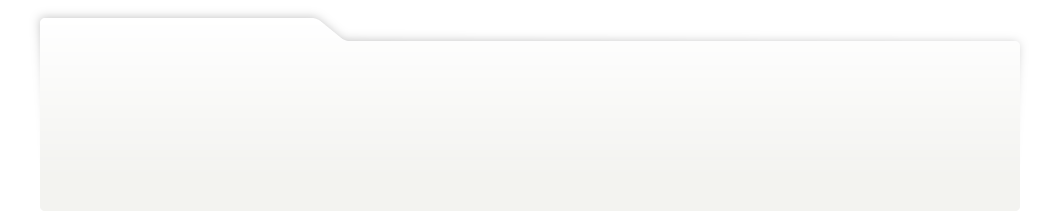
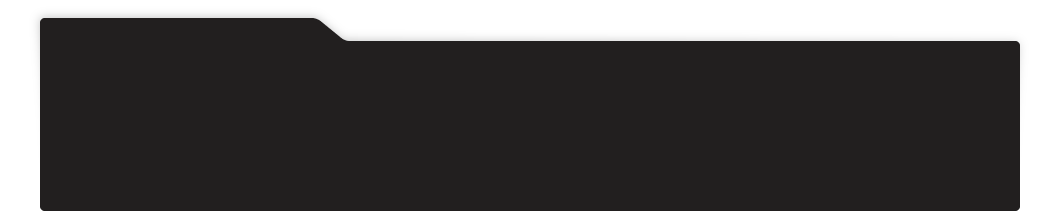
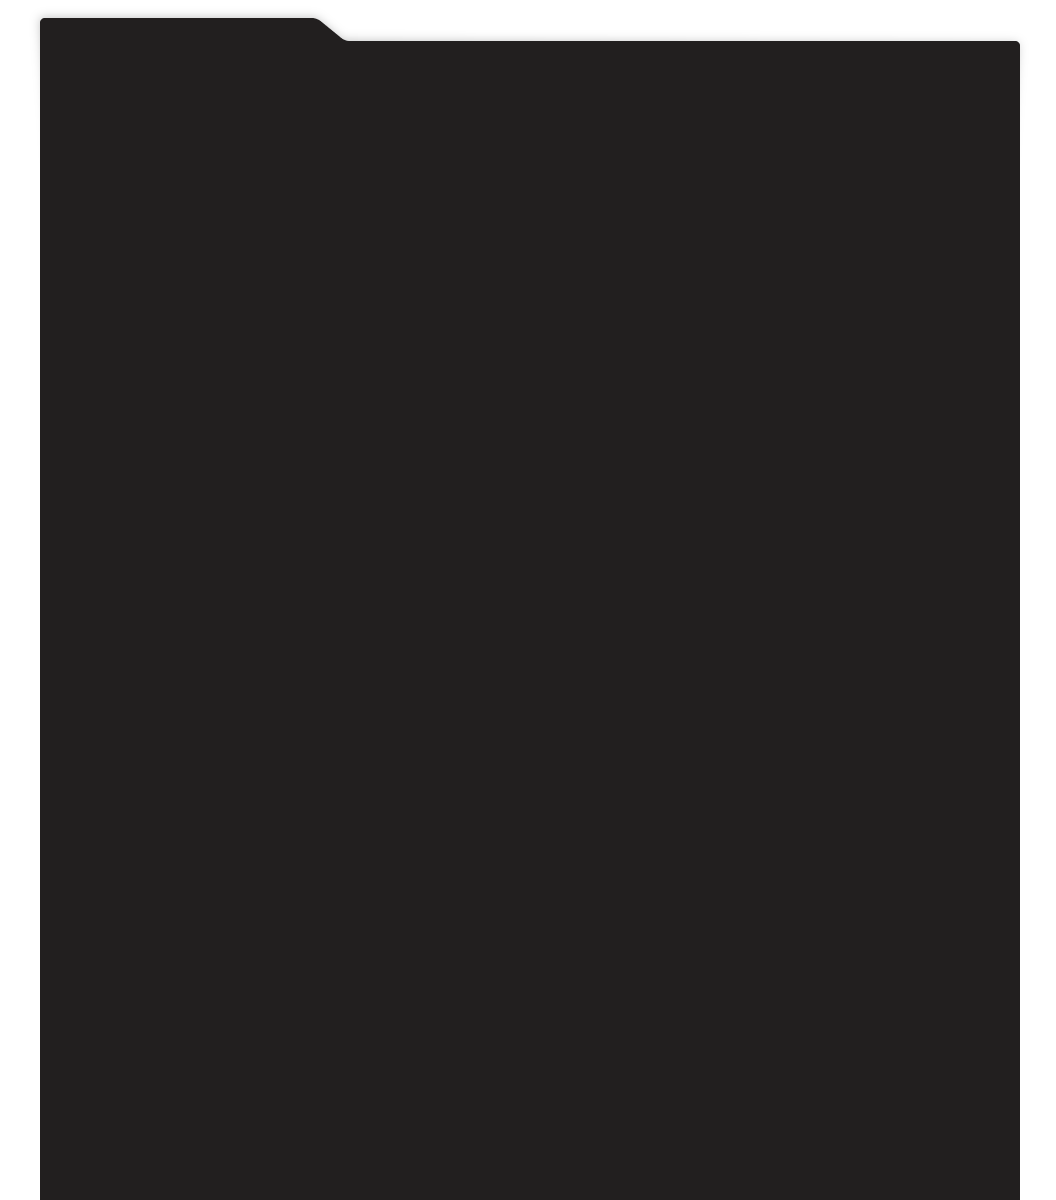
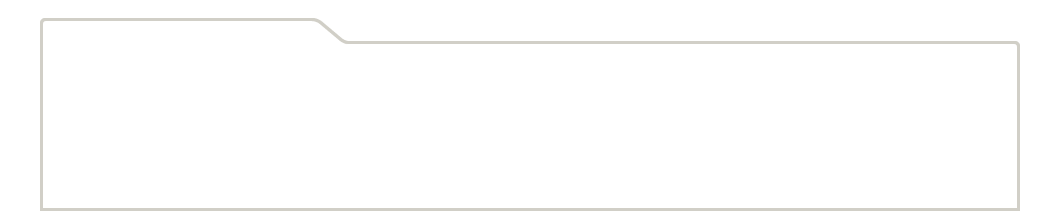
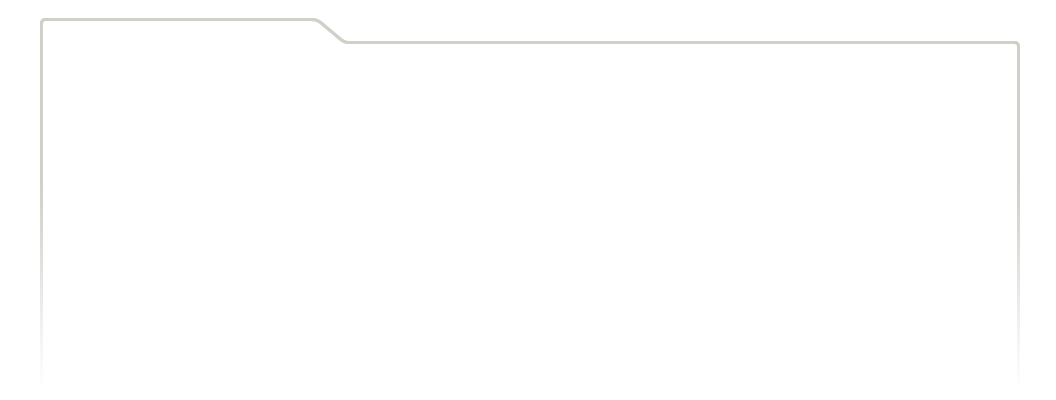
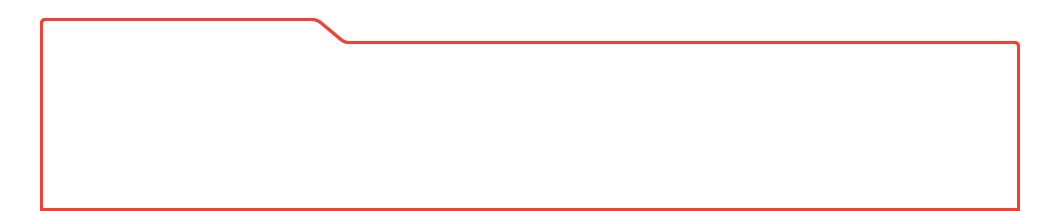
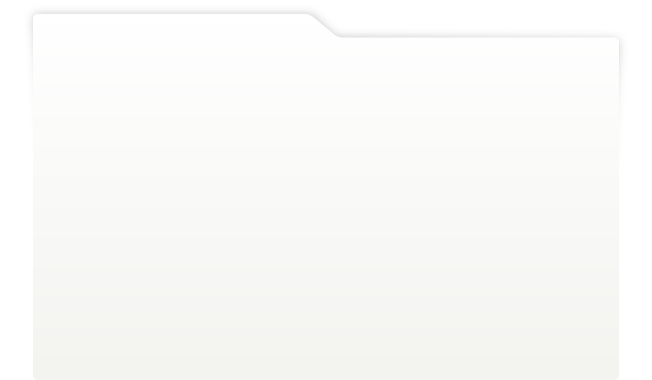
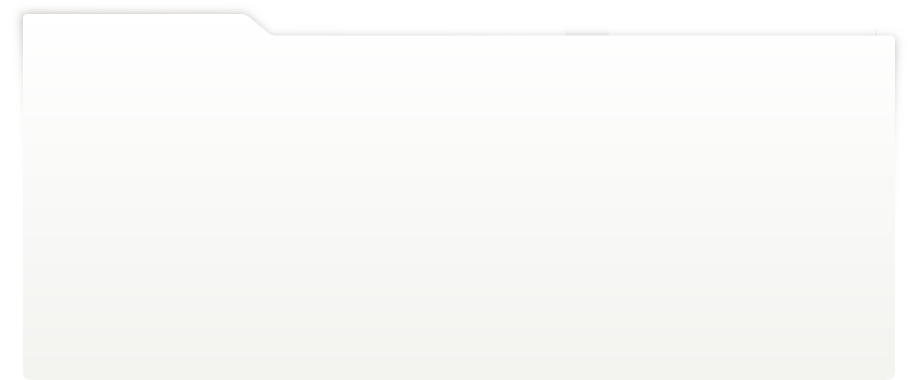
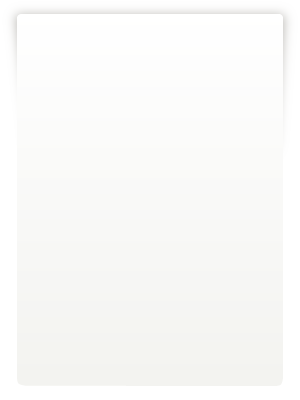
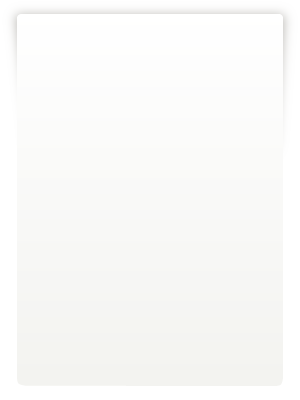
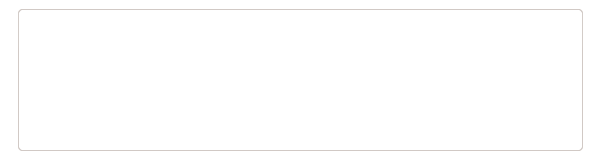
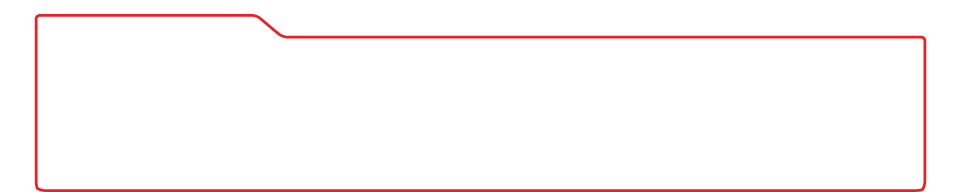
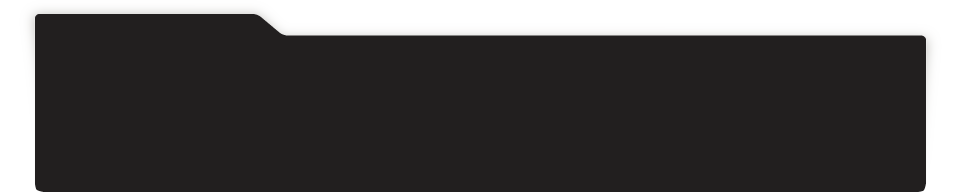
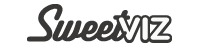
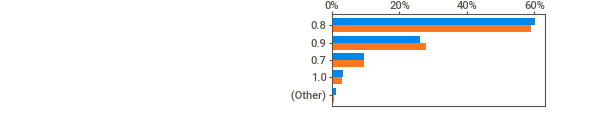
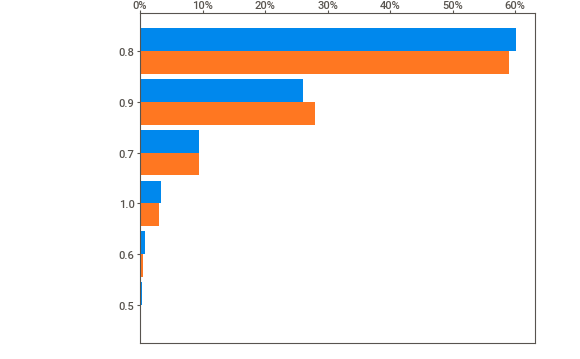
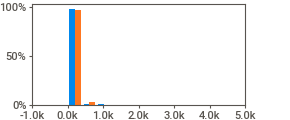
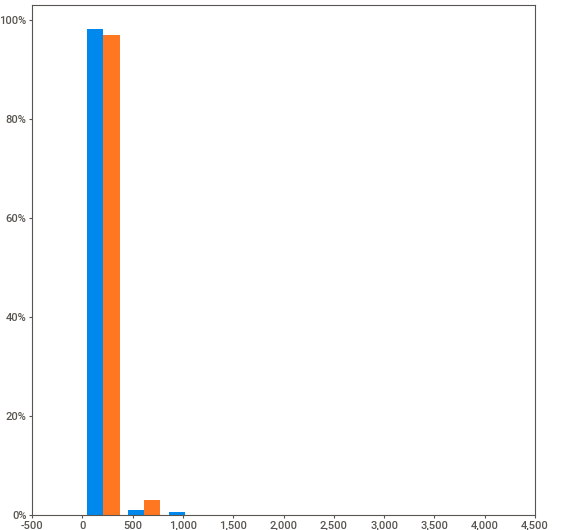
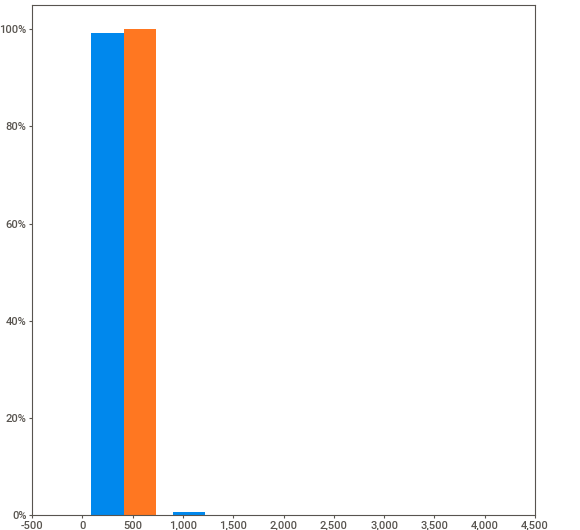
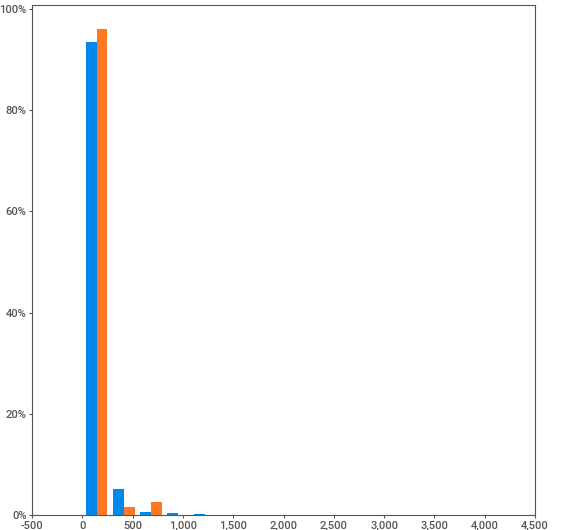
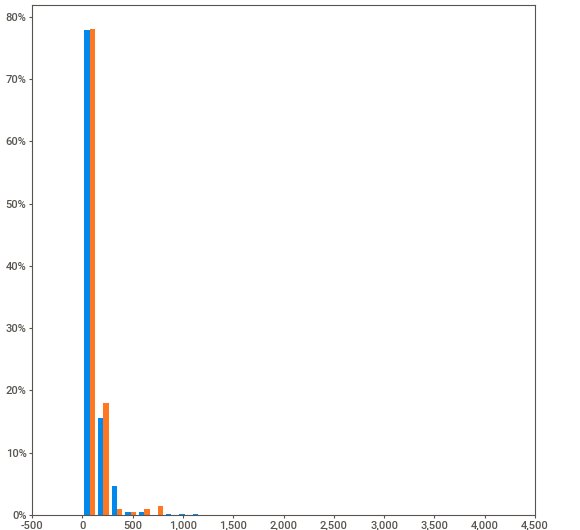
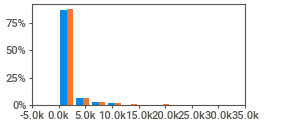
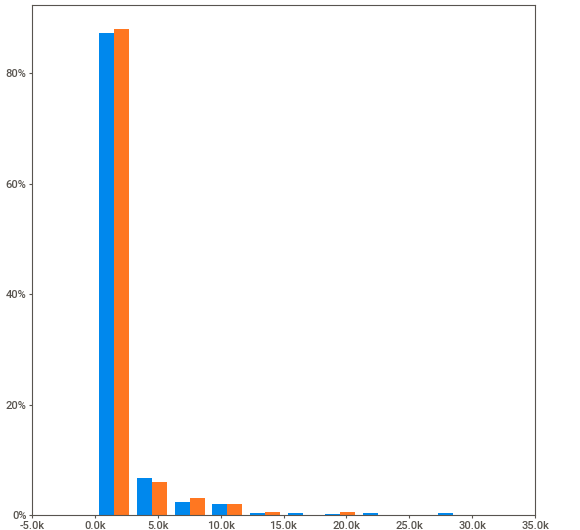
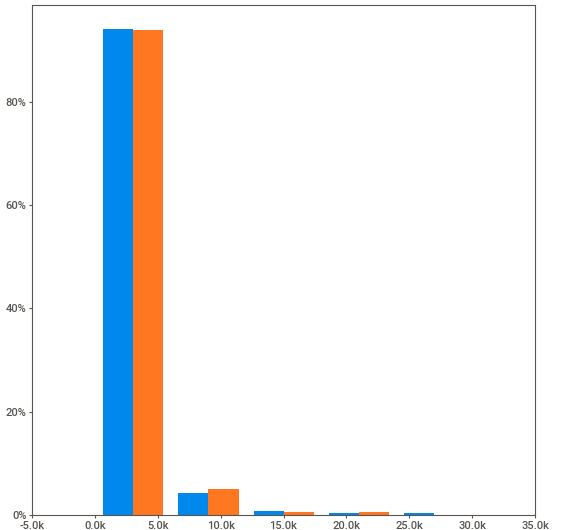
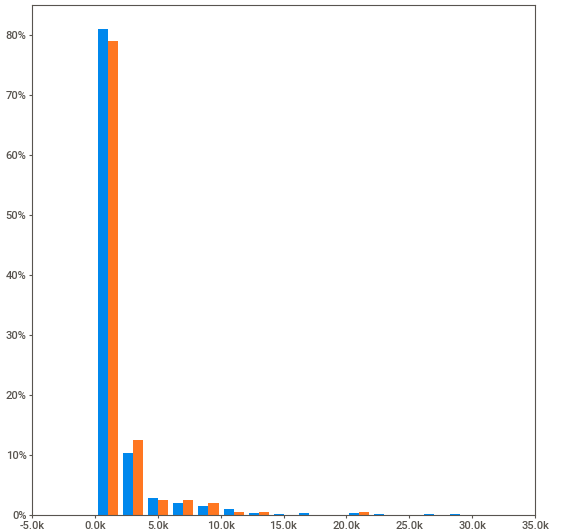
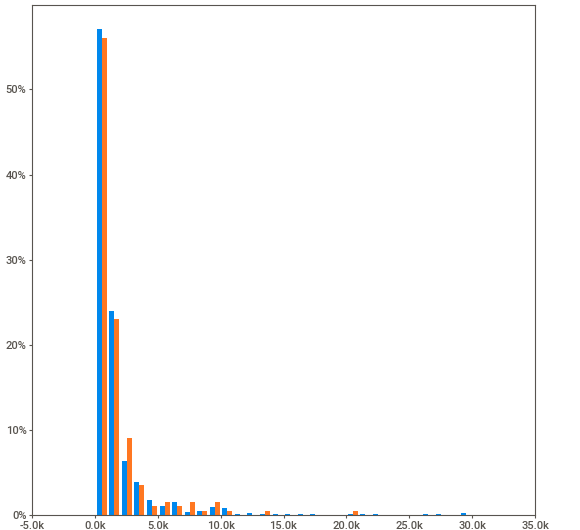
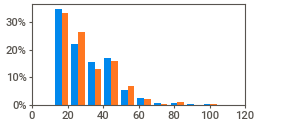
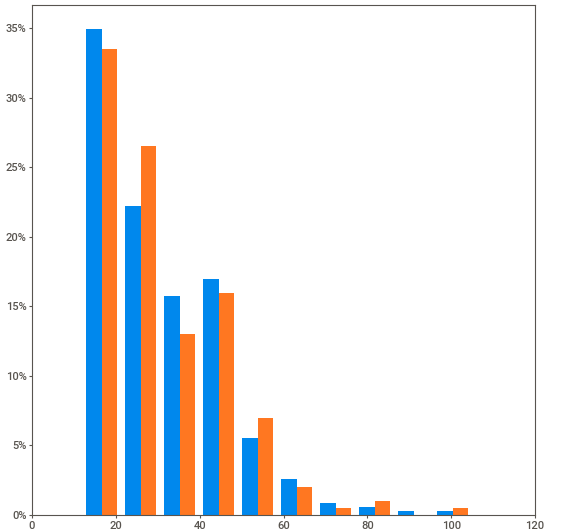
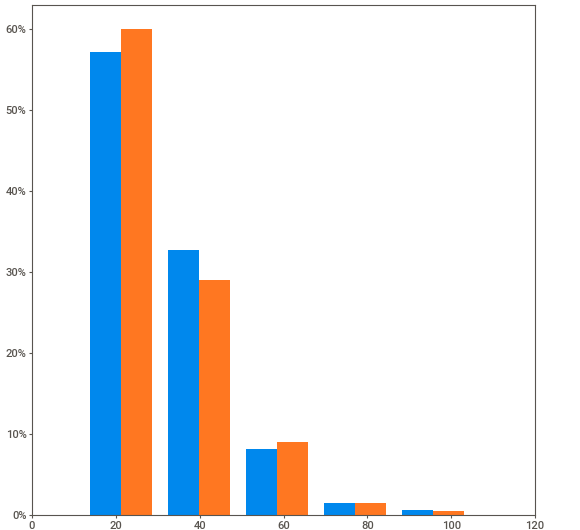
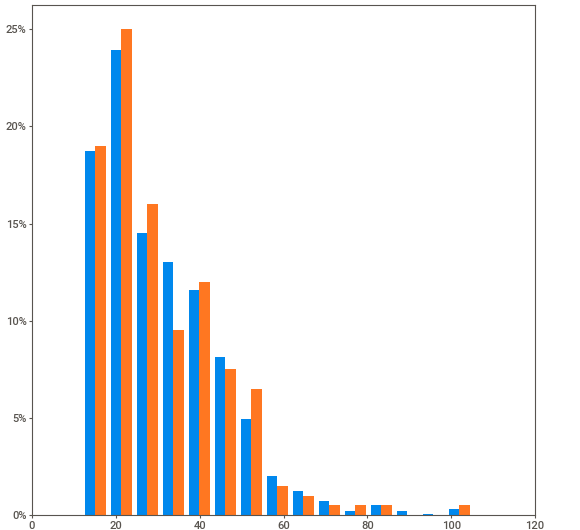
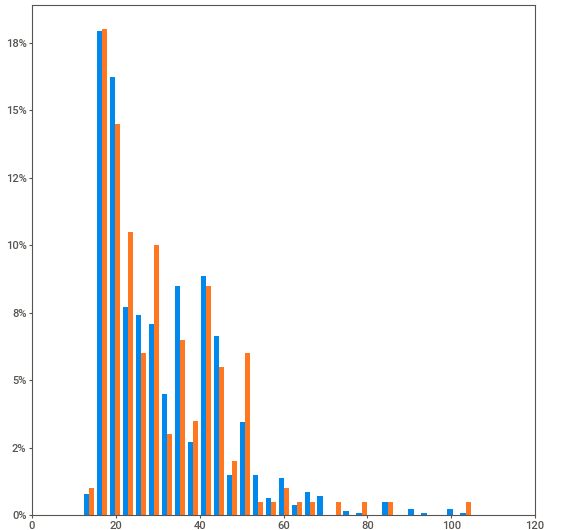
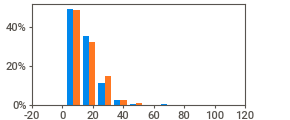
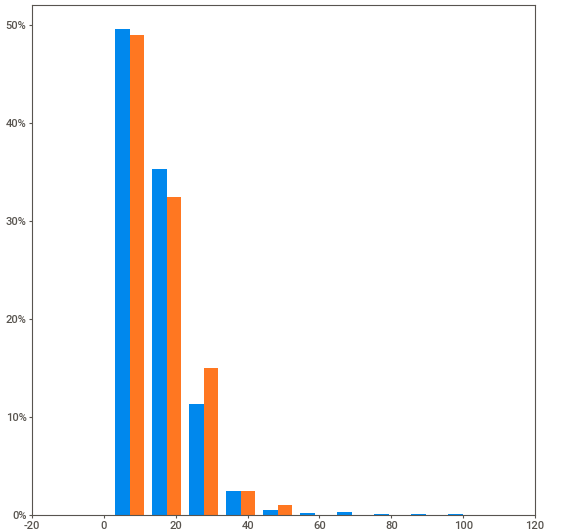
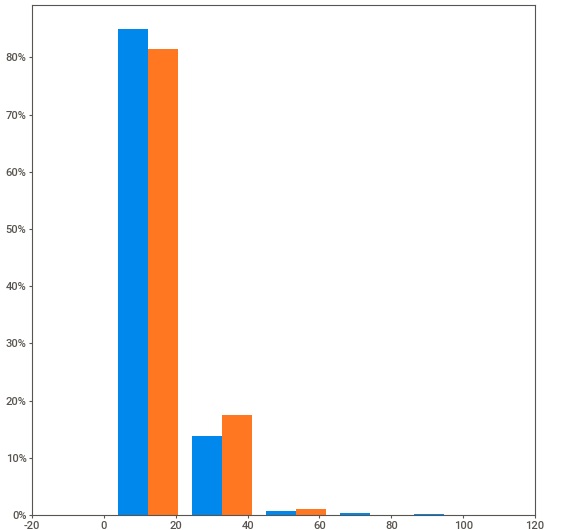
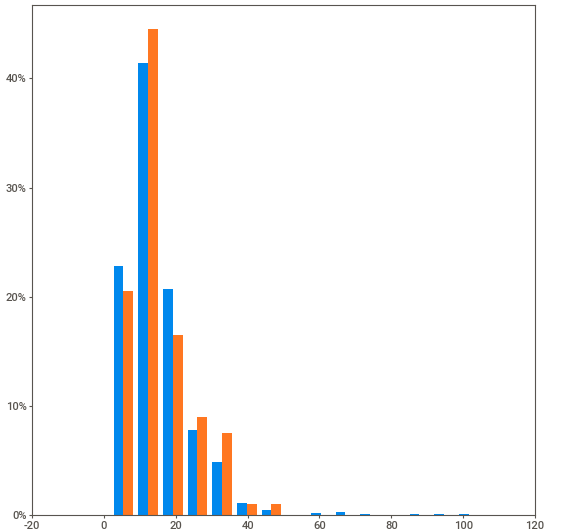
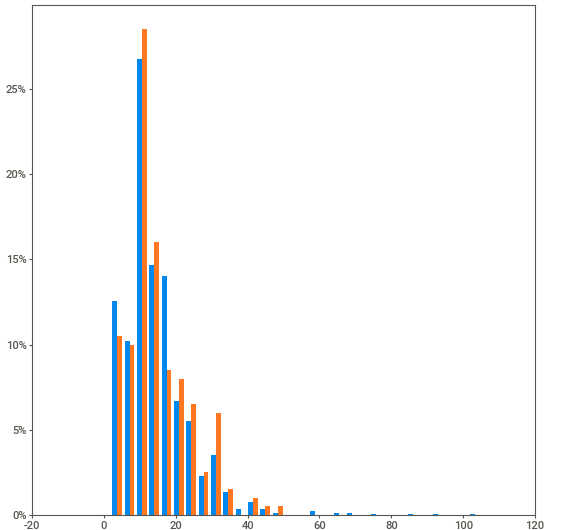
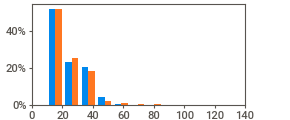
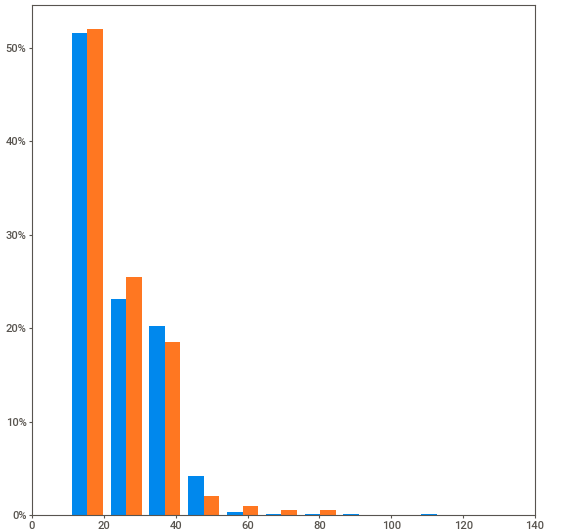
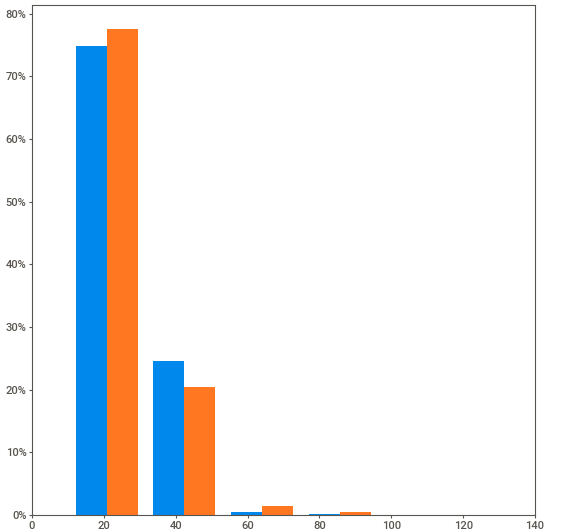
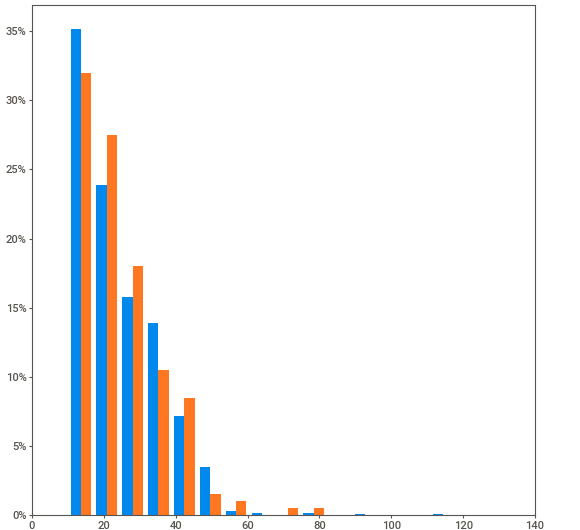
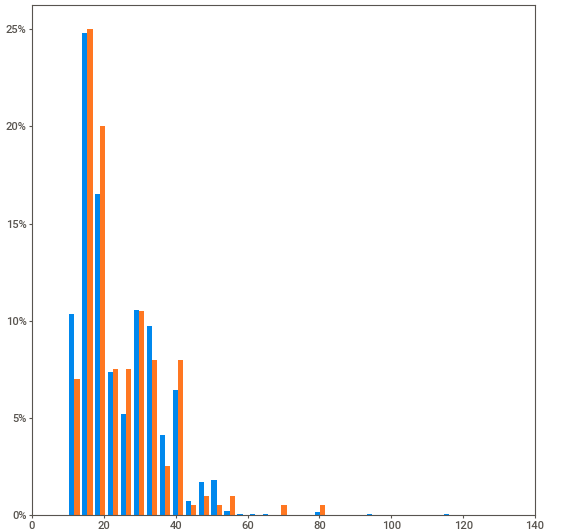
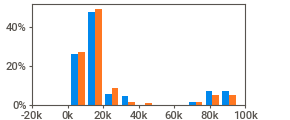
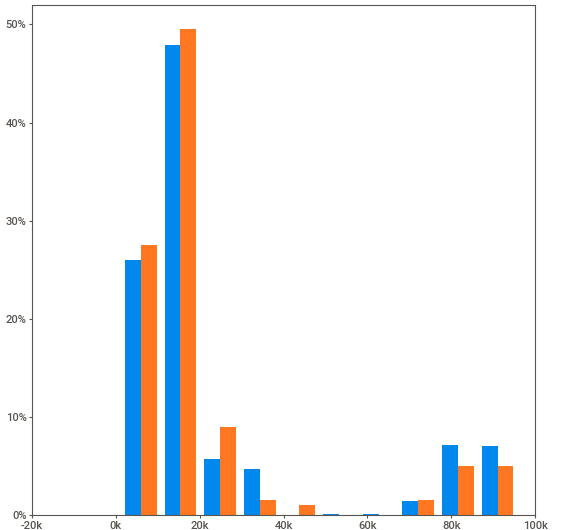
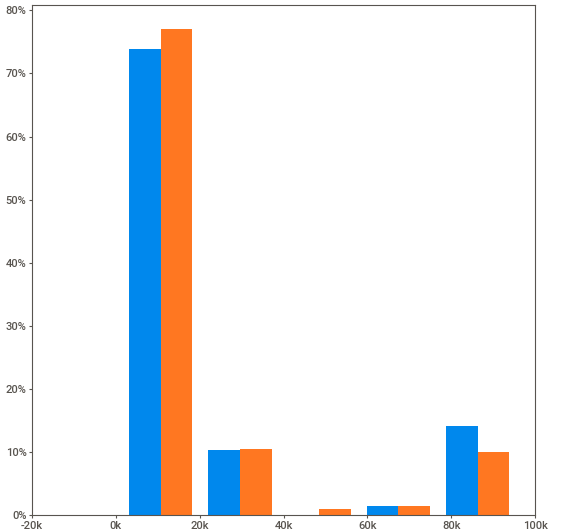
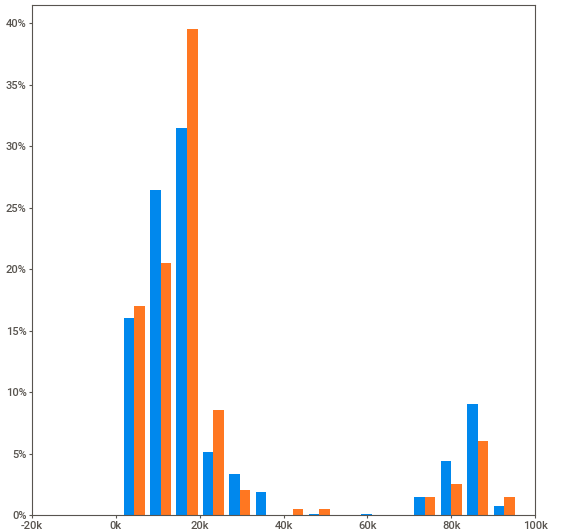
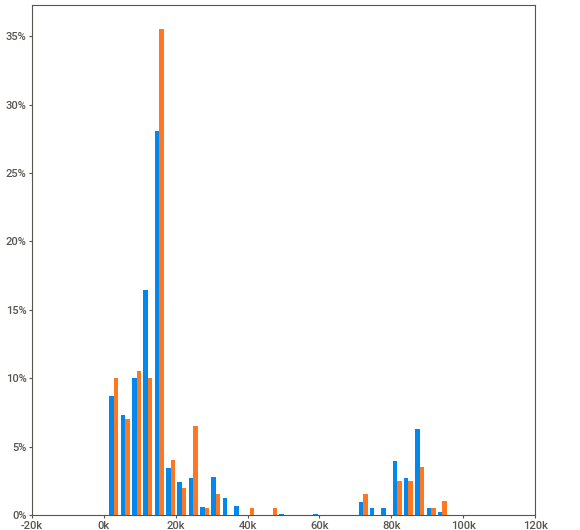
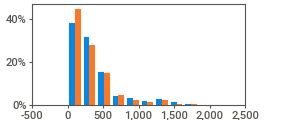
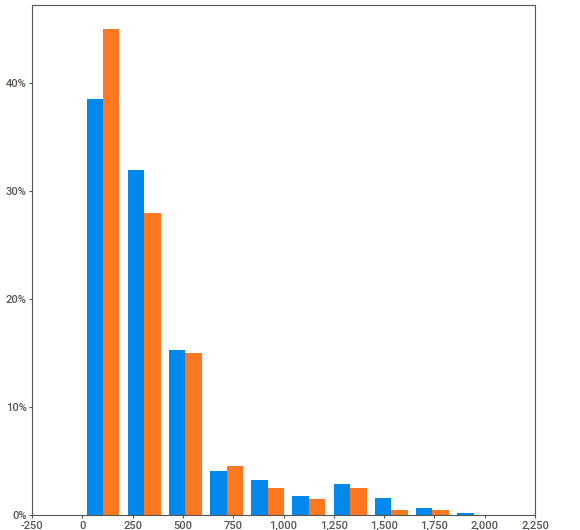
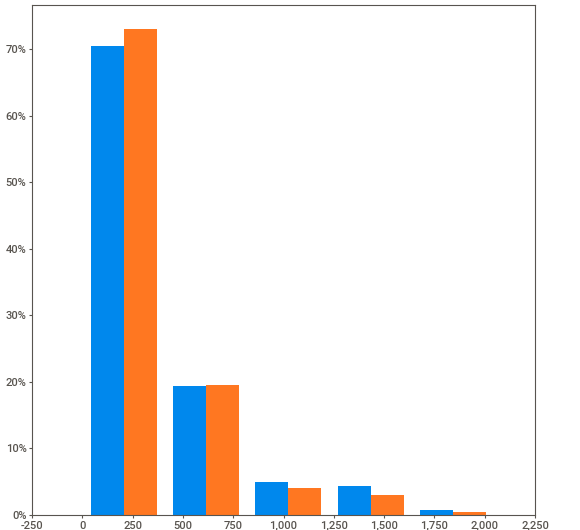
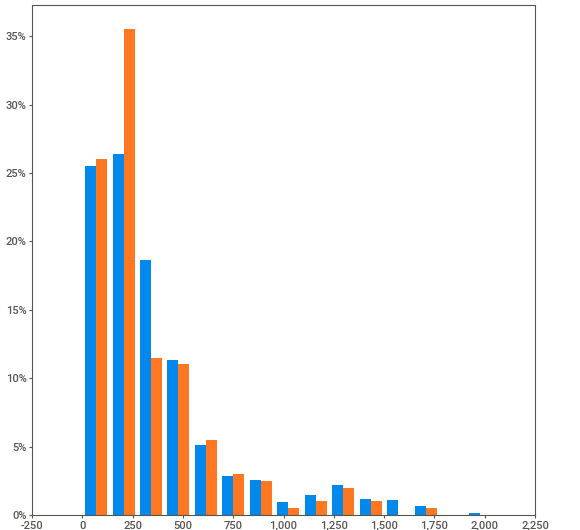
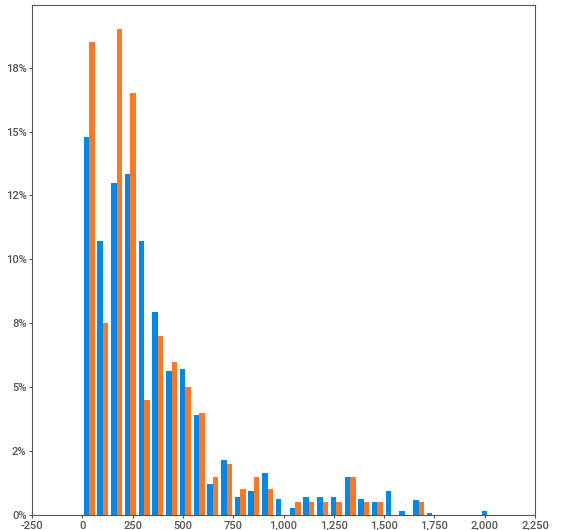
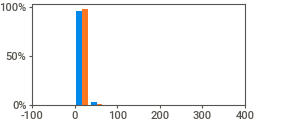
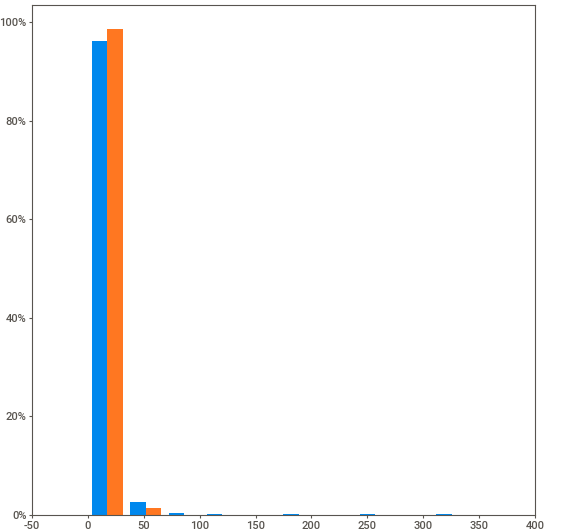
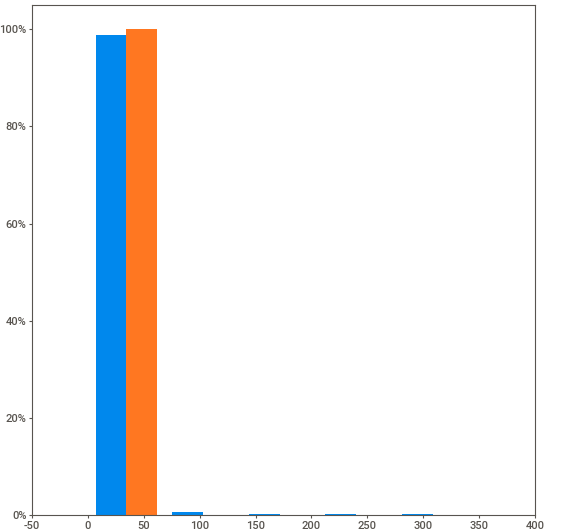
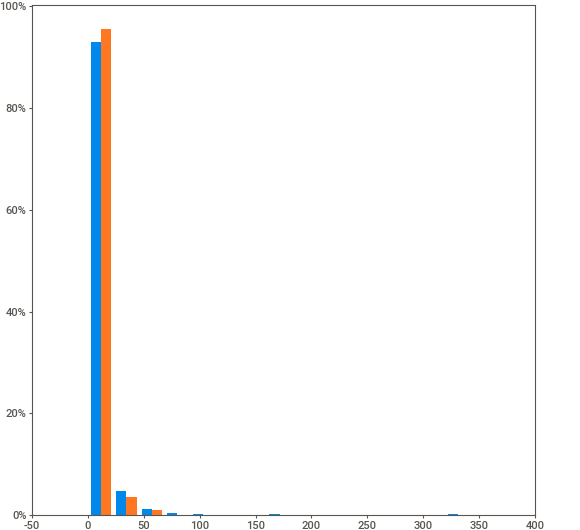
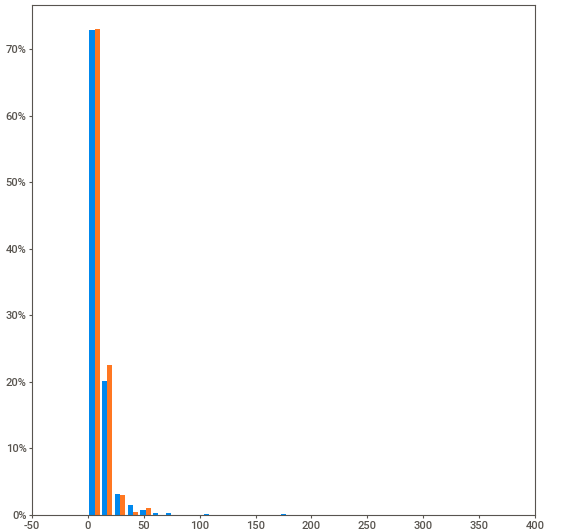
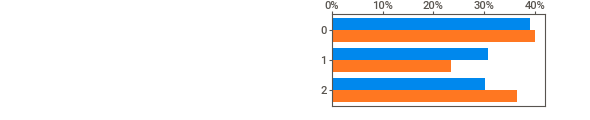
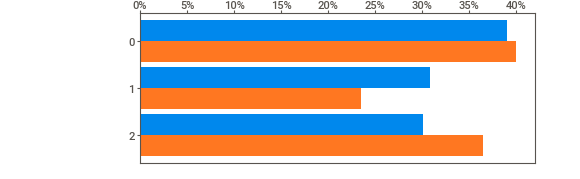
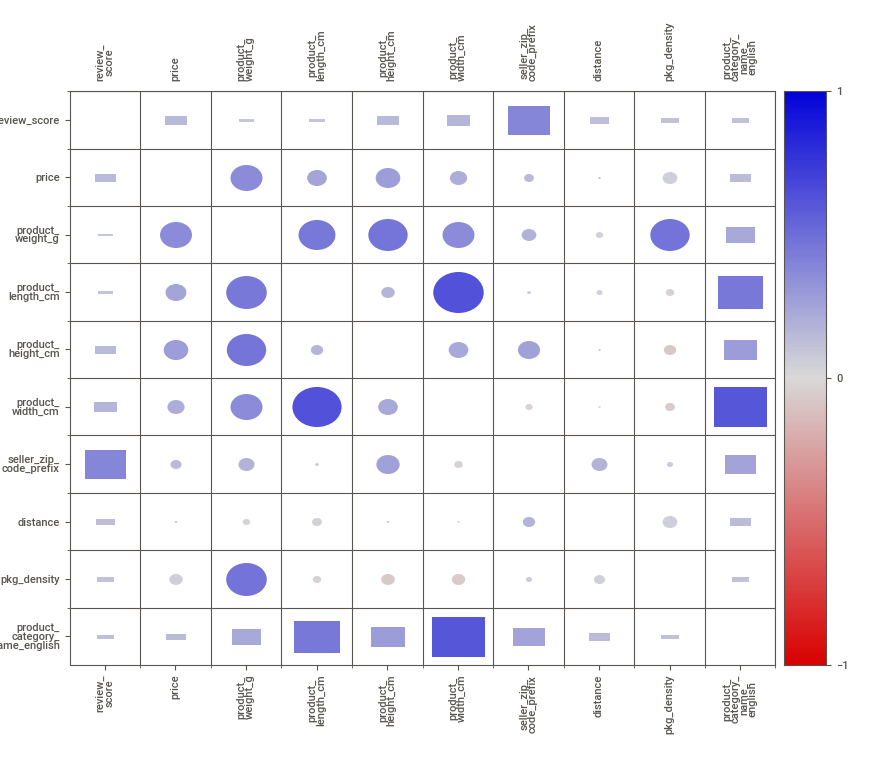
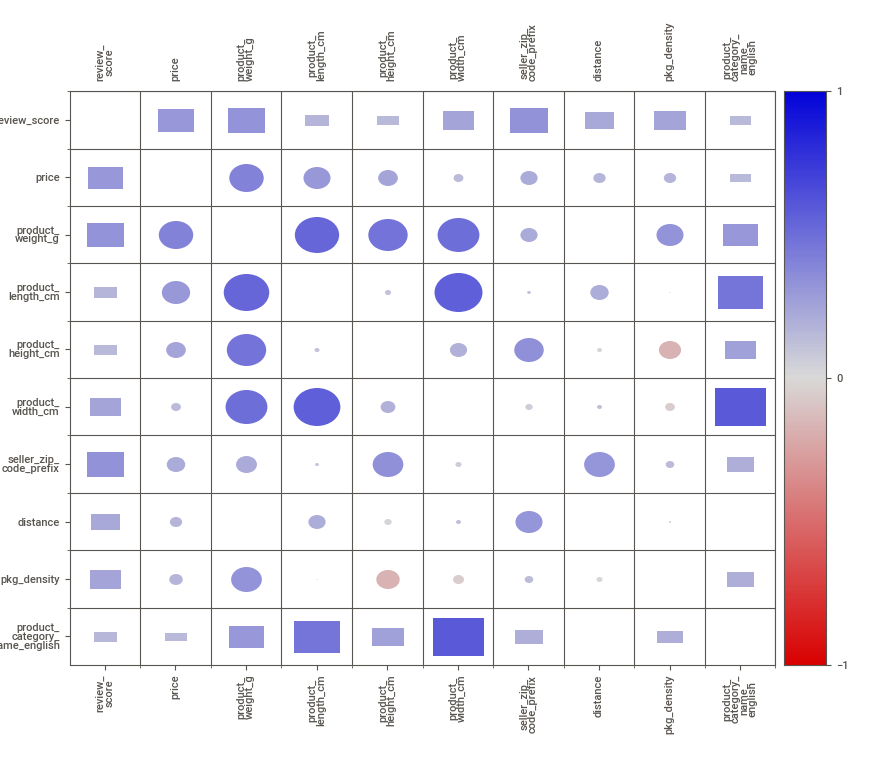

In [759]:
comparison_report.show_notebook() # Using the default values (w="100%", h=750, layout="vertical"), all can be overridden in an INI, see below)

#####**ML MODEL - MULLER LOOP CLASSIFIER**

In [760]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 78.00, Training time = 0.02 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Random Forest, Score (test, accuracy) = 98.50, Training time = 0.05 seconds
Classifier = AdaBoost, Score (test, accuracy) = 100.00, Training time = 0.25 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 75.00, Training time = 0.01 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


##### **INTERACTIVE DASHBOARDS**

In [761]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from fast_ml.model_development import train_valid_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [762]:
#random forest
model1 = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=5225,verbose=0,n_jobs=-1)
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5225, verbose=0,
                       warm_start=False)

In [763]:
#knn
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [764]:
#Gaussina NB
model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [765]:
#Adaboost classifier
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [766]:
#Creating Dashbord
from explainerdashboard import ClassifierExplainer,ExplainerDashboard,ExplainerHub
explainer1 = ClassifierExplainer(model1, X_train,y_train)
explainer2 = ClassifierExplainer(model2, X_train,y_train)
explainer3 = ClassifierExplainer(model3, X_train,y_train)
explainer4 = ClassifierExplainer(model4, X_train,y_train)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity

In [ ]:
db1 = ExplainerDashboard(explainer1)
db2 = ExplainerDashboard(explainer2)
db3 = ExplainerDashboard(explainer2)
db4 = ExplainerDashboard(explainer2)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e

  0%|          | 0/1400 [00:00<?, ?it/s]

**EXPLANER DASHBOARD**

In [ ]:
db1.run(mode='inline')

**EXPLAINERHUB**

In [ ]:
#run dashboard
#hub = ExplainerHub([db1, db2, db3, db4])
#hub.run()